In [443]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight

import matplotlib.pyplot as plt

from xgboost import XGBClassifier

import lightgbm as lgb

from catboost import CatBoostClassifier, Pool, metrics, cv

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from imblearn.over_sampling import RandomOverSampler, SMOTE 

# Necessary to get names out
SimpleImputer.get_feature_names_out = (lambda self, names=None:
                                       self.feature_names_in_)

In [284]:
features_num = [
    "RA", "DEC", "E_RA", "E_DEC", "Total_flux", "E_Total_flux", "Peak_flux", 
    "E_Peak_flux", "Maj", "Min", "PA", "E_Maj", "E_Min", "E_PA", "DC_Maj", 
    "DC_Min", "DC_PA", "Isl_rms", "lr_fin", "ALPHA_J2000", "DELTA_J2000", "EBV", 
    "NUV_flux_corr", "NUV_fluxerr_corr", "NUV_mag_corr", "NUV_magerr_corr", 
    "u_flux_corr", "u_fluxerr_corr", "u_mag_corr", "u_magerr_corr", 
    "Bw_flux_corr", "Bw_fluxerr_corr", "Bw_mag_corr", "Bw_magerr_corr", 
    "R_flux_corr", "R_fluxerr_corr", "R_mag_corr", "R_magerr_corr", "I_flux_corr", 
    "I_fluxerr_corr", "I_mag_corr", "I_magerr_corr", "z_flux_corr", "z_fluxerr_corr", 
    "z_mag_corr", "z_magerr_corr", "z_Subaru_flux_corr", "z_Subaru_fluxerr_corr", "z_Subaru_mag_corr", 
    "z_Subaru_magerr_corr", "y_flux_corr", "y_fluxerr_corr", "y_mag_corr", 
    "y_magerr_corr", "J_flux_corr", "J_fluxerr_corr", "J_mag_corr", 
    "J_magerr_corr", "H_flux_corr", "H_mag_corr", "H_magerr_corr", 
    "K_flux_corr", "K_fluxerr_corr", "K_mag_corr", "K_magerr_corr",  
    "Ks_fluxerr_corr", "Ks_mag_corr", "Ks_magerr_corr", "ch1_flux_corr",  
    "ch1_fluxerr_corr", "ch1_mag_corr", "ch1_magerr_corr", "ch2_flux_corr", 
    "ch2_fluxerr_corr", "ch2_mag_corr", "ch3_flux_corr", "ch3_fluxerr_corr", 
    "ch3_mag_corr", "ch3_magerr_corr",  "ch4_flux_corr", "ch4_fluxerr_corr",  
    "ch4_magerr_corr",  "Separation", "CLASS_STAR",  
    "F_MIPS_24", "FErr_MIPS_24_u",  "FErr_MIPS_24_l", "Bkg_MIPS_24",  
    "Sig_conf_MIPS_24", "Rhat_MIPS_24", "n_eff_MIPS_24", "Pval_res_24",  
    "F_PACS_100", "FErr_PACS_100_u", "FErr_PACS_100_l", "F_PACS_160",  
    "FErr_PACS_160_u", "FErr_PACS_160_l", "Bkg_PACS_100", "Bkg_PACS_160",  
    "Sig_conf_PACS_100", "Sig_conf_PACS_160", "Rhat_PACS_100", "Rhat_PACS_160",  
    "n_eff_PACS_100",  "n_eff_PACS_160",  "Pval_res_100",  "Pval_res_160",  
    "F_SPIRE_250",  "FErr_SPIRE_250_u",  "FErr_SPIRE_250_l", "F_SPIRE_350", 
    "FErr_SPIRE_350_u", "FErr_SPIRE_350_l", "F_SPIRE_500", "FErr_SPIRE_500_u", 
    "FErr_SPIRE_500_l", "Bkg_SPIRE_250", "Bkg_SPIRE_350", "Bkg_SPIRE_500", 
    "Sig_conf_SPIRE_250", "Sig_conf_SPIRE_350", "Sig_conf_SPIRE_500", 
    "Rhat_SPIRE_250", "Rhat_SPIRE_350", "Rhat_SPIRE_500", "n_eff_SPIRE_250", 
    "n_eff_SPIRE_500", "n_eff_SPIRE_350", "Pval_res_250", "Pval_res_350", 
    "Pval_res_500", "Z_BEST", "Z_BEST_SOURCE", "Z_SPEC", "Z_SOURCE", 
    "Z_QUAL", "RA_ZSPEC", "DEC_ZSPEC", "REL", "z1_median", "z1_min", 
    "z1_max", "z1_area", "z2_median", "z2_min", "z2_max", "z2_area", 
    "nfilt_eazy", "nfilt_atlas", "nfilt_ananna", "chi_r_best", 
    "chi_r_stellar", "zmodel", "chi_best", "Mass_median", 
    "Mass_l68", "Mass_u68", "Nfilts", "u_rest", "Bw_rest", "R_rest", 
    "I_rest", "z_rest", "z_Subaru_rest", "y_rest", "J_rest", "H_rest", 
    "K_rest", "Ks_rest", "ch1_rest", "ch2_rest", "ch3_rest", "ch4_rest", 
    "XrayFlux_0.5-2", "XrayHardness", 'FUV_flux_corr', 'FUV_fluxerr_corr', 
    'FUV_mag_corr', 'FUV_magerr_corr', 'H_fluxerr_corr', 'Ks_flux_corr', 
    'ch2_magerr_corr', 'ch4_mag_corr'

]

not_sure_columns = [
    "AGN", "optAGN", "IRAGN", "AGN_ZSPEC", "XrayAGN", "ap_to_model_z_Subaru", 
    "ap_to_model_err_z_Subaru", "ap_to_model_z", "ap_to_model_err_z", 
]

not_using_columns = [
    "AGN_final", "RadioAGN_final", "FLAG_OVERLAP_RADIO", "NoID", "optRA", "optDec", "LGZ_Size", "LGZ_Width",
    'Source_Name', 'NoID', 'optRA', 'optDec', 'LGZ_Size', 'LGZ_Width', 'LGZ_PA', 
    'Assoc', 'Assoc_Qual', 'Art_prob', 'Blend_prob', 'Hostbroken_prob', 'Imagemissing_prob', 
    'Zoom_prob', 'FLAG_DEEP', 'ID_OPTICAL', 'ID_SPITZER', 'ID', 
    'help_id', 'RA_HELP', 'DEC_HELP', 'OBJID'
]
    

features_cat_binary = [
    "flag_mips_24", "flag_PACS_100", "flag_PACS_160", "flag_spire_250", 
    "flag_spire_350", "flag_spire_500", "XID+_rerun_mips", "XID+_rerun_pacs", 
    "XID+_rerun_SPIRE", "Position_from", "FLAG_OVERLAP"
]
features_cat_non_binary = [
   "S_Code", "FLAG_WORKFLOW", "Prefilter", "Created", "flag_clean_radio", "flag_clean", "stellar_type"
]
y_column = "Classification"

classes = ['jet-mode radio AGN/low-excitation radio galaxy', 'quasar-like radio AGN / high-excitation radio galaxy', 
           'radio-quiet AGN', 'star-forming galaxy']

In [285]:
data = pd.read_csv("../../../Data/Fangyou_data/Cleaned/Complete_Bootes_clean.csv")

<AxesSubplot:>

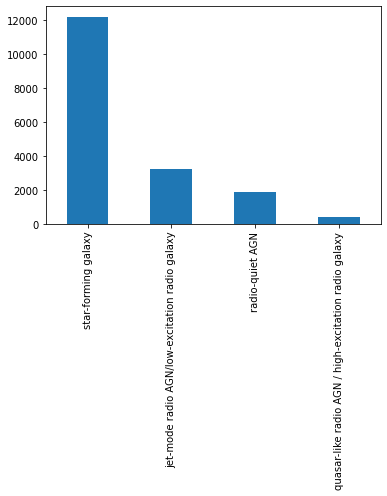

In [286]:
# Changing infinities into nan's
data = data.replace([np.inf,-np.inf], np.nan)
data['Classification'].value_counts().plot(kind='bar')

In [287]:
# Creating the pipeline
transformer_num = make_pipeline(
    SimpleImputer(strategy="mean"),  # there are a few missing values
    StandardScaler(),
)
# Almost all cat features are already binary, so don't have to be one-hot encoded
transformer_cat_binary = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
)
transformer_cat_non_binary = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat_binary, features_cat_binary),
    (transformer_cat_non_binary, features_cat_non_binary),
)

In [288]:
# Dropping required columns
X = data
y = data[y_column]

In [289]:
# Manually ordinally encoding, since we cannot use get_features_names out else
X[features_cat_binary] = OrdinalEncoder().fit_transform(X[features_cat_binary])

In [290]:
# Transforming y to labels
le = preprocessing.LabelEncoder()
labels = np.unique(y)
y = le.fit_transform(y)

# Creating training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [291]:
# Transforming the data, data that isn't in any of the pipelines is dropped automatically
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [292]:
# Class weights
class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_all = [class_weight[i] for i in y_train]

# PCA

# Random forest

In [405]:
clf = RandomForestClassifier(n_estimators=100, class_weight="balanced")
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [406]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.8873    0.5870    0.7065       644
quasar-like radio AGN / high-excitation radio galaxy     0.7857    0.1341    0.2292        82
                                     radio-quiet AGN     0.8138    0.4891    0.6109       411
                                 star-forming galaxy     0.8220    0.9755    0.8922      2409

                                            accuracy                         0.8291      3546
                                           macro avg     0.8272    0.5464    0.6097      3546
                                        weighted avg     0.8320    0.8291    0.8105      3546



[]

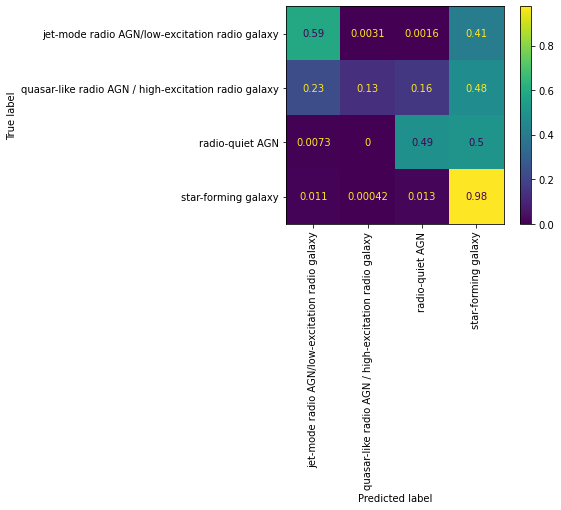

In [407]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()

In [296]:
random_forest_feature_importance = pd.DataFrame(
    np.array([preprocessor.get_feature_names_out(), clf.feature_importances_]).T,
                                               columns=['Feature', 'Importance'])
random_forest_feature_importance = random_forest_feature_importance.sort_values(by=['Importance'], ascending=False)

[]

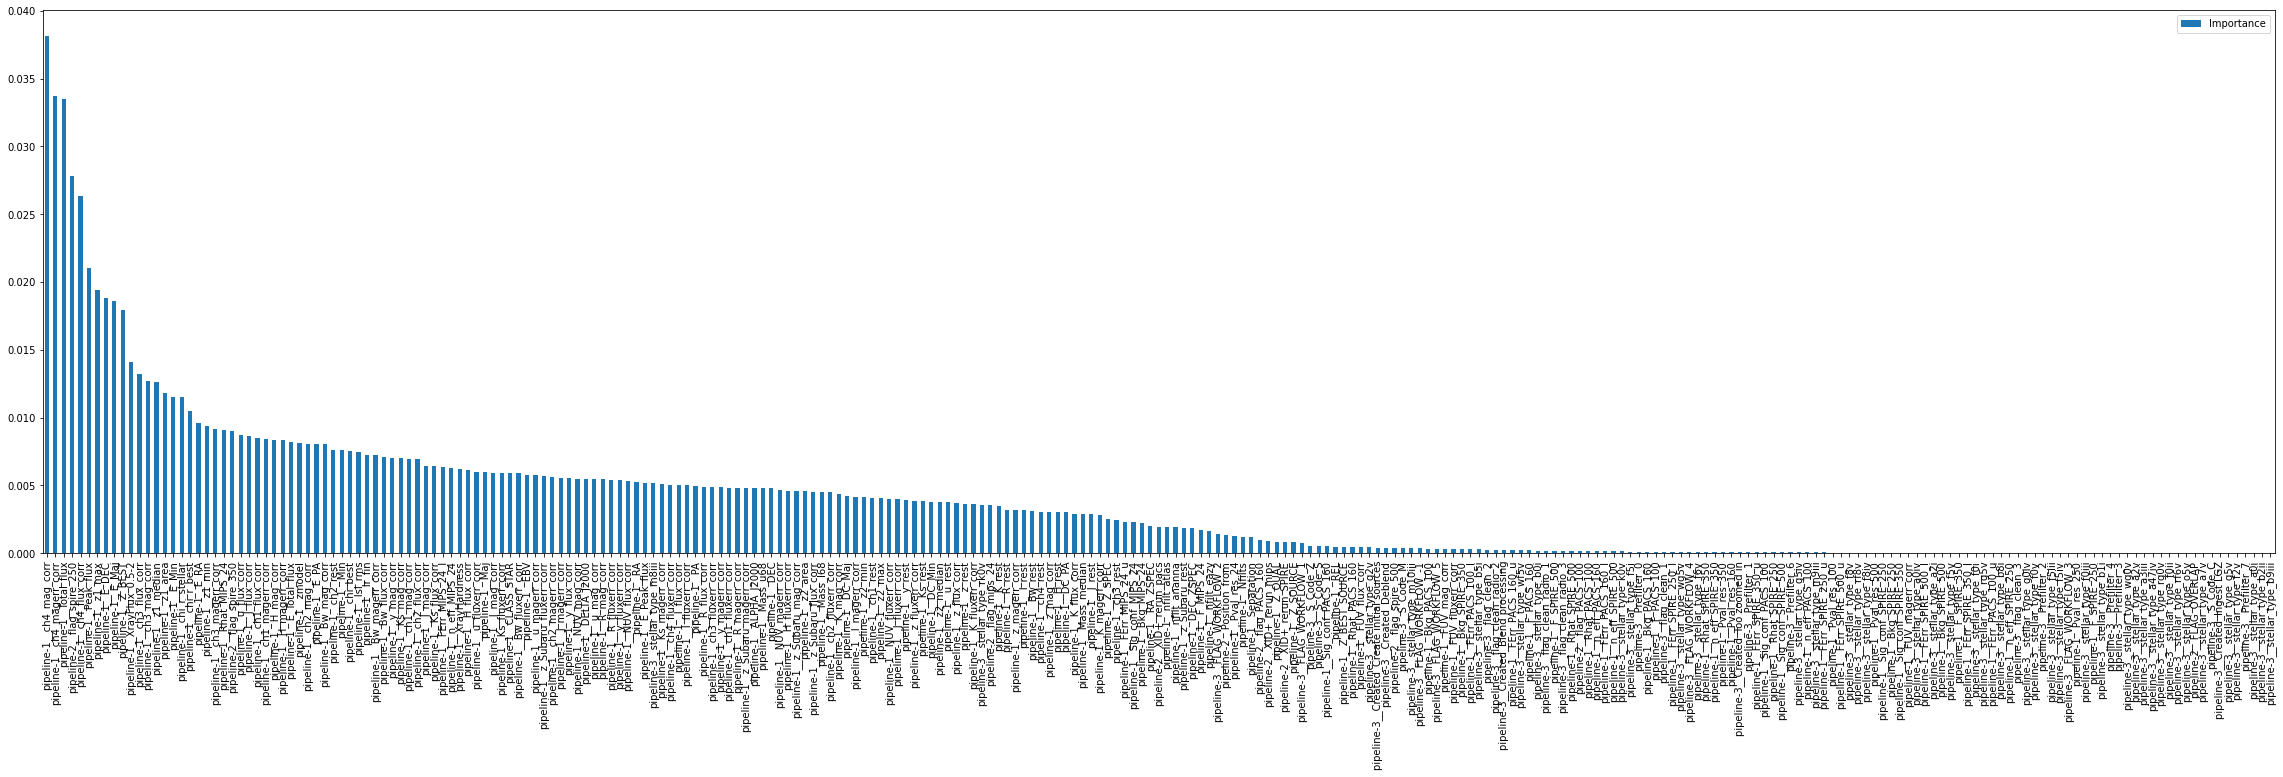

In [297]:
ax = random_forest_feature_importance.plot(kind='bar', figsize=(40,10))
ax.set_xticklabels(random_forest_feature_importance.Feature)
plt.plot()

In [298]:
random_forest_feature_importance["Cumulative"] = np.cumsum(random_forest_feature_importance["Importance"])
random_forest_feature_importance

,Feature,Importance,Cumulative
183,pipeline-1__ch4_mag_corr,0.038168,0.038168
81,pipeline-1__ch4_magerr_corr,0.033707,0.071875
4,pipeline-1__Total_flux,0.033483,0.105358
187,pipeline-2__flag_spire_250,0.027819,0.133177
79,pipeline-1__ch4_flux_corr,0.026347,0.159525
...,...,...,...
240,pipeline-3__stellar_type_f2v,0.0,1.0
211,pipeline-3__Prefilter_7,0.0,1.0
223,pipeline-3__stellar_type_a0i,0.0,1.0
232,pipeline-3__stellar_type_b2ii,0.0,1.0


In [299]:
random_forest_feature_importance.iloc[0:150,2]

183    0.038168
81     0.071875
4      0.105358
187    0.133177
79     0.159525
         ...   
190    0.982039
136    0.982902
192    0.983745
135    0.984576
200    0.985338
Name: Cumulative, Length: 150, dtype: object

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000020AAEE939D0>
Traceback (most recent call last):
  File "d:\python\python38\lib\site-packages\torch\utils\data\dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "d:\python\python38\lib\site-packages\torch\utils\data\dataloader.py", line 1316, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


[]

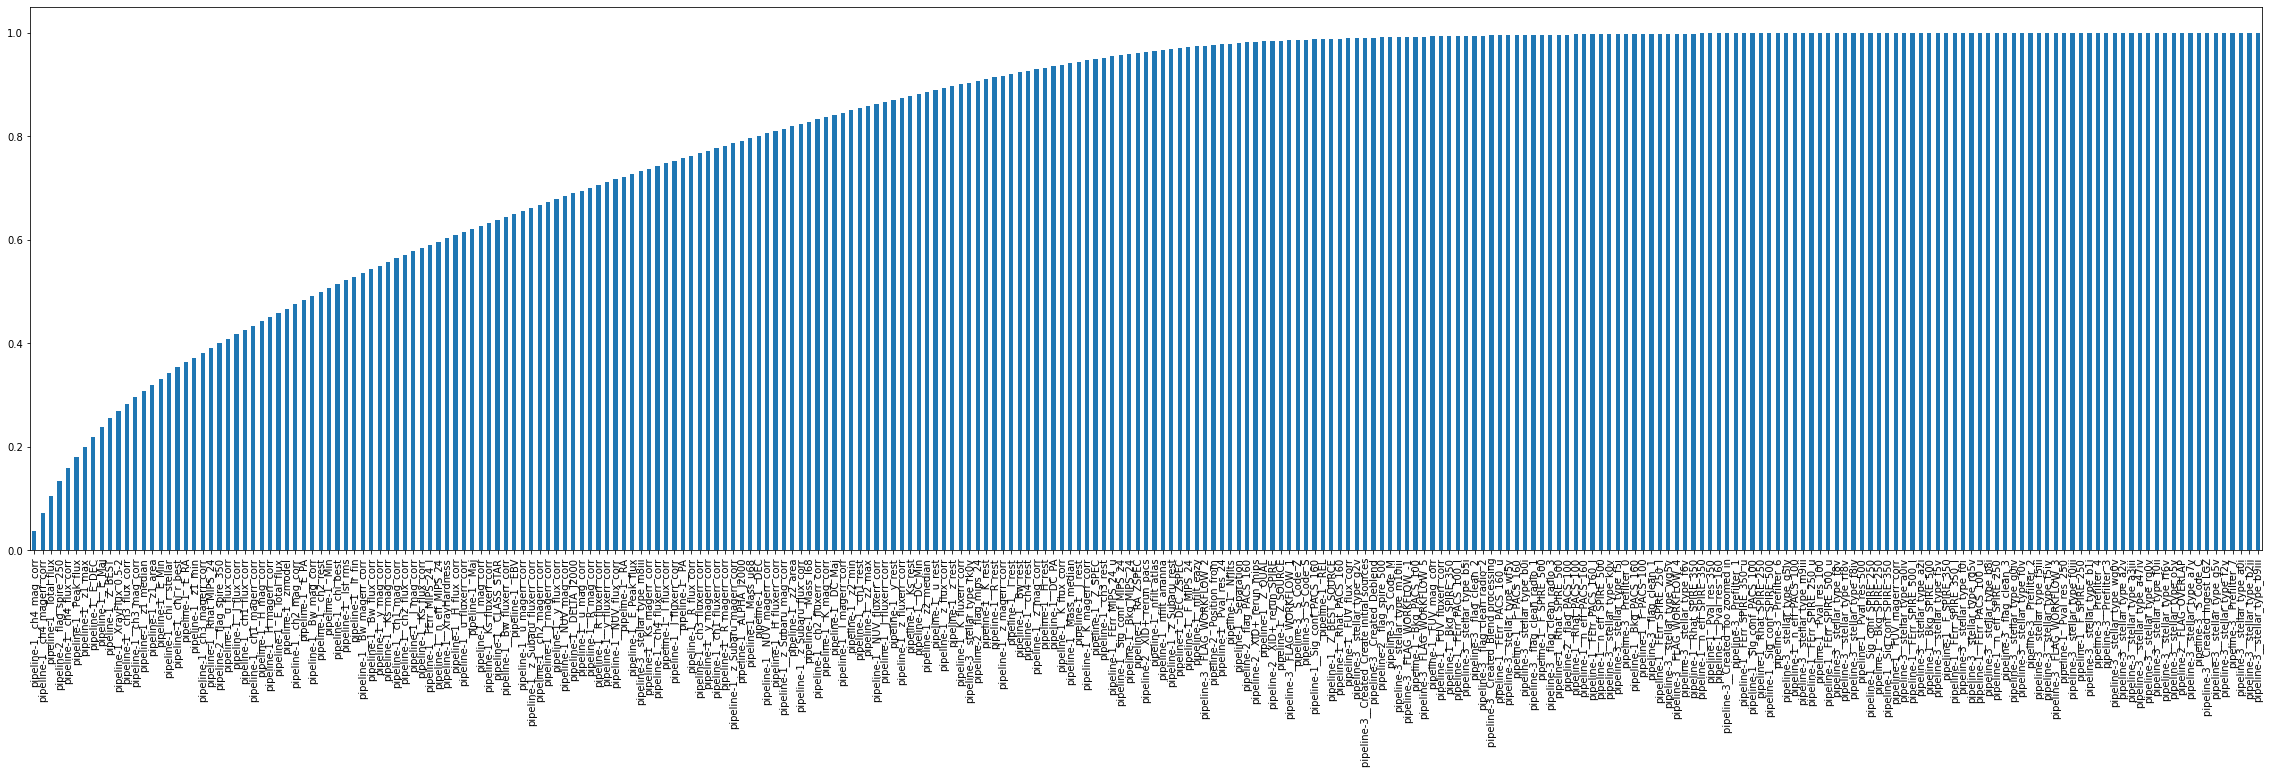

In [300]:
ax = random_forest_feature_importance['Cumulative'].plot(kind='bar', figsize=(40,10))
ax.set_xticklabels(random_forest_feature_importance.Feature)
plt.plot()

# XGboost

In [411]:
model = XGBClassifier(use_label_encoder=False, 
                      max_depth=8, 
                      reg_alpha=3, 
                      min_child_weight=1, 
                      reg_lambda=8,
                      gamma=0,
                     eta=0.3, 
                     n_estimators=1000)
bst = model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_test, y_test)], verbose=True,
         sample_weight=class_weight_all)

[17:55:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:1.14512
[1]	validation_0-mlogloss:0.99899
[2]	validation_0-mlogloss:0.89142
[3]	validation_0-mlogloss:0.81356
[4]	validation_0-mlogloss:0.75514
[5]	validation_0-mlogloss:0.71137
[6]	validation_0-mlogloss:0.67083
[7]	validation_0-mlogloss:0.63957
[8]	validation_0-mlogloss:0.61401
[9]	validation_0-mlogloss:0.59103
[10]	validation_0-mlogloss:0.57319
[11]	validation_0-mlogloss:0.55788
[12]	validation_0-mlogloss:0.54340
[13]	validation_0-mlogloss:0.52975
[14]	validation_0-mlogloss:0.51886
[15]	validation_0-mlogloss:0.50916
[16]	validation_0-mlogloss:0.49918
[17]	validation_0-mlogloss:0.49132
[18]	validation_0-mlogloss:0.48315
[19]	validation_0-mlogloss:0.47489

In [341]:
# Training accuracy
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.9858    1.0000    0.9929      2575
quasar-like radio AGN / high-excitation radio galaxy     0.9810    1.0000    0.9904       309
                                     radio-quiet AGN     0.9739    1.0000    0.9868      1495
                                 star-forming galaxy     1.0000    0.9915    0.9957      9804

                                            accuracy                         0.9941     14183
                                           macro avg     0.9852    0.9979    0.9914     14183
                                        weighted avg     0.9943    0.9941    0.9942     14183



In [342]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.8169    0.7966    0.8066       644
quasar-like radio AGN / high-excitation radio galaxy     0.6508    0.5000    0.5655        82
                                     radio-quiet AGN     0.7281    0.7494    0.7386       411
                                 star-forming galaxy     0.9128    0.9215    0.9172      2409

                                            accuracy                         0.8691      3546
                                           macro avg     0.7772    0.7419    0.7570      3546
                                        weighted avg     0.8679    0.8691    0.8683      3546



[]

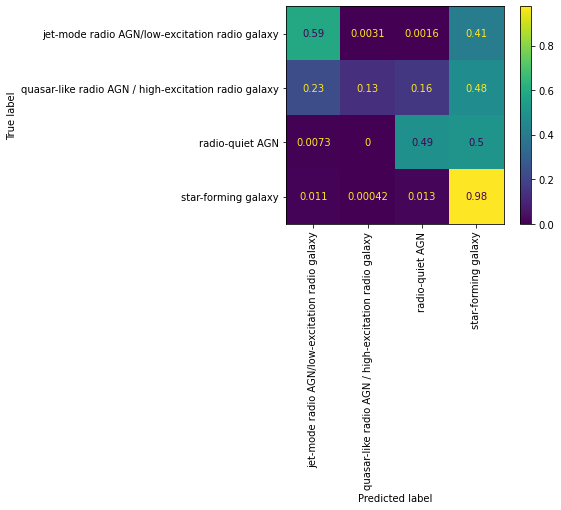

In [413]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()

# LightBM

In [648]:
param = {'num_class': 4, 
         'objective': "multiclass",  
         "max_depth": 8, 
         "num_leaves": 32, 
        "n_estimators": 1000,
        "class_weight": "balanced",
        "min_child_samples": 10,
        "reg_alpha": 1,
        "reg_lambda": 2,}

In [649]:
lightbm = lgb.LGBMClassifier(**param)
lightbm.fit(X_train, y_train, 
            callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation()], 
            eval_set=[(X_test, y_test)])

[1]	valid_0's multi_logloss: 1.25392
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 1.15001
[3]	valid_0's multi_logloss: 1.06492
[4]	valid_0's multi_logloss: 0.994349
[5]	valid_0's multi_logloss: 0.935057
[6]	valid_0's multi_logloss: 0.885827
[7]	valid_0's multi_logloss: 0.843258
[8]	valid_0's multi_logloss: 0.805296
[9]	valid_0's multi_logloss: 0.771191
[10]	valid_0's multi_logloss: 0.742629
[11]	valid_0's multi_logloss: 0.717411
[12]	valid_0's multi_logloss: 0.693365
[13]	valid_0's multi_logloss: 0.671457
[14]	valid_0's multi_logloss: 0.652456
[15]	valid_0's multi_logloss: 0.635339
[16]	valid_0's multi_logloss: 0.619575
[17]	valid_0's multi_logloss: 0.604695
[18]	valid_0's multi_logloss: 0.591751
[19]	valid_0's multi_logloss: 0.580263
[20]	valid_0's multi_logloss: 0.569134
[21]	valid_0's multi_logloss: 0.559924
[22]	valid_0's multi_logloss: 0.550872
[23]	valid_0's multi_logloss: 0.541869
[24]	valid_0's multi_logloss: 0.533872
[25]	valid_0's 

LGBMClassifier(class_weight='balanced', max_depth=8, min_child_samples=10,
               min_split_gain=0.5, n_estimators=1000, num_class=4,
               num_leaves=32, objective='multiclass', reg_alpha=1,
               reg_lambda=2)

In [624]:
# Training accuracy
y_pred = lightbm.predict(X_train)
print(classification_report(y_train, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.9873    1.0000    0.9936      2575
quasar-like radio AGN / high-excitation radio galaxy     1.0000    1.0000    1.0000       309
                                     radio-quiet AGN     0.9771    1.0000    0.9884      1495
                                 star-forming galaxy     1.0000    0.9931    0.9965      9804

                                            accuracy                         0.9952     14183
                                           macro avg     0.9911    0.9983    0.9946     14183
                                        weighted avg     0.9953    0.9952    0.9952     14183



In [625]:
y_pred = lightbm.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.8215    0.8075    0.8144       644
quasar-like radio AGN / high-excitation radio galaxy     0.6610    0.4756    0.5532        82
                                     radio-quiet AGN     0.7311    0.7543    0.7425       411
                                 star-forming galaxy     0.9152    0.9232    0.9192      2409

                                            accuracy                         0.8723      3546
                                           macro avg     0.7822    0.7401    0.7573      3546
                                        weighted avg     0.8710    0.8723    0.8712      3546



[]

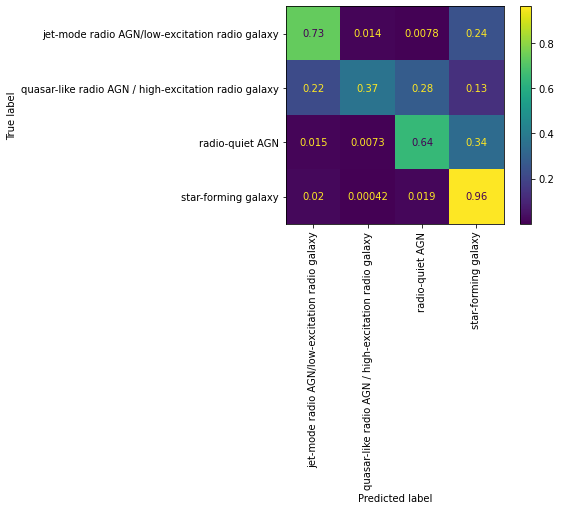

In [594]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()

## Hyperparameters

In [658]:
# Metrics for hyperparameter tuning
metrics = {"Accuracy": "accuracy",
          "Balanced accuracy": "balanced_accuracy",
          "F1 score": "f1_weighted"}

In [659]:
# Parameter space
parameters = { 
         "max_depth": [7,8,9], 
         "num_leaves": [16,32,64], 
        "min_child_samples": [1,5,10,15],
        "reg_alpha": [1,2,5],
        "reg_lambda": [1,2,5]}

In [660]:
lightbm = lgb.LGBMClassifier(num_class=4, objective="multiclass",  n_estimators=1000, class_weight="balanced")

In [661]:
clf = GridSearchCV(estimator=lightbm, 
                   param_grid=parameters,
                  scoring=metrics,
                  refit="Accuracy",
                  return_train_score=True,
                  n_jobs=-1,
                  cv=2,
                  verbose=4)

clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], callbacks=[lgb.early_stopping(stopping_rounds=20))

Fitting 2 folds for each of 324 candidates, totalling 648 fits


GridSearchCV(cv=2,
             estimator=LGBMClassifier(class_weight='balanced',
                                      n_estimators=1000, num_class=4,
                                      objective='multiclass'),
             n_jobs=-1,
             param_grid={'max_depth': [7, 8, 9],
                         'min_child_samples': [1, 5, 10, 15],
                         'num_leaves': [16, 32, 64], 'reg_alpha': [1, 2, 5],
                         'reg_lambda': [1, 2, 5]},
             refit='Accuracy', return_train_score=True,
             scoring={'Accuracy': 'accuracy',
                      'Balanced accuracy': 'balanced_accuracy',
                      'F1 score': 'f1_weighted'},
             verbose=4)

In [665]:
clf.best_params_, clf.best_score_

({'max_depth': 7,
  'min_child_samples': 5,
  'num_leaves': 32,
  'reg_alpha': 1,
  'reg_lambda': 2},
 0.8615947421256325)

In [662]:
# Training accuracy
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     1.0000    1.0000    1.0000      2575
quasar-like radio AGN / high-excitation radio galaxy     1.0000    1.0000    1.0000       309
                                     radio-quiet AGN     1.0000    1.0000    1.0000      1495
                                 star-forming galaxy     1.0000    1.0000    1.0000      9804

                                            accuracy                         1.0000     14183
                                           macro avg     1.0000    1.0000    1.0000     14183
                                        weighted avg     1.0000    1.0000    1.0000     14183



In [663]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.8350    0.7857    0.8096       644
quasar-like radio AGN / high-excitation radio galaxy     0.6774    0.5122    0.5833        82
                                     radio-quiet AGN     0.7469    0.7251    0.7358       411
                                 star-forming galaxy     0.9076    0.9340    0.9206      2409

                                            accuracy                         0.8731      3546
                                           macro avg     0.7917    0.7392    0.7623      3546
                                        weighted avg     0.8705    0.8731    0.8712      3546



[]

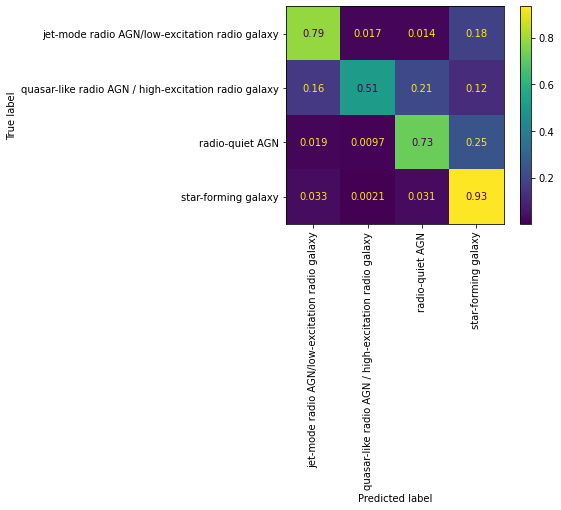

In [664]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()

# CatBoost

In [510]:
model = CatBoostClassifier(iterations=10**5,
                           depth=None,
                           verbose=True,
                          loss_function="MultiClass")

In [511]:
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], sample_weight=class_weight_all ,early_stopping_rounds=100)

Learning rate set to 0.019605
0:	learn: 1.3727414	test: 1.3745576	best: 1.3745576 (0)	total: 68ms	remaining: 1h 53m 20s
1:	learn: 1.3582378	test: 1.3587783	best: 1.3587783 (1)	total: 153ms	remaining: 2h 7m 13s
2:	learn: 1.3423262	test: 1.3420199	best: 1.3420199 (2)	total: 233ms	remaining: 2h 9m 42s
3:	learn: 1.3265376	test: 1.3255921	best: 1.3255921 (3)	total: 311ms	remaining: 2h 9m 26s
4:	learn: 1.3134084	test: 1.3116861	best: 1.3116861 (4)	total: 395ms	remaining: 2h 11m 48s
5:	learn: 1.3021095	test: 1.3010039	best: 1.3010039 (5)	total: 483ms	remaining: 2h 14m 12s
6:	learn: 1.2897374	test: 1.2891671	best: 1.2891671 (6)	total: 574ms	remaining: 2h 16m 42s
7:	learn: 1.2767113	test: 1.2755642	best: 1.2755642 (7)	total: 649ms	remaining: 2h 15m 6s
8:	learn: 1.2627085	test: 1.2610998	best: 1.2610998 (8)	total: 738ms	remaining: 2h 16m 38s
9:	learn: 1.2517519	test: 1.2499133	best: 1.2499133 (9)	total: 828ms	remaining: 2h 18m 3s
10:	learn: 1.2420101	test: 1.2405396	best: 1.2405396 (10)	total: 9

89:	learn: 0.8430505	test: 0.8567842	best: 0.8567842 (89)	total: 7.44s	remaining: 2h 17m 37s
90:	learn: 0.8402942	test: 0.8544649	best: 0.8544649 (90)	total: 7.52s	remaining: 2h 17m 39s
91:	learn: 0.8380710	test: 0.8523624	best: 0.8523624 (91)	total: 7.61s	remaining: 2h 17m 42s
92:	learn: 0.8355078	test: 0.8501693	best: 0.8501693 (92)	total: 7.69s	remaining: 2h 17m 44s
93:	learn: 0.8327354	test: 0.8478540	best: 0.8478540 (93)	total: 7.77s	remaining: 2h 17m 38s
94:	learn: 0.8313754	test: 0.8466915	best: 0.8466915 (94)	total: 7.85s	remaining: 2h 17m 34s
95:	learn: 0.8287257	test: 0.8441419	best: 0.8441419 (95)	total: 7.93s	remaining: 2h 17m 31s
96:	learn: 0.8260970	test: 0.8416081	best: 0.8416081 (96)	total: 8.02s	remaining: 2h 17m 35s
97:	learn: 0.8240825	test: 0.8396122	best: 0.8396122 (97)	total: 8.09s	remaining: 2h 17m 29s
98:	learn: 0.8213243	test: 0.8369898	best: 0.8369898 (98)	total: 8.18s	remaining: 2h 17m 32s
99:	learn: 0.8187865	test: 0.8348631	best: 0.8348631 (99)	total: 8.26s

176:	learn: 0.6996563	test: 0.7327220	best: 0.7327220 (176)	total: 14.5s	remaining: 2h 16m 18s
177:	learn: 0.6984325	test: 0.7318004	best: 0.7318004 (177)	total: 14.6s	remaining: 2h 16m 15s
178:	learn: 0.6974737	test: 0.7312855	best: 0.7312855 (178)	total: 14.7s	remaining: 2h 16m 11s
179:	learn: 0.6961553	test: 0.7302430	best: 0.7302430 (179)	total: 14.7s	remaining: 2h 16m 8s
180:	learn: 0.6948076	test: 0.7292215	best: 0.7292215 (180)	total: 14.8s	remaining: 2h 16m 10s
181:	learn: 0.6937057	test: 0.7282583	best: 0.7282583 (181)	total: 14.9s	remaining: 2h 16m 11s
182:	learn: 0.6924501	test: 0.7273924	best: 0.7273924 (182)	total: 15s	remaining: 2h 16m 9s
183:	learn: 0.6915464	test: 0.7267981	best: 0.7267981 (183)	total: 15s	remaining: 2h 16m 3s
184:	learn: 0.6907761	test: 0.7262783	best: 0.7262783 (184)	total: 15.1s	remaining: 2h 16m 1s
185:	learn: 0.6896678	test: 0.7253490	best: 0.7253490 (185)	total: 15.2s	remaining: 2h 16m 1s
186:	learn: 0.6886230	test: 0.7243158	best: 0.7243158 (186)

263:	learn: 0.6240569	test: 0.6766314	best: 0.6766314 (263)	total: 21.4s	remaining: 2h 14m 53s
264:	learn: 0.6235886	test: 0.6762217	best: 0.6762217 (264)	total: 21.5s	remaining: 2h 14m 53s
265:	learn: 0.6228711	test: 0.6755619	best: 0.6755619 (265)	total: 21.6s	remaining: 2h 14m 51s
266:	learn: 0.6220337	test: 0.6749655	best: 0.6749655 (266)	total: 21.7s	remaining: 2h 14m 53s
267:	learn: 0.6210221	test: 0.6742575	best: 0.6742575 (267)	total: 21.7s	remaining: 2h 14m 49s
268:	learn: 0.6202034	test: 0.6735126	best: 0.6735126 (268)	total: 21.8s	remaining: 2h 14m 49s
269:	learn: 0.6196211	test: 0.6730913	best: 0.6730913 (269)	total: 21.9s	remaining: 2h 14m 48s
270:	learn: 0.6190805	test: 0.6727189	best: 0.6727189 (270)	total: 22s	remaining: 2h 14m 47s
271:	learn: 0.6186262	test: 0.6724154	best: 0.6724154 (271)	total: 22s	remaining: 2h 14m 43s
272:	learn: 0.6181363	test: 0.6721973	best: 0.6721973 (272)	total: 22.1s	remaining: 2h 14m 40s
273:	learn: 0.6174396	test: 0.6716900	best: 0.6716900 

350:	learn: 0.5767395	test: 0.6434479	best: 0.6434479 (350)	total: 28.3s	remaining: 2h 13m 48s
351:	learn: 0.5764063	test: 0.6432604	best: 0.6432604 (351)	total: 28.4s	remaining: 2h 13m 47s
352:	learn: 0.5759579	test: 0.6429389	best: 0.6429389 (352)	total: 28.4s	remaining: 2h 13m 45s
353:	learn: 0.5755817	test: 0.6425754	best: 0.6425754 (353)	total: 28.5s	remaining: 2h 13m 44s
354:	learn: 0.5748681	test: 0.6420941	best: 0.6420941 (354)	total: 28.6s	remaining: 2h 13m 44s
355:	learn: 0.5743022	test: 0.6417419	best: 0.6417419 (355)	total: 28.7s	remaining: 2h 13m 42s
356:	learn: 0.5737041	test: 0.6412612	best: 0.6412612 (356)	total: 28.7s	remaining: 2h 13m 43s
357:	learn: 0.5734373	test: 0.6411524	best: 0.6411524 (357)	total: 28.8s	remaining: 2h 13m 41s
358:	learn: 0.5731536	test: 0.6410139	best: 0.6410139 (358)	total: 28.9s	remaining: 2h 13m 44s
359:	learn: 0.5726105	test: 0.6405973	best: 0.6405973 (359)	total: 29s	remaining: 2h 13m 45s
360:	learn: 0.5720256	test: 0.6402727	best: 0.640272

437:	learn: 0.5352043	test: 0.6162334	best: 0.6162334 (437)	total: 35.3s	remaining: 2h 13m 45s
438:	learn: 0.5349178	test: 0.6160263	best: 0.6160263 (438)	total: 35.4s	remaining: 2h 13m 46s
439:	learn: 0.5345944	test: 0.6159173	best: 0.6159173 (439)	total: 35.5s	remaining: 2h 13m 46s
440:	learn: 0.5342725	test: 0.6157648	best: 0.6157648 (440)	total: 35.6s	remaining: 2h 13m 46s
441:	learn: 0.5339167	test: 0.6155883	best: 0.6155883 (441)	total: 35.6s	remaining: 2h 13m 44s
442:	learn: 0.5335687	test: 0.6152391	best: 0.6152391 (442)	total: 35.7s	remaining: 2h 13m 43s
443:	learn: 0.5329904	test: 0.6148650	best: 0.6148650 (443)	total: 35.8s	remaining: 2h 13m 43s
444:	learn: 0.5324439	test: 0.6144718	best: 0.6144718 (444)	total: 35.9s	remaining: 2h 13m 44s
445:	learn: 0.5319002	test: 0.6140251	best: 0.6140251 (445)	total: 35.9s	remaining: 2h 13m 43s
446:	learn: 0.5316733	test: 0.6138881	best: 0.6138881 (446)	total: 36s	remaining: 2h 13m 41s
447:	learn: 0.5314307	test: 0.6137718	best: 0.613771

524:	learn: 0.4991370	test: 0.5929659	best: 0.5929659 (524)	total: 42.3s	remaining: 2h 13m 44s
525:	learn: 0.4988006	test: 0.5927693	best: 0.5927693 (525)	total: 42.4s	remaining: 2h 13m 43s
526:	learn: 0.4984643	test: 0.5925022	best: 0.5925022 (526)	total: 42.5s	remaining: 2h 13m 49s
527:	learn: 0.4981015	test: 0.5922096	best: 0.5922096 (527)	total: 42.6s	remaining: 2h 13m 48s
528:	learn: 0.4976029	test: 0.5917918	best: 0.5917918 (528)	total: 42.7s	remaining: 2h 13m 47s
529:	learn: 0.4973515	test: 0.5916069	best: 0.5916069 (529)	total: 42.8s	remaining: 2h 13m 46s
530:	learn: 0.4969475	test: 0.5913830	best: 0.5913830 (530)	total: 42.8s	remaining: 2h 13m 44s
531:	learn: 0.4962720	test: 0.5910156	best: 0.5910156 (531)	total: 42.9s	remaining: 2h 13m 45s
532:	learn: 0.4960025	test: 0.5907689	best: 0.5907689 (532)	total: 43s	remaining: 2h 13m 44s
533:	learn: 0.4955434	test: 0.5903212	best: 0.5903212 (533)	total: 43.1s	remaining: 2h 13m 44s
534:	learn: 0.4951791	test: 0.5901256	best: 0.590125

611:	learn: 0.4672601	test: 0.5728182	best: 0.5728182 (611)	total: 49s	remaining: 2h 12m 45s
612:	learn: 0.4668124	test: 0.5725363	best: 0.5725363 (612)	total: 49.1s	remaining: 2h 12m 43s
613:	learn: 0.4664447	test: 0.5723337	best: 0.5723337 (613)	total: 49.2s	remaining: 2h 12m 42s
614:	learn: 0.4659011	test: 0.5719169	best: 0.5719169 (614)	total: 49.3s	remaining: 2h 12m 42s
615:	learn: 0.4654428	test: 0.5715981	best: 0.5715981 (615)	total: 49.4s	remaining: 2h 12m 42s
616:	learn: 0.4650027	test: 0.5713344	best: 0.5713344 (616)	total: 49.4s	remaining: 2h 12m 40s
617:	learn: 0.4645707	test: 0.5710795	best: 0.5710795 (617)	total: 49.5s	remaining: 2h 12m 39s
618:	learn: 0.4640611	test: 0.5707257	best: 0.5707257 (618)	total: 49.6s	remaining: 2h 12m 39s
619:	learn: 0.4637915	test: 0.5705932	best: 0.5705932 (619)	total: 49.7s	remaining: 2h 12m 40s
620:	learn: 0.4632320	test: 0.5701039	best: 0.5701039 (620)	total: 49.7s	remaining: 2h 12m 39s
621:	learn: 0.4627957	test: 0.5697618	best: 0.569761

698:	learn: 0.4391066	test: 0.5555104	best: 0.5555104 (698)	total: 55.8s	remaining: 2h 12m 3s
699:	learn: 0.4386867	test: 0.5553897	best: 0.5553897 (699)	total: 55.9s	remaining: 2h 12m 2s
700:	learn: 0.4383519	test: 0.5552301	best: 0.5552301 (700)	total: 55.9s	remaining: 2h 12m 2s
701:	learn: 0.4381054	test: 0.5550913	best: 0.5550913 (701)	total: 56s	remaining: 2h 12m 2s
702:	learn: 0.4378593	test: 0.5549637	best: 0.5549637 (702)	total: 56.1s	remaining: 2h 12m 1s
703:	learn: 0.4376852	test: 0.5548791	best: 0.5548791 (703)	total: 56.2s	remaining: 2h 12m
704:	learn: 0.4373957	test: 0.5546526	best: 0.5546526 (704)	total: 56.2s	remaining: 2h 12m
705:	learn: 0.4371276	test: 0.5544473	best: 0.5544473 (705)	total: 56.3s	remaining: 2h 11m 59s
706:	learn: 0.4367770	test: 0.5540900	best: 0.5540900 (706)	total: 56.4s	remaining: 2h 11m 59s
707:	learn: 0.4365509	test: 0.5539848	best: 0.5539848 (707)	total: 56.5s	remaining: 2h 11m 59s
708:	learn: 0.4363732	test: 0.5538873	best: 0.5538873 (708)	total

788:	learn: 0.4154079	test: 0.5420113	best: 0.5420113 (788)	total: 1m 2s	remaining: 2h 11m 45s
789:	learn: 0.4151719	test: 0.5417883	best: 0.5417883 (789)	total: 1m 2s	remaining: 2h 11m 46s
790:	learn: 0.4150073	test: 0.5417280	best: 0.5417280 (790)	total: 1m 3s	remaining: 2h 11m 45s
791:	learn: 0.4148431	test: 0.5416795	best: 0.5416795 (791)	total: 1m 3s	remaining: 2h 11m 46s
792:	learn: 0.4146123	test: 0.5416212	best: 0.5416212 (792)	total: 1m 3s	remaining: 2h 11m 48s
793:	learn: 0.4143642	test: 0.5413880	best: 0.5413880 (793)	total: 1m 3s	remaining: 2h 11m 48s
794:	learn: 0.4140188	test: 0.5412516	best: 0.5412516 (794)	total: 1m 3s	remaining: 2h 11m 47s
795:	learn: 0.4138021	test: 0.5411979	best: 0.5411979 (795)	total: 1m 3s	remaining: 2h 11m 47s
796:	learn: 0.4136236	test: 0.5411121	best: 0.5411121 (796)	total: 1m 3s	remaining: 2h 11m 46s
797:	learn: 0.4133997	test: 0.5409127	best: 0.5409127 (797)	total: 1m 3s	remaining: 2h 11m 46s
798:	learn: 0.4130491	test: 0.5406675	best: 0.5406

875:	learn: 0.3961499	test: 0.5308454	best: 0.5308454 (875)	total: 1m 9s	remaining: 2h 11m 37s
876:	learn: 0.3958908	test: 0.5306951	best: 0.5306951 (876)	total: 1m 9s	remaining: 2h 11m 37s
877:	learn: 0.3957393	test: 0.5305824	best: 0.5305824 (877)	total: 1m 9s	remaining: 2h 11m 39s
878:	learn: 0.3954593	test: 0.5305021	best: 0.5305021 (878)	total: 1m 10s	remaining: 2h 11m 39s
879:	learn: 0.3952113	test: 0.5302771	best: 0.5302771 (879)	total: 1m 10s	remaining: 2h 11m 38s
880:	learn: 0.3950216	test: 0.5301795	best: 0.5301795 (880)	total: 1m 10s	remaining: 2h 11m 38s
881:	learn: 0.3947473	test: 0.5300881	best: 0.5300881 (881)	total: 1m 10s	remaining: 2h 11m 37s
882:	learn: 0.3945383	test: 0.5299278	best: 0.5299278 (882)	total: 1m 10s	remaining: 2h 11m 37s
883:	learn: 0.3943092	test: 0.5297777	best: 0.5297777 (883)	total: 1m 10s	remaining: 2h 11m 35s
884:	learn: 0.3941081	test: 0.5297035	best: 0.5297035 (884)	total: 1m 10s	remaining: 2h 11m 37s
885:	learn: 0.3939204	test: 0.5295967	best:

962:	learn: 0.3779409	test: 0.5198185	best: 0.5198185 (962)	total: 1m 16s	remaining: 2h 11m 33s
963:	learn: 0.3777328	test: 0.5197046	best: 0.5197046 (963)	total: 1m 16s	remaining: 2h 11m 32s
964:	learn: 0.3775290	test: 0.5195591	best: 0.5195591 (964)	total: 1m 16s	remaining: 2h 11m 32s
965:	learn: 0.3774022	test: 0.5194652	best: 0.5194652 (965)	total: 1m 16s	remaining: 2h 11m 32s
966:	learn: 0.3772936	test: 0.5193639	best: 0.5193639 (966)	total: 1m 17s	remaining: 2h 11m 31s
967:	learn: 0.3770889	test: 0.5192430	best: 0.5192430 (967)	total: 1m 17s	remaining: 2h 11m 33s
968:	learn: 0.3767255	test: 0.5191094	best: 0.5191094 (968)	total: 1m 17s	remaining: 2h 11m 33s
969:	learn: 0.3765081	test: 0.5189965	best: 0.5189965 (969)	total: 1m 17s	remaining: 2h 11m 32s
970:	learn: 0.3763658	test: 0.5188646	best: 0.5188646 (970)	total: 1m 17s	remaining: 2h 11m 32s
971:	learn: 0.3762579	test: 0.5188084	best: 0.5188084 (971)	total: 1m 17s	remaining: 2h 11m 31s
972:	learn: 0.3760907	test: 0.5186469	be

1049:	learn: 0.3624483	test: 0.5101242	best: 0.5101242 (1049)	total: 1m 23s	remaining: 2h 11m 8s
1050:	learn: 0.3622966	test: 0.5099578	best: 0.5099578 (1050)	total: 1m 23s	remaining: 2h 11m 8s
1051:	learn: 0.3620821	test: 0.5098621	best: 0.5098621 (1051)	total: 1m 23s	remaining: 2h 11m 7s
1052:	learn: 0.3618985	test: 0.5097368	best: 0.5097368 (1052)	total: 1m 23s	remaining: 2h 11m 7s
1053:	learn: 0.3617168	test: 0.5096191	best: 0.5096191 (1053)	total: 1m 23s	remaining: 2h 11m 7s
1054:	learn: 0.3616241	test: 0.5095629	best: 0.5095629 (1054)	total: 1m 23s	remaining: 2h 11m 6s
1055:	learn: 0.3614459	test: 0.5094815	best: 0.5094815 (1055)	total: 1m 23s	remaining: 2h 11m 6s
1056:	learn: 0.3612788	test: 0.5094357	best: 0.5094357 (1056)	total: 1m 24s	remaining: 2h 11m 7s
1057:	learn: 0.3610861	test: 0.5092616	best: 0.5092616 (1057)	total: 1m 24s	remaining: 2h 11m 7s
1058:	learn: 0.3609106	test: 0.5092221	best: 0.5092221 (1058)	total: 1m 24s	remaining: 2h 11m 7s
1059:	learn: 0.3606014	test: 0

1136:	learn: 0.3494019	test: 0.5025051	best: 0.5025051 (1136)	total: 1m 30s	remaining: 2h 10m 48s
1137:	learn: 0.3491821	test: 0.5022782	best: 0.5022782 (1137)	total: 1m 30s	remaining: 2h 10m 47s
1138:	learn: 0.3490821	test: 0.5022345	best: 0.5022345 (1138)	total: 1m 30s	remaining: 2h 10m 46s
1139:	learn: 0.3489656	test: 0.5020937	best: 0.5020937 (1139)	total: 1m 30s	remaining: 2h 10m 47s
1140:	learn: 0.3487943	test: 0.5019959	best: 0.5019959 (1140)	total: 1m 30s	remaining: 2h 10m 48s
1141:	learn: 0.3487001	test: 0.5019342	best: 0.5019342 (1141)	total: 1m 30s	remaining: 2h 10m 47s
1142:	learn: 0.3485275	test: 0.5018534	best: 0.5018534 (1142)	total: 1m 30s	remaining: 2h 10m 47s
1143:	learn: 0.3484184	test: 0.5017945	best: 0.5017945 (1143)	total: 1m 30s	remaining: 2h 10m 46s
1144:	learn: 0.3483058	test: 0.5016779	best: 0.5016779 (1144)	total: 1m 30s	remaining: 2h 10m 46s
1145:	learn: 0.3482172	test: 0.5016465	best: 0.5016465 (1145)	total: 1m 30s	remaining: 2h 10m 46s
1146:	learn: 0.34801

1220:	learn: 0.3376061	test: 0.4956154	best: 0.4956154 (1220)	total: 1m 36s	remaining: 2h 10m 23s
1221:	learn: 0.3375101	test: 0.4955461	best: 0.4955461 (1221)	total: 1m 36s	remaining: 2h 10m 22s
1222:	learn: 0.3374348	test: 0.4954994	best: 0.4954994 (1222)	total: 1m 36s	remaining: 2h 10m 23s
1223:	learn: 0.3373383	test: 0.4954489	best: 0.4954489 (1223)	total: 1m 36s	remaining: 2h 10m 23s
1224:	learn: 0.3371864	test: 0.4953710	best: 0.4953710 (1224)	total: 1m 37s	remaining: 2h 10m 22s
1225:	learn: 0.3370492	test: 0.4952969	best: 0.4952969 (1225)	total: 1m 37s	remaining: 2h 10m 23s
1226:	learn: 0.3369404	test: 0.4952095	best: 0.4952095 (1226)	total: 1m 37s	remaining: 2h 10m 23s
1227:	learn: 0.3368020	test: 0.4951432	best: 0.4951432 (1227)	total: 1m 37s	remaining: 2h 10m 23s
1228:	learn: 0.3366570	test: 0.4950984	best: 0.4950984 (1228)	total: 1m 37s	remaining: 2h 10m 22s
1229:	learn: 0.3365648	test: 0.4950341	best: 0.4950341 (1229)	total: 1m 37s	remaining: 2h 10m 22s
1230:	learn: 0.33634

1307:	learn: 0.3265275	test: 0.4895410	best: 0.4895410 (1307)	total: 1m 43s	remaining: 2h 10m 1s
1308:	learn: 0.3263788	test: 0.4894868	best: 0.4894868 (1308)	total: 1m 43s	remaining: 2h 10m 1s
1309:	learn: 0.3262383	test: 0.4893450	best: 0.4893450 (1309)	total: 1m 43s	remaining: 2h 10m 1s
1310:	learn: 0.3261835	test: 0.4893290	best: 0.4893290 (1310)	total: 1m 43s	remaining: 2h 10m
1311:	learn: 0.3260366	test: 0.4892711	best: 0.4892711 (1311)	total: 1m 43s	remaining: 2h 10m
1312:	learn: 0.3259700	test: 0.4892570	best: 0.4892570 (1312)	total: 1m 43s	remaining: 2h 9m 59s
1313:	learn: 0.3258132	test: 0.4891544	best: 0.4891544 (1313)	total: 1m 43s	remaining: 2h 9m 59s
1314:	learn: 0.3257655	test: 0.4891504	best: 0.4891504 (1314)	total: 1m 43s	remaining: 2h 9m 58s
1315:	learn: 0.3256694	test: 0.4890417	best: 0.4890417 (1315)	total: 1m 43s	remaining: 2h 9m 58s
1316:	learn: 0.3255980	test: 0.4889857	best: 0.4889857 (1316)	total: 1m 44s	remaining: 2h 9m 58s
1317:	learn: 0.3254854	test: 0.48897

1392:	learn: 0.3170769	test: 0.4840692	best: 0.4840692 (1392)	total: 1m 49s	remaining: 2h 9m 36s
1393:	learn: 0.3169543	test: 0.4839903	best: 0.4839903 (1393)	total: 1m 49s	remaining: 2h 9m 36s
1394:	learn: 0.3168241	test: 0.4839076	best: 0.4839076 (1394)	total: 1m 50s	remaining: 2h 9m 35s
1395:	learn: 0.3166651	test: 0.4837949	best: 0.4837949 (1395)	total: 1m 50s	remaining: 2h 9m 35s
1396:	learn: 0.3164967	test: 0.4837192	best: 0.4837192 (1396)	total: 1m 50s	remaining: 2h 9m 35s
1397:	learn: 0.3164484	test: 0.4837057	best: 0.4837057 (1397)	total: 1m 50s	remaining: 2h 9m 34s
1398:	learn: 0.3163451	test: 0.4836593	best: 0.4836593 (1398)	total: 1m 50s	remaining: 2h 9m 33s
1399:	learn: 0.3162449	test: 0.4836082	best: 0.4836082 (1399)	total: 1m 50s	remaining: 2h 9m 33s
1400:	learn: 0.3161768	test: 0.4835803	best: 0.4835803 (1400)	total: 1m 50s	remaining: 2h 9m 33s
1401:	learn: 0.3161206	test: 0.4835731	best: 0.4835731 (1401)	total: 1m 50s	remaining: 2h 9m 33s
1402:	learn: 0.3160403	test: 0

1479:	learn: 0.3077315	test: 0.4784642	best: 0.4784642 (1479)	total: 1m 56s	remaining: 2h 9m 13s
1480:	learn: 0.3076436	test: 0.4784021	best: 0.4784021 (1480)	total: 1m 56s	remaining: 2h 9m 13s
1481:	learn: 0.3075654	test: 0.4783841	best: 0.4783841 (1481)	total: 1m 56s	remaining: 2h 9m 12s
1482:	learn: 0.3074545	test: 0.4783117	best: 0.4783117 (1482)	total: 1m 56s	remaining: 2h 9m 12s
1483:	learn: 0.3073182	test: 0.4782211	best: 0.4782211 (1483)	total: 1m 56s	remaining: 2h 9m 12s
1484:	learn: 0.3072249	test: 0.4781968	best: 0.4781968 (1484)	total: 1m 56s	remaining: 2h 9m 11s
1485:	learn: 0.3070976	test: 0.4781358	best: 0.4781358 (1485)	total: 1m 56s	remaining: 2h 9m 12s
1486:	learn: 0.3070006	test: 0.4780620	best: 0.4780620 (1486)	total: 1m 57s	remaining: 2h 9m 12s
1487:	learn: 0.3068796	test: 0.4779576	best: 0.4779576 (1487)	total: 1m 57s	remaining: 2h 9m 11s
1488:	learn: 0.3068086	test: 0.4779229	best: 0.4779229 (1488)	total: 1m 57s	remaining: 2h 9m 11s
1489:	learn: 0.3067075	test: 0

1566:	learn: 0.2986646	test: 0.4731433	best: 0.4731433 (1566)	total: 2m 3s	remaining: 2h 8m 52s
1567:	learn: 0.2985392	test: 0.4730887	best: 0.4730887 (1567)	total: 2m 3s	remaining: 2h 8m 51s
1568:	learn: 0.2984407	test: 0.4730636	best: 0.4730636 (1568)	total: 2m 3s	remaining: 2h 8m 51s
1569:	learn: 0.2983839	test: 0.4730372	best: 0.4730372 (1569)	total: 2m 3s	remaining: 2h 8m 50s
1570:	learn: 0.2982897	test: 0.4729958	best: 0.4729958 (1570)	total: 2m 3s	remaining: 2h 8m 50s
1571:	learn: 0.2982323	test: 0.4729660	best: 0.4729660 (1571)	total: 2m 3s	remaining: 2h 8m 49s
1572:	learn: 0.2980476	test: 0.4728764	best: 0.4728764 (1572)	total: 2m 3s	remaining: 2h 8m 49s
1573:	learn: 0.2979801	test: 0.4728089	best: 0.4728089 (1573)	total: 2m 3s	remaining: 2h 8m 49s
1574:	learn: 0.2978268	test: 0.4727382	best: 0.4727382 (1574)	total: 2m 3s	remaining: 2h 8m 49s
1575:	learn: 0.2976871	test: 0.4726187	best: 0.4726187 (1575)	total: 2m 3s	remaining: 2h 8m 50s
1576:	learn: 0.2975758	test: 0.4725535	b

1654:	learn: 0.2901649	test: 0.4685999	best: 0.4685999 (1654)	total: 2m 9s	remaining: 2h 8m 30s
1655:	learn: 0.2900689	test: 0.4685561	best: 0.4685561 (1655)	total: 2m 9s	remaining: 2h 8m 30s
1656:	learn: 0.2900136	test: 0.4685321	best: 0.4685321 (1656)	total: 2m 9s	remaining: 2h 8m 30s
1657:	learn: 0.2899768	test: 0.4685000	best: 0.4685000 (1657)	total: 2m 9s	remaining: 2h 8m 29s
1658:	learn: 0.2898933	test: 0.4684559	best: 0.4684559 (1658)	total: 2m 10s	remaining: 2h 8m 29s
1659:	learn: 0.2897326	test: 0.4683684	best: 0.4683684 (1659)	total: 2m 10s	remaining: 2h 8m 29s
1660:	learn: 0.2896044	test: 0.4682896	best: 0.4682896 (1660)	total: 2m 10s	remaining: 2h 8m 29s
1661:	learn: 0.2895731	test: 0.4682851	best: 0.4682851 (1661)	total: 2m 10s	remaining: 2h 8m 28s
1662:	learn: 0.2895248	test: 0.4682652	best: 0.4682652 (1662)	total: 2m 10s	remaining: 2h 8m 28s
1663:	learn: 0.2893935	test: 0.4681463	best: 0.4681463 (1663)	total: 2m 10s	remaining: 2h 8m 28s
1664:	learn: 0.2893071	test: 0.468

1741:	learn: 0.2825850	test: 0.4643548	best: 0.4643548 (1741)	total: 2m 16s	remaining: 2h 8m 14s
1742:	learn: 0.2824782	test: 0.4642892	best: 0.4642892 (1742)	total: 2m 16s	remaining: 2h 8m 14s
1743:	learn: 0.2823367	test: 0.4642172	best: 0.4642172 (1743)	total: 2m 16s	remaining: 2h 8m 14s
1744:	learn: 0.2822462	test: 0.4641071	best: 0.4641071 (1744)	total: 2m 16s	remaining: 2h 8m 13s
1745:	learn: 0.2822020	test: 0.4640943	best: 0.4640943 (1745)	total: 2m 16s	remaining: 2h 8m 13s
1746:	learn: 0.2820848	test: 0.4640092	best: 0.4640092 (1746)	total: 2m 16s	remaining: 2h 8m 13s
1747:	learn: 0.2819744	test: 0.4639597	best: 0.4639597 (1747)	total: 2m 16s	remaining: 2h 8m 13s
1748:	learn: 0.2818937	test: 0.4639255	best: 0.4639255 (1748)	total: 2m 16s	remaining: 2h 8m 13s
1749:	learn: 0.2818182	test: 0.4638706	best: 0.4638706 (1749)	total: 2m 17s	remaining: 2h 8m 13s
1750:	learn: 0.2817450	test: 0.4638218	best: 0.4638218 (1750)	total: 2m 17s	remaining: 2h 8m 12s
1751:	learn: 0.2816687	test: 0

1828:	learn: 0.2754384	test: 0.4601452	best: 0.4601452 (1828)	total: 2m 23s	remaining: 2h 7m 58s
1829:	learn: 0.2753479	test: 0.4600803	best: 0.4600803 (1829)	total: 2m 23s	remaining: 2h 7m 57s
1830:	learn: 0.2752597	test: 0.4600168	best: 0.4600168 (1830)	total: 2m 23s	remaining: 2h 7m 57s
1831:	learn: 0.2752106	test: 0.4600041	best: 0.4600041 (1831)	total: 2m 23s	remaining: 2h 7m 56s
1832:	learn: 0.2750546	test: 0.4598630	best: 0.4598630 (1832)	total: 2m 23s	remaining: 2h 7m 56s
1833:	learn: 0.2750189	test: 0.4598512	best: 0.4598512 (1833)	total: 2m 23s	remaining: 2h 7m 56s
1834:	learn: 0.2749665	test: 0.4598041	best: 0.4598041 (1834)	total: 2m 23s	remaining: 2h 7m 56s
1835:	learn: 0.2748990	test: 0.4597393	best: 0.4597393 (1835)	total: 2m 23s	remaining: 2h 7m 55s
1836:	learn: 0.2748042	test: 0.4597461	best: 0.4597393 (1835)	total: 2m 23s	remaining: 2h 7m 55s
1837:	learn: 0.2747463	test: 0.4597064	best: 0.4597064 (1837)	total: 2m 23s	remaining: 2h 7m 55s
1838:	learn: 0.2746918	test: 0

1913:	learn: 0.2688191	test: 0.4567796	best: 0.4567796 (1913)	total: 2m 29s	remaining: 2h 7m 44s
1914:	learn: 0.2687533	test: 0.4567434	best: 0.4567434 (1914)	total: 2m 29s	remaining: 2h 7m 43s
1915:	learn: 0.2687036	test: 0.4566974	best: 0.4566974 (1915)	total: 2m 29s	remaining: 2h 7m 43s
1916:	learn: 0.2686182	test: 0.4566556	best: 0.4566556 (1916)	total: 2m 29s	remaining: 2h 7m 43s
1917:	learn: 0.2685803	test: 0.4566386	best: 0.4566386 (1917)	total: 2m 29s	remaining: 2h 7m 43s
1918:	learn: 0.2684995	test: 0.4565988	best: 0.4565988 (1918)	total: 2m 29s	remaining: 2h 7m 43s
1919:	learn: 0.2684394	test: 0.4565798	best: 0.4565798 (1919)	total: 2m 30s	remaining: 2h 7m 42s
1920:	learn: 0.2683969	test: 0.4565263	best: 0.4565263 (1920)	total: 2m 30s	remaining: 2h 7m 42s
1921:	learn: 0.2683161	test: 0.4564970	best: 0.4564970 (1921)	total: 2m 30s	remaining: 2h 7m 42s
1922:	learn: 0.2682260	test: 0.4564118	best: 0.4564118 (1922)	total: 2m 30s	remaining: 2h 7m 42s
1923:	learn: 0.2681704	test: 0

1998:	learn: 0.2630641	test: 0.4535368	best: 0.4535368 (1998)	total: 2m 36s	remaining: 2h 7m 30s
1999:	learn: 0.2630139	test: 0.4535116	best: 0.4535116 (1999)	total: 2m 36s	remaining: 2h 7m 30s
2000:	learn: 0.2629161	test: 0.4534040	best: 0.4534040 (2000)	total: 2m 36s	remaining: 2h 7m 30s
2001:	learn: 0.2628734	test: 0.4533771	best: 0.4533771 (2001)	total: 2m 36s	remaining: 2h 7m 29s
2002:	learn: 0.2628058	test: 0.4533098	best: 0.4533098 (2002)	total: 2m 36s	remaining: 2h 7m 29s
2003:	learn: 0.2627533	test: 0.4532891	best: 0.4532891 (2003)	total: 2m 36s	remaining: 2h 7m 29s
2004:	learn: 0.2626945	test: 0.4532728	best: 0.4532728 (2004)	total: 2m 36s	remaining: 2h 7m 28s
2005:	learn: 0.2626406	test: 0.4532284	best: 0.4532284 (2005)	total: 2m 36s	remaining: 2h 7m 28s
2006:	learn: 0.2625494	test: 0.4531799	best: 0.4531799 (2006)	total: 2m 36s	remaining: 2h 7m 27s
2007:	learn: 0.2624933	test: 0.4531449	best: 0.4531449 (2007)	total: 2m 36s	remaining: 2h 7m 27s
2008:	learn: 0.2624348	test: 0

2083:	learn: 0.2572969	test: 0.4502481	best: 0.4502481 (2083)	total: 2m 42s	remaining: 2h 7m 19s
2084:	learn: 0.2572665	test: 0.4502307	best: 0.4502307 (2084)	total: 2m 42s	remaining: 2h 7m 19s
2085:	learn: 0.2571856	test: 0.4501857	best: 0.4501857 (2085)	total: 2m 42s	remaining: 2h 7m 18s
2086:	learn: 0.2571134	test: 0.4501433	best: 0.4501433 (2086)	total: 2m 42s	remaining: 2h 7m 18s
2087:	learn: 0.2570776	test: 0.4501256	best: 0.4501256 (2087)	total: 2m 42s	remaining: 2h 7m 18s
2088:	learn: 0.2569318	test: 0.4500746	best: 0.4500746 (2088)	total: 2m 42s	remaining: 2h 7m 18s
2089:	learn: 0.2568265	test: 0.4500062	best: 0.4500062 (2089)	total: 2m 43s	remaining: 2h 7m 18s
2090:	learn: 0.2567591	test: 0.4499768	best: 0.4499768 (2090)	total: 2m 43s	remaining: 2h 7m 18s
2091:	learn: 0.2566711	test: 0.4499175	best: 0.4499175 (2091)	total: 2m 43s	remaining: 2h 7m 18s
2092:	learn: 0.2566119	test: 0.4498983	best: 0.4498983 (2092)	total: 2m 43s	remaining: 2h 7m 18s
2093:	learn: 0.2565039	test: 0

2170:	learn: 0.2517741	test: 0.4472075	best: 0.4472075 (2170)	total: 2m 49s	remaining: 2h 7m 4s
2171:	learn: 0.2517100	test: 0.4471974	best: 0.4471974 (2171)	total: 2m 49s	remaining: 2h 7m 4s
2172:	learn: 0.2516897	test: 0.4471968	best: 0.4471968 (2172)	total: 2m 49s	remaining: 2h 7m 4s
2173:	learn: 0.2516145	test: 0.4471628	best: 0.4471628 (2173)	total: 2m 49s	remaining: 2h 7m 4s
2174:	learn: 0.2515486	test: 0.4471264	best: 0.4471264 (2174)	total: 2m 49s	remaining: 2h 7m 4s
2175:	learn: 0.2514848	test: 0.4471037	best: 0.4471037 (2175)	total: 2m 49s	remaining: 2h 7m 4s
2176:	learn: 0.2514048	test: 0.4470686	best: 0.4470686 (2176)	total: 2m 49s	remaining: 2h 7m 4s
2177:	learn: 0.2513580	test: 0.4470756	best: 0.4470686 (2176)	total: 2m 49s	remaining: 2h 7m 3s
2178:	learn: 0.2512828	test: 0.4470302	best: 0.4470302 (2178)	total: 2m 49s	remaining: 2h 7m 3s
2179:	learn: 0.2512089	test: 0.4469534	best: 0.4469534 (2179)	total: 2m 49s	remaining: 2h 7m 3s
2180:	learn: 0.2511626	test: 0.4469185	b

2258:	learn: 0.2463659	test: 0.4440646	best: 0.4440646 (2258)	total: 2m 56s	remaining: 2h 6m 56s
2259:	learn: 0.2463324	test: 0.4440743	best: 0.4440646 (2258)	total: 2m 56s	remaining: 2h 6m 55s
2260:	learn: 0.2462459	test: 0.4440275	best: 0.4440275 (2260)	total: 2m 56s	remaining: 2h 6m 55s
2261:	learn: 0.2461965	test: 0.4440133	best: 0.4440133 (2261)	total: 2m 56s	remaining: 2h 6m 55s
2262:	learn: 0.2461282	test: 0.4439446	best: 0.4439446 (2262)	total: 2m 56s	remaining: 2h 6m 55s
2263:	learn: 0.2460883	test: 0.4439324	best: 0.4439324 (2263)	total: 2m 56s	remaining: 2h 6m 55s
2264:	learn: 0.2460179	test: 0.4438734	best: 0.4438734 (2264)	total: 2m 56s	remaining: 2h 6m 55s
2265:	learn: 0.2459551	test: 0.4438321	best: 0.4438321 (2265)	total: 2m 56s	remaining: 2h 6m 55s
2266:	learn: 0.2459203	test: 0.4438326	best: 0.4438321 (2265)	total: 2m 56s	remaining: 2h 6m 55s
2267:	learn: 0.2458799	test: 0.4437910	best: 0.4437910 (2267)	total: 2m 56s	remaining: 2h 6m 55s
2268:	learn: 0.2458266	test: 0

2346:	learn: 0.2414067	test: 0.4412695	best: 0.4412695 (2346)	total: 3m 2s	remaining: 2h 6m 41s
2347:	learn: 0.2412952	test: 0.4411754	best: 0.4411754 (2347)	total: 3m 2s	remaining: 2h 6m 41s
2348:	learn: 0.2412342	test: 0.4410977	best: 0.4410977 (2348)	total: 3m 2s	remaining: 2h 6m 41s
2349:	learn: 0.2411634	test: 0.4410331	best: 0.4410331 (2349)	total: 3m 2s	remaining: 2h 6m 41s
2350:	learn: 0.2411113	test: 0.4410221	best: 0.4410221 (2350)	total: 3m 2s	remaining: 2h 6m 40s
2351:	learn: 0.2410735	test: 0.4410121	best: 0.4410121 (2351)	total: 3m 3s	remaining: 2h 6m 40s
2352:	learn: 0.2409747	test: 0.4409670	best: 0.4409670 (2352)	total: 3m 3s	remaining: 2h 6m 40s
2353:	learn: 0.2409415	test: 0.4409567	best: 0.4409567 (2353)	total: 3m 3s	remaining: 2h 6m 40s
2354:	learn: 0.2409115	test: 0.4409472	best: 0.4409472 (2354)	total: 3m 3s	remaining: 2h 6m 40s
2355:	learn: 0.2408778	test: 0.4409417	best: 0.4409417 (2355)	total: 3m 3s	remaining: 2h 6m 39s
2356:	learn: 0.2407720	test: 0.4408758	b

2433:	learn: 0.2362958	test: 0.4384122	best: 0.4384122 (2433)	total: 3m 9s	remaining: 2h 6m 28s
2434:	learn: 0.2362385	test: 0.4383784	best: 0.4383784 (2434)	total: 3m 9s	remaining: 2h 6m 29s
2435:	learn: 0.2361840	test: 0.4383227	best: 0.4383227 (2435)	total: 3m 9s	remaining: 2h 6m 29s
2436:	learn: 0.2361060	test: 0.4382900	best: 0.4382900 (2436)	total: 3m 9s	remaining: 2h 6m 29s
2437:	learn: 0.2360634	test: 0.4382860	best: 0.4382860 (2437)	total: 3m 9s	remaining: 2h 6m 29s
2438:	learn: 0.2360063	test: 0.4382698	best: 0.4382698 (2438)	total: 3m 9s	remaining: 2h 6m 28s
2439:	learn: 0.2359669	test: 0.4382585	best: 0.4382585 (2439)	total: 3m 9s	remaining: 2h 6m 28s
2440:	learn: 0.2359309	test: 0.4382222	best: 0.4382222 (2440)	total: 3m 9s	remaining: 2h 6m 28s
2441:	learn: 0.2359008	test: 0.4382025	best: 0.4382025 (2441)	total: 3m 9s	remaining: 2h 6m 28s
2442:	learn: 0.2358612	test: 0.4381729	best: 0.4381729 (2442)	total: 3m 10s	remaining: 2h 6m 28s
2443:	learn: 0.2357902	test: 0.4381279	

2519:	learn: 0.2315654	test: 0.4358776	best: 0.4358776 (2519)	total: 3m 15s	remaining: 2h 6m 19s
2520:	learn: 0.2315182	test: 0.4358358	best: 0.4358358 (2520)	total: 3m 16s	remaining: 2h 6m 19s
2521:	learn: 0.2314957	test: 0.4358349	best: 0.4358349 (2521)	total: 3m 16s	remaining: 2h 6m 19s
2522:	learn: 0.2314487	test: 0.4358264	best: 0.4358264 (2522)	total: 3m 16s	remaining: 2h 6m 19s
2523:	learn: 0.2314085	test: 0.4358117	best: 0.4358117 (2523)	total: 3m 16s	remaining: 2h 6m 19s
2524:	learn: 0.2313794	test: 0.4357882	best: 0.4357882 (2524)	total: 3m 16s	remaining: 2h 6m 19s
2525:	learn: 0.2313016	test: 0.4357503	best: 0.4357503 (2525)	total: 3m 16s	remaining: 2h 6m 18s
2526:	learn: 0.2312306	test: 0.4357343	best: 0.4357343 (2526)	total: 3m 16s	remaining: 2h 6m 19s
2527:	learn: 0.2311774	test: 0.4356713	best: 0.4356713 (2527)	total: 3m 16s	remaining: 2h 6m 18s
2528:	learn: 0.2310736	test: 0.4356110	best: 0.4356110 (2528)	total: 3m 16s	remaining: 2h 6m 19s
2529:	learn: 0.2310330	test: 0

2604:	learn: 0.2270392	test: 0.4335748	best: 0.4335748 (2604)	total: 3m 22s	remaining: 2h 6m 9s
2605:	learn: 0.2270066	test: 0.4335852	best: 0.4335748 (2604)	total: 3m 22s	remaining: 2h 6m 8s
2606:	learn: 0.2269356	test: 0.4335536	best: 0.4335536 (2606)	total: 3m 22s	remaining: 2h 6m 9s
2607:	learn: 0.2269088	test: 0.4335363	best: 0.4335363 (2607)	total: 3m 22s	remaining: 2h 6m 9s
2608:	learn: 0.2268436	test: 0.4335220	best: 0.4335220 (2608)	total: 3m 22s	remaining: 2h 6m 9s
2609:	learn: 0.2267867	test: 0.4335085	best: 0.4335085 (2609)	total: 3m 22s	remaining: 2h 6m 8s
2610:	learn: 0.2267101	test: 0.4334650	best: 0.4334650 (2610)	total: 3m 22s	remaining: 2h 6m 8s
2611:	learn: 0.2266283	test: 0.4334378	best: 0.4334378 (2611)	total: 3m 22s	remaining: 2h 6m 8s
2612:	learn: 0.2265885	test: 0.4334193	best: 0.4334193 (2612)	total: 3m 23s	remaining: 2h 6m 7s
2613:	learn: 0.2265387	test: 0.4334145	best: 0.4334145 (2613)	total: 3m 23s	remaining: 2h 6m 7s
2614:	learn: 0.2264737	test: 0.4333766	b

2691:	learn: 0.2225063	test: 0.4308814	best: 0.4308787 (2690)	total: 3m 29s	remaining: 2h 5m 59s
2692:	learn: 0.2224731	test: 0.4308715	best: 0.4308715 (2692)	total: 3m 29s	remaining: 2h 5m 58s
2693:	learn: 0.2224477	test: 0.4308542	best: 0.4308542 (2693)	total: 3m 29s	remaining: 2h 5m 58s
2694:	learn: 0.2223955	test: 0.4308222	best: 0.4308222 (2694)	total: 3m 29s	remaining: 2h 5m 58s
2695:	learn: 0.2223428	test: 0.4307877	best: 0.4307877 (2695)	total: 3m 29s	remaining: 2h 5m 58s
2696:	learn: 0.2222991	test: 0.4307757	best: 0.4307757 (2696)	total: 3m 29s	remaining: 2h 5m 58s
2697:	learn: 0.2222714	test: 0.4307634	best: 0.4307634 (2697)	total: 3m 29s	remaining: 2h 5m 57s
2698:	learn: 0.2222351	test: 0.4307559	best: 0.4307559 (2698)	total: 3m 29s	remaining: 2h 5m 57s
2699:	learn: 0.2221723	test: 0.4307200	best: 0.4307200 (2699)	total: 3m 29s	remaining: 2h 5m 57s
2700:	learn: 0.2221278	test: 0.4307007	best: 0.4307007 (2700)	total: 3m 29s	remaining: 2h 5m 57s
2701:	learn: 0.2220957	test: 0

2778:	learn: 0.2182146	test: 0.4284741	best: 0.4284741 (2778)	total: 3m 35s	remaining: 2h 5m 46s
2779:	learn: 0.2181942	test: 0.4284626	best: 0.4284626 (2779)	total: 3m 35s	remaining: 2h 5m 45s
2780:	learn: 0.2181478	test: 0.4284649	best: 0.4284626 (2779)	total: 3m 35s	remaining: 2h 5m 45s
2781:	learn: 0.2180978	test: 0.4284314	best: 0.4284314 (2781)	total: 3m 35s	remaining: 2h 5m 45s
2782:	learn: 0.2180234	test: 0.4284257	best: 0.4284257 (2782)	total: 3m 35s	remaining: 2h 5m 44s
2783:	learn: 0.2179682	test: 0.4283977	best: 0.4283977 (2783)	total: 3m 36s	remaining: 2h 5m 44s
2784:	learn: 0.2179358	test: 0.4283892	best: 0.4283892 (2784)	total: 3m 36s	remaining: 2h 5m 44s
2785:	learn: 0.2178839	test: 0.4283587	best: 0.4283587 (2785)	total: 3m 36s	remaining: 2h 5m 44s
2786:	learn: 0.2178686	test: 0.4283302	best: 0.4283302 (2786)	total: 3m 36s	remaining: 2h 5m 44s
2787:	learn: 0.2178462	test: 0.4283193	best: 0.4283193 (2787)	total: 3m 36s	remaining: 2h 5m 44s
2788:	learn: 0.2177829	test: 0

2864:	learn: 0.2138727	test: 0.4262248	best: 0.4262205 (2861)	total: 3m 42s	remaining: 2h 5m 35s
2865:	learn: 0.2138403	test: 0.4261961	best: 0.4261961 (2865)	total: 3m 42s	remaining: 2h 5m 35s
2866:	learn: 0.2137836	test: 0.4261967	best: 0.4261961 (2865)	total: 3m 42s	remaining: 2h 5m 35s
2867:	learn: 0.2137436	test: 0.4261546	best: 0.4261546 (2867)	total: 3m 42s	remaining: 2h 5m 35s
2868:	learn: 0.2136863	test: 0.4260997	best: 0.4260997 (2868)	total: 3m 42s	remaining: 2h 5m 35s
2869:	learn: 0.2136456	test: 0.4260566	best: 0.4260566 (2869)	total: 3m 42s	remaining: 2h 5m 35s
2870:	learn: 0.2135779	test: 0.4259950	best: 0.4259950 (2870)	total: 3m 42s	remaining: 2h 5m 34s
2871:	learn: 0.2135384	test: 0.4259510	best: 0.4259510 (2871)	total: 3m 42s	remaining: 2h 5m 34s
2872:	learn: 0.2134995	test: 0.4259473	best: 0.4259473 (2872)	total: 3m 42s	remaining: 2h 5m 34s
2873:	learn: 0.2134324	test: 0.4259029	best: 0.4259029 (2873)	total: 3m 42s	remaining: 2h 5m 34s
2874:	learn: 0.2133847	test: 0

2951:	learn: 0.2098260	test: 0.4238421	best: 0.4238421 (2951)	total: 3m 48s	remaining: 2h 5m 24s
2952:	learn: 0.2097765	test: 0.4237969	best: 0.4237969 (2952)	total: 3m 48s	remaining: 2h 5m 24s
2953:	learn: 0.2097537	test: 0.4237900	best: 0.4237900 (2953)	total: 3m 49s	remaining: 2h 5m 24s
2954:	learn: 0.2096341	test: 0.4237276	best: 0.4237276 (2954)	total: 3m 49s	remaining: 2h 5m 24s
2955:	learn: 0.2096104	test: 0.4237292	best: 0.4237276 (2954)	total: 3m 49s	remaining: 2h 5m 24s
2956:	learn: 0.2095826	test: 0.4237234	best: 0.4237234 (2956)	total: 3m 49s	remaining: 2h 5m 24s
2957:	learn: 0.2095463	test: 0.4236963	best: 0.4236963 (2957)	total: 3m 49s	remaining: 2h 5m 23s
2958:	learn: 0.2095270	test: 0.4236946	best: 0.4236946 (2958)	total: 3m 49s	remaining: 2h 5m 24s
2959:	learn: 0.2094818	test: 0.4236778	best: 0.4236778 (2959)	total: 3m 49s	remaining: 2h 5m 24s
2960:	learn: 0.2094445	test: 0.4236618	best: 0.4236618 (2960)	total: 3m 49s	remaining: 2h 5m 24s
2961:	learn: 0.2094183	test: 0

3036:	learn: 0.2063124	test: 0.4218251	best: 0.4218251 (3036)	total: 3m 55s	remaining: 2h 5m 17s
3037:	learn: 0.2062428	test: 0.4217578	best: 0.4217578 (3037)	total: 3m 55s	remaining: 2h 5m 17s
3038:	learn: 0.2061994	test: 0.4217331	best: 0.4217331 (3038)	total: 3m 55s	remaining: 2h 5m 17s
3039:	learn: 0.2061640	test: 0.4217165	best: 0.4217165 (3039)	total: 3m 55s	remaining: 2h 5m 17s
3040:	learn: 0.2061336	test: 0.4217059	best: 0.4217059 (3040)	total: 3m 55s	remaining: 2h 5m 17s
3041:	learn: 0.2060774	test: 0.4216951	best: 0.4216951 (3041)	total: 3m 55s	remaining: 2h 5m 17s
3042:	learn: 0.2060315	test: 0.4216505	best: 0.4216505 (3042)	total: 3m 55s	remaining: 2h 5m 16s
3043:	learn: 0.2059642	test: 0.4216293	best: 0.4216293 (3043)	total: 3m 55s	remaining: 2h 5m 16s
3044:	learn: 0.2058927	test: 0.4215980	best: 0.4215980 (3044)	total: 3m 56s	remaining: 2h 5m 16s
3045:	learn: 0.2058654	test: 0.4215849	best: 0.4215849 (3045)	total: 3m 56s	remaining: 2h 5m 16s
3046:	learn: 0.2058188	test: 0

3123:	learn: 0.2025716	test: 0.4199333	best: 0.4199333 (3123)	total: 4m 2s	remaining: 2h 5m 10s
3124:	learn: 0.2025402	test: 0.4199072	best: 0.4199072 (3124)	total: 4m 2s	remaining: 2h 5m 10s
3125:	learn: 0.2024949	test: 0.4198518	best: 0.4198518 (3125)	total: 4m 2s	remaining: 2h 5m 9s
3126:	learn: 0.2024545	test: 0.4198487	best: 0.4198487 (3126)	total: 4m 2s	remaining: 2h 5m 9s
3127:	learn: 0.2023934	test: 0.4197595	best: 0.4197595 (3127)	total: 4m 2s	remaining: 2h 5m 9s
3128:	learn: 0.2023721	test: 0.4197401	best: 0.4197401 (3128)	total: 4m 2s	remaining: 2h 5m 9s
3129:	learn: 0.2023244	test: 0.4197289	best: 0.4197289 (3129)	total: 4m 2s	remaining: 2h 5m 9s
3130:	learn: 0.2022756	test: 0.4197127	best: 0.4197127 (3130)	total: 4m 2s	remaining: 2h 5m 9s
3131:	learn: 0.2022422	test: 0.4197015	best: 0.4197015 (3131)	total: 4m 2s	remaining: 2h 5m 9s
3132:	learn: 0.2022288	test: 0.4197028	best: 0.4197015 (3131)	total: 4m 2s	remaining: 2h 5m 9s
3133:	learn: 0.2021766	test: 0.4196834	best: 0.4

3210:	learn: 0.1993160	test: 0.4181712	best: 0.4181614 (3208)	total: 4m 8s	remaining: 2h 5m
3211:	learn: 0.1992795	test: 0.4181601	best: 0.4181601 (3211)	total: 4m 8s	remaining: 2h 5m
3212:	learn: 0.1992564	test: 0.4181519	best: 0.4181519 (3212)	total: 4m 8s	remaining: 2h 5m
3213:	learn: 0.1992383	test: 0.4181491	best: 0.4181491 (3213)	total: 4m 9s	remaining: 2h 5m
3214:	learn: 0.1991897	test: 0.4181112	best: 0.4181112 (3214)	total: 4m 9s	remaining: 2h 5m
3215:	learn: 0.1991470	test: 0.4180939	best: 0.4180939 (3215)	total: 4m 9s	remaining: 2h 4m 59s
3216:	learn: 0.1991153	test: 0.4180866	best: 0.4180866 (3216)	total: 4m 9s	remaining: 2h 4m 59s
3217:	learn: 0.1990828	test: 0.4180765	best: 0.4180765 (3217)	total: 4m 9s	remaining: 2h 4m 59s
3218:	learn: 0.1990480	test: 0.4180550	best: 0.4180550 (3218)	total: 4m 9s	remaining: 2h 4m 59s
3219:	learn: 0.1990307	test: 0.4180481	best: 0.4180481 (3219)	total: 4m 9s	remaining: 2h 4m 59s
3220:	learn: 0.1990054	test: 0.4180388	best: 0.4180388 (3220

3297:	learn: 0.1959524	test: 0.4164706	best: 0.4164706 (3297)	total: 4m 15s	remaining: 2h 4m 49s
3298:	learn: 0.1959317	test: 0.4164710	best: 0.4164706 (3297)	total: 4m 15s	remaining: 2h 4m 49s
3299:	learn: 0.1958643	test: 0.4164304	best: 0.4164304 (3299)	total: 4m 15s	remaining: 2h 4m 49s
3300:	learn: 0.1958379	test: 0.4164311	best: 0.4164304 (3299)	total: 4m 15s	remaining: 2h 4m 49s
3301:	learn: 0.1957952	test: 0.4163965	best: 0.4163965 (3301)	total: 4m 15s	remaining: 2h 4m 49s
3302:	learn: 0.1957549	test: 0.4163785	best: 0.4163785 (3302)	total: 4m 15s	remaining: 2h 4m 49s
3303:	learn: 0.1957040	test: 0.4163706	best: 0.4163706 (3303)	total: 4m 15s	remaining: 2h 4m 49s
3304:	learn: 0.1956636	test: 0.4163643	best: 0.4163643 (3304)	total: 4m 15s	remaining: 2h 4m 49s
3305:	learn: 0.1956023	test: 0.4162842	best: 0.4162842 (3305)	total: 4m 16s	remaining: 2h 4m 49s
3306:	learn: 0.1955835	test: 0.4162774	best: 0.4162774 (3306)	total: 4m 16s	remaining: 2h 4m 48s
3307:	learn: 0.1955377	test: 0

3382:	learn: 0.1926820	test: 0.4145285	best: 0.4145285 (3382)	total: 4m 21s	remaining: 2h 4m 39s
3383:	learn: 0.1926640	test: 0.4145192	best: 0.4145192 (3383)	total: 4m 21s	remaining: 2h 4m 39s
3384:	learn: 0.1925963	test: 0.4144727	best: 0.4144727 (3384)	total: 4m 22s	remaining: 2h 4m 39s
3385:	learn: 0.1925539	test: 0.4144318	best: 0.4144318 (3385)	total: 4m 22s	remaining: 2h 4m 39s
3386:	learn: 0.1924554	test: 0.4143622	best: 0.4143622 (3386)	total: 4m 22s	remaining: 2h 4m 40s
3387:	learn: 0.1924270	test: 0.4143513	best: 0.4143513 (3387)	total: 4m 22s	remaining: 2h 4m 39s
3388:	learn: 0.1923926	test: 0.4143289	best: 0.4143289 (3388)	total: 4m 22s	remaining: 2h 4m 39s
3389:	learn: 0.1923726	test: 0.4143191	best: 0.4143191 (3389)	total: 4m 22s	remaining: 2h 4m 39s
3390:	learn: 0.1923230	test: 0.4142685	best: 0.4142685 (3390)	total: 4m 22s	remaining: 2h 4m 39s
3391:	learn: 0.1922665	test: 0.4142357	best: 0.4142357 (3391)	total: 4m 22s	remaining: 2h 4m 39s
3392:	learn: 0.1922365	test: 0

3469:	learn: 0.1893764	test: 0.4126297	best: 0.4126297 (3469)	total: 4m 28s	remaining: 2h 4m 30s
3470:	learn: 0.1893369	test: 0.4126266	best: 0.4126266 (3470)	total: 4m 28s	remaining: 2h 4m 30s
3471:	learn: 0.1893127	test: 0.4126066	best: 0.4126066 (3471)	total: 4m 28s	remaining: 2h 4m 30s
3472:	learn: 0.1892812	test: 0.4126119	best: 0.4126066 (3471)	total: 4m 28s	remaining: 2h 4m 30s
3473:	learn: 0.1892473	test: 0.4125879	best: 0.4125879 (3473)	total: 4m 28s	remaining: 2h 4m 30s
3474:	learn: 0.1892047	test: 0.4125501	best: 0.4125501 (3474)	total: 4m 28s	remaining: 2h 4m 30s
3475:	learn: 0.1891466	test: 0.4125177	best: 0.4125177 (3475)	total: 4m 29s	remaining: 2h 4m 30s
3476:	learn: 0.1891327	test: 0.4125069	best: 0.4125069 (3476)	total: 4m 29s	remaining: 2h 4m 30s
3477:	learn: 0.1891166	test: 0.4124908	best: 0.4124908 (3477)	total: 4m 29s	remaining: 2h 4m 30s
3478:	learn: 0.1890965	test: 0.4124772	best: 0.4124772 (3478)	total: 4m 29s	remaining: 2h 4m 30s
3479:	learn: 0.1890604	test: 0

3556:	learn: 0.1863183	test: 0.4112276	best: 0.4112276 (3556)	total: 4m 35s	remaining: 2h 4m 20s
3557:	learn: 0.1862992	test: 0.4112207	best: 0.4112207 (3557)	total: 4m 35s	remaining: 2h 4m 20s
3558:	learn: 0.1862582	test: 0.4111995	best: 0.4111995 (3558)	total: 4m 35s	remaining: 2h 4m 20s
3559:	learn: 0.1862172	test: 0.4111731	best: 0.4111731 (3559)	total: 4m 35s	remaining: 2h 4m 19s
3560:	learn: 0.1862040	test: 0.4111741	best: 0.4111731 (3559)	total: 4m 35s	remaining: 2h 4m 20s
3561:	learn: 0.1861496	test: 0.4111541	best: 0.4111541 (3561)	total: 4m 35s	remaining: 2h 4m 19s
3562:	learn: 0.1861265	test: 0.4111274	best: 0.4111274 (3562)	total: 4m 35s	remaining: 2h 4m 19s
3563:	learn: 0.1860819	test: 0.4111047	best: 0.4111047 (3563)	total: 4m 35s	remaining: 2h 4m 19s
3564:	learn: 0.1860455	test: 0.4110976	best: 0.4110976 (3564)	total: 4m 35s	remaining: 2h 4m 19s
3565:	learn: 0.1860268	test: 0.4110911	best: 0.4110911 (3565)	total: 4m 35s	remaining: 2h 4m 19s
3566:	learn: 0.1859836	test: 0

3642:	learn: 0.1833439	test: 0.4097280	best: 0.4097280 (3642)	total: 4m 41s	remaining: 2h 4m 11s
3643:	learn: 0.1833173	test: 0.4096931	best: 0.4096931 (3643)	total: 4m 41s	remaining: 2h 4m 11s
3644:	learn: 0.1832690	test: 0.4096698	best: 0.4096698 (3644)	total: 4m 41s	remaining: 2h 4m 11s
3645:	learn: 0.1832414	test: 0.4096503	best: 0.4096503 (3645)	total: 4m 41s	remaining: 2h 4m 11s
3646:	learn: 0.1831963	test: 0.4096294	best: 0.4096294 (3646)	total: 4m 42s	remaining: 2h 4m 11s
3647:	learn: 0.1831627	test: 0.4095916	best: 0.4095916 (3647)	total: 4m 42s	remaining: 2h 4m 11s
3648:	learn: 0.1831449	test: 0.4095746	best: 0.4095746 (3648)	total: 4m 42s	remaining: 2h 4m 11s
3649:	learn: 0.1831045	test: 0.4095459	best: 0.4095459 (3649)	total: 4m 42s	remaining: 2h 4m 11s
3650:	learn: 0.1830591	test: 0.4095330	best: 0.4095330 (3650)	total: 4m 42s	remaining: 2h 4m 11s
3651:	learn: 0.1830376	test: 0.4095336	best: 0.4095330 (3650)	total: 4m 42s	remaining: 2h 4m 11s
3652:	learn: 0.1830025	test: 0

3727:	learn: 0.1805106	test: 0.4081868	best: 0.4081868 (3727)	total: 4m 48s	remaining: 2h 4m 4s
3728:	learn: 0.1804837	test: 0.4081860	best: 0.4081860 (3728)	total: 4m 48s	remaining: 2h 4m 4s
3729:	learn: 0.1804668	test: 0.4081781	best: 0.4081781 (3729)	total: 4m 48s	remaining: 2h 4m 4s
3730:	learn: 0.1804472	test: 0.4081741	best: 0.4081741 (3730)	total: 4m 48s	remaining: 2h 4m 4s
3731:	learn: 0.1804034	test: 0.4081407	best: 0.4081407 (3731)	total: 4m 48s	remaining: 2h 4m 4s
3732:	learn: 0.1803603	test: 0.4081093	best: 0.4081093 (3732)	total: 4m 48s	remaining: 2h 4m 4s
3733:	learn: 0.1802880	test: 0.4080543	best: 0.4080543 (3733)	total: 4m 48s	remaining: 2h 4m 4s
3734:	learn: 0.1802416	test: 0.4080403	best: 0.4080403 (3734)	total: 4m 48s	remaining: 2h 4m 4s
3735:	learn: 0.1802118	test: 0.4080209	best: 0.4080209 (3735)	total: 4m 48s	remaining: 2h 4m 4s
3736:	learn: 0.1801570	test: 0.4080080	best: 0.4080080 (3736)	total: 4m 48s	remaining: 2h 4m 3s
3737:	learn: 0.1801368	test: 0.4080001	b

3814:	learn: 0.1777036	test: 0.4067246	best: 0.4067188 (3813)	total: 4m 54s	remaining: 2h 3m 54s
3815:	learn: 0.1776707	test: 0.4066876	best: 0.4066876 (3815)	total: 4m 54s	remaining: 2h 3m 54s
3816:	learn: 0.1776383	test: 0.4066462	best: 0.4066462 (3816)	total: 4m 55s	remaining: 2h 3m 54s
3817:	learn: 0.1775769	test: 0.4066073	best: 0.4066073 (3817)	total: 4m 55s	remaining: 2h 3m 54s
3818:	learn: 0.1775441	test: 0.4065966	best: 0.4065966 (3818)	total: 4m 55s	remaining: 2h 3m 54s
3819:	learn: 0.1774968	test: 0.4065940	best: 0.4065940 (3819)	total: 4m 55s	remaining: 2h 3m 54s
3820:	learn: 0.1774789	test: 0.4065871	best: 0.4065871 (3820)	total: 4m 55s	remaining: 2h 3m 54s
3821:	learn: 0.1774574	test: 0.4065730	best: 0.4065730 (3821)	total: 4m 55s	remaining: 2h 3m 54s
3822:	learn: 0.1774200	test: 0.4065649	best: 0.4065649 (3822)	total: 4m 55s	remaining: 2h 3m 53s
3823:	learn: 0.1773902	test: 0.4065512	best: 0.4065512 (3823)	total: 4m 55s	remaining: 2h 3m 53s
3824:	learn: 0.1773498	test: 0

3902:	learn: 0.1748058	test: 0.4052131	best: 0.4052131 (3902)	total: 5m 1s	remaining: 2h 3m 45s
3903:	learn: 0.1747766	test: 0.4051900	best: 0.4051900 (3903)	total: 5m 1s	remaining: 2h 3m 45s
3904:	learn: 0.1747406	test: 0.4051926	best: 0.4051900 (3903)	total: 5m 1s	remaining: 2h 3m 45s
3905:	learn: 0.1747086	test: 0.4051717	best: 0.4051717 (3905)	total: 5m 1s	remaining: 2h 3m 45s
3906:	learn: 0.1746915	test: 0.4051681	best: 0.4051681 (3906)	total: 5m 1s	remaining: 2h 3m 44s
3907:	learn: 0.1746603	test: 0.4051629	best: 0.4051629 (3907)	total: 5m 1s	remaining: 2h 3m 44s
3908:	learn: 0.1746068	test: 0.4051125	best: 0.4051125 (3908)	total: 5m 2s	remaining: 2h 3m 44s
3909:	learn: 0.1745761	test: 0.4050868	best: 0.4050868 (3909)	total: 5m 2s	remaining: 2h 3m 44s
3910:	learn: 0.1745346	test: 0.4050529	best: 0.4050529 (3910)	total: 5m 2s	remaining: 2h 3m 44s
3911:	learn: 0.1745111	test: 0.4050368	best: 0.4050368 (3911)	total: 5m 2s	remaining: 2h 3m 44s
3912:	learn: 0.1744829	test: 0.4050379	b

3989:	learn: 0.1721465	test: 0.4037061	best: 0.4037061 (3989)	total: 5m 8s	remaining: 2h 3m 35s
3990:	learn: 0.1721162	test: 0.4036941	best: 0.4036941 (3990)	total: 5m 8s	remaining: 2h 3m 34s
3991:	learn: 0.1720837	test: 0.4036843	best: 0.4036843 (3991)	total: 5m 8s	remaining: 2h 3m 34s
3992:	learn: 0.1720457	test: 0.4036686	best: 0.4036686 (3992)	total: 5m 8s	remaining: 2h 3m 35s
3993:	learn: 0.1720117	test: 0.4036414	best: 0.4036414 (3993)	total: 5m 8s	remaining: 2h 3m 34s
3994:	learn: 0.1719743	test: 0.4036352	best: 0.4036352 (3994)	total: 5m 8s	remaining: 2h 3m 34s
3995:	learn: 0.1719413	test: 0.4036285	best: 0.4036285 (3995)	total: 5m 8s	remaining: 2h 3m 34s
3996:	learn: 0.1719116	test: 0.4036120	best: 0.4036120 (3996)	total: 5m 8s	remaining: 2h 3m 34s
3997:	learn: 0.1718809	test: 0.4035996	best: 0.4035996 (3997)	total: 5m 8s	remaining: 2h 3m 34s
3998:	learn: 0.1718429	test: 0.4036133	best: 0.4035996 (3997)	total: 5m 8s	remaining: 2h 3m 34s
3999:	learn: 0.1717904	test: 0.4035763	b

4076:	learn: 0.1695610	test: 0.4024474	best: 0.4024474 (4076)	total: 5m 14s	remaining: 2h 3m 27s
4077:	learn: 0.1695413	test: 0.4024428	best: 0.4024428 (4077)	total: 5m 14s	remaining: 2h 3m 27s
4078:	learn: 0.1695154	test: 0.4024303	best: 0.4024303 (4078)	total: 5m 14s	remaining: 2h 3m 27s
4079:	learn: 0.1694730	test: 0.4023998	best: 0.4023998 (4079)	total: 5m 15s	remaining: 2h 3m 27s
4080:	learn: 0.1694511	test: 0.4023793	best: 0.4023793 (4080)	total: 5m 15s	remaining: 2h 3m 27s
4081:	learn: 0.1694136	test: 0.4023563	best: 0.4023563 (4081)	total: 5m 15s	remaining: 2h 3m 26s
4082:	learn: 0.1693686	test: 0.4023499	best: 0.4023499 (4082)	total: 5m 15s	remaining: 2h 3m 26s
4083:	learn: 0.1693560	test: 0.4023509	best: 0.4023499 (4082)	total: 5m 15s	remaining: 2h 3m 26s
4084:	learn: 0.1693295	test: 0.4023308	best: 0.4023308 (4084)	total: 5m 15s	remaining: 2h 3m 26s
4085:	learn: 0.1693179	test: 0.4023238	best: 0.4023238 (4085)	total: 5m 15s	remaining: 2h 3m 26s
4086:	learn: 0.1692490	test: 0

4163:	learn: 0.1669942	test: 0.4012497	best: 0.4012443 (4161)	total: 5m 21s	remaining: 2h 3m 17s
4164:	learn: 0.1669724	test: 0.4012353	best: 0.4012353 (4164)	total: 5m 21s	remaining: 2h 3m 17s
4165:	learn: 0.1669506	test: 0.4012152	best: 0.4012152 (4165)	total: 5m 21s	remaining: 2h 3m 17s
4166:	learn: 0.1669184	test: 0.4011966	best: 0.4011966 (4166)	total: 5m 21s	remaining: 2h 3m 17s
4167:	learn: 0.1668874	test: 0.4011974	best: 0.4011966 (4166)	total: 5m 21s	remaining: 2h 3m 17s
4168:	learn: 0.1668457	test: 0.4011787	best: 0.4011787 (4168)	total: 5m 21s	remaining: 2h 3m 16s
4169:	learn: 0.1668141	test: 0.4011607	best: 0.4011607 (4169)	total: 5m 21s	remaining: 2h 3m 16s
4170:	learn: 0.1667568	test: 0.4010969	best: 0.4010969 (4170)	total: 5m 21s	remaining: 2h 3m 16s
4171:	learn: 0.1667231	test: 0.4010722	best: 0.4010722 (4171)	total: 5m 22s	remaining: 2h 3m 16s
4172:	learn: 0.1666783	test: 0.4010597	best: 0.4010597 (4172)	total: 5m 22s	remaining: 2h 3m 16s
4173:	learn: 0.1666400	test: 0

4248:	learn: 0.1643008	test: 0.3997317	best: 0.3997317 (4248)	total: 5m 27s	remaining: 2h 3m 9s
4249:	learn: 0.1642897	test: 0.3997185	best: 0.3997185 (4249)	total: 5m 27s	remaining: 2h 3m 9s
4250:	learn: 0.1642577	test: 0.3997110	best: 0.3997110 (4250)	total: 5m 28s	remaining: 2h 3m 9s
4251:	learn: 0.1642163	test: 0.3997154	best: 0.3997110 (4250)	total: 5m 28s	remaining: 2h 3m 9s
4252:	learn: 0.1641829	test: 0.3996958	best: 0.3996958 (4252)	total: 5m 28s	remaining: 2h 3m 9s
4253:	learn: 0.1641542	test: 0.3996679	best: 0.3996679 (4253)	total: 5m 28s	remaining: 2h 3m 8s
4254:	learn: 0.1641267	test: 0.3996561	best: 0.3996561 (4254)	total: 5m 28s	remaining: 2h 3m 8s
4255:	learn: 0.1641049	test: 0.3996339	best: 0.3996339 (4255)	total: 5m 28s	remaining: 2h 3m 8s
4256:	learn: 0.1640908	test: 0.3996208	best: 0.3996208 (4256)	total: 5m 28s	remaining: 2h 3m 8s
4257:	learn: 0.1640652	test: 0.3995995	best: 0.3995995 (4257)	total: 5m 28s	remaining: 2h 3m 8s
4258:	learn: 0.1640579	test: 0.3995847	b

4335:	learn: 0.1618216	test: 0.3984259	best: 0.3984232 (4334)	total: 5m 34s	remaining: 2h 2m 59s
4336:	learn: 0.1618041	test: 0.3984159	best: 0.3984159 (4336)	total: 5m 34s	remaining: 2h 2m 59s
4337:	learn: 0.1617906	test: 0.3984071	best: 0.3984071 (4337)	total: 5m 34s	remaining: 2h 2m 59s
4338:	learn: 0.1617498	test: 0.3984025	best: 0.3984025 (4338)	total: 5m 34s	remaining: 2h 2m 58s
4339:	learn: 0.1617346	test: 0.3984136	best: 0.3984025 (4338)	total: 5m 34s	remaining: 2h 2m 58s
4340:	learn: 0.1617196	test: 0.3983920	best: 0.3983920 (4340)	total: 5m 34s	remaining: 2h 2m 58s
4341:	learn: 0.1617012	test: 0.3983899	best: 0.3983899 (4341)	total: 5m 34s	remaining: 2h 2m 58s
4342:	learn: 0.1616746	test: 0.3983823	best: 0.3983823 (4342)	total: 5m 34s	remaining: 2h 2m 58s
4343:	learn: 0.1616186	test: 0.3983496	best: 0.3983496 (4343)	total: 5m 35s	remaining: 2h 2m 58s
4344:	learn: 0.1616024	test: 0.3983318	best: 0.3983318 (4344)	total: 5m 35s	remaining: 2h 2m 58s
4345:	learn: 0.1615838	test: 0

4420:	learn: 0.1595850	test: 0.3971421	best: 0.3971421 (4420)	total: 5m 40s	remaining: 2h 2m 51s
4421:	learn: 0.1595489	test: 0.3971356	best: 0.3971356 (4421)	total: 5m 41s	remaining: 2h 2m 50s
4422:	learn: 0.1595087	test: 0.3971186	best: 0.3971186 (4422)	total: 5m 41s	remaining: 2h 2m 51s
4423:	learn: 0.1594930	test: 0.3971144	best: 0.3971144 (4423)	total: 5m 41s	remaining: 2h 2m 50s
4424:	learn: 0.1594688	test: 0.3970997	best: 0.3970997 (4424)	total: 5m 41s	remaining: 2h 2m 50s
4425:	learn: 0.1594548	test: 0.3970929	best: 0.3970929 (4425)	total: 5m 41s	remaining: 2h 2m 50s
4426:	learn: 0.1594273	test: 0.3970702	best: 0.3970702 (4426)	total: 5m 41s	remaining: 2h 2m 50s
4427:	learn: 0.1593953	test: 0.3970627	best: 0.3970627 (4427)	total: 5m 41s	remaining: 2h 2m 50s
4428:	learn: 0.1593736	test: 0.3970665	best: 0.3970627 (4427)	total: 5m 41s	remaining: 2h 2m 50s
4429:	learn: 0.1593540	test: 0.3970828	best: 0.3970627 (4427)	total: 5m 41s	remaining: 2h 2m 50s
4430:	learn: 0.1593092	test: 0

4505:	learn: 0.1573497	test: 0.3960076	best: 0.3960076 (4505)	total: 5m 47s	remaining: 2h 2m 41s
4506:	learn: 0.1573397	test: 0.3960069	best: 0.3960069 (4506)	total: 5m 47s	remaining: 2h 2m 41s
4507:	learn: 0.1573085	test: 0.3960114	best: 0.3960069 (4506)	total: 5m 47s	remaining: 2h 2m 41s
4508:	learn: 0.1572829	test: 0.3959840	best: 0.3959840 (4508)	total: 5m 47s	remaining: 2h 2m 41s
4509:	learn: 0.1572577	test: 0.3959707	best: 0.3959707 (4509)	total: 5m 47s	remaining: 2h 2m 41s
4510:	learn: 0.1572420	test: 0.3959607	best: 0.3959607 (4510)	total: 5m 47s	remaining: 2h 2m 41s
4511:	learn: 0.1572302	test: 0.3959503	best: 0.3959503 (4511)	total: 5m 47s	remaining: 2h 2m 40s
4512:	learn: 0.1572066	test: 0.3959294	best: 0.3959294 (4512)	total: 5m 47s	remaining: 2h 2m 40s
4513:	learn: 0.1571942	test: 0.3959238	best: 0.3959238 (4513)	total: 5m 47s	remaining: 2h 2m 40s
4514:	learn: 0.1571547	test: 0.3958935	best: 0.3958935 (4514)	total: 5m 48s	remaining: 2h 2m 40s
4515:	learn: 0.1571253	test: 0

4590:	learn: 0.1552016	test: 0.3949660	best: 0.3949660 (4590)	total: 5m 53s	remaining: 2h 2m 34s
4591:	learn: 0.1551833	test: 0.3949424	best: 0.3949424 (4591)	total: 5m 53s	remaining: 2h 2m 34s
4592:	learn: 0.1551611	test: 0.3949406	best: 0.3949406 (4592)	total: 5m 54s	remaining: 2h 2m 34s
4593:	learn: 0.1551311	test: 0.3949055	best: 0.3949055 (4593)	total: 5m 54s	remaining: 2h 2m 34s
4594:	learn: 0.1550956	test: 0.3948713	best: 0.3948713 (4594)	total: 5m 54s	remaining: 2h 2m 34s
4595:	learn: 0.1550844	test: 0.3948715	best: 0.3948713 (4594)	total: 5m 54s	remaining: 2h 2m 34s
4596:	learn: 0.1550631	test: 0.3948634	best: 0.3948634 (4596)	total: 5m 54s	remaining: 2h 2m 34s
4597:	learn: 0.1550406	test: 0.3948613	best: 0.3948613 (4597)	total: 5m 54s	remaining: 2h 2m 34s
4598:	learn: 0.1550194	test: 0.3948408	best: 0.3948408 (4598)	total: 5m 54s	remaining: 2h 2m 33s
4599:	learn: 0.1549860	test: 0.3948370	best: 0.3948370 (4599)	total: 5m 54s	remaining: 2h 2m 33s
4600:	learn: 0.1549341	test: 0

4676:	learn: 0.1527871	test: 0.3937260	best: 0.3937260 (4676)	total: 6m	remaining: 2h 2m 27s
4677:	learn: 0.1527755	test: 0.3937182	best: 0.3937182 (4677)	total: 6m	remaining: 2h 2m 27s
4678:	learn: 0.1527612	test: 0.3937176	best: 0.3937176 (4678)	total: 6m	remaining: 2h 2m 26s
4679:	learn: 0.1527129	test: 0.3937072	best: 0.3937072 (4679)	total: 6m	remaining: 2h 2m 26s
4680:	learn: 0.1526693	test: 0.3937024	best: 0.3937024 (4680)	total: 6m	remaining: 2h 2m 26s
4681:	learn: 0.1526459	test: 0.3936819	best: 0.3936819 (4681)	total: 6m	remaining: 2h 2m 26s
4682:	learn: 0.1526324	test: 0.3936801	best: 0.3936801 (4682)	total: 6m	remaining: 2h 2m 26s
4683:	learn: 0.1526087	test: 0.3936602	best: 0.3936602 (4683)	total: 6m 1s	remaining: 2h 2m 26s
4684:	learn: 0.1525920	test: 0.3936720	best: 0.3936602 (4683)	total: 6m 1s	remaining: 2h 2m 26s
4685:	learn: 0.1525743	test: 0.3936826	best: 0.3936602 (4683)	total: 6m 1s	remaining: 2h 2m 26s
4686:	learn: 0.1525407	test: 0.3936835	best: 0.3936602 (4683)

4764:	learn: 0.1505322	test: 0.3925585	best: 0.3925573 (4763)	total: 6m 7s	remaining: 2h 2m 18s
4765:	learn: 0.1505133	test: 0.3925513	best: 0.3925513 (4765)	total: 6m 7s	remaining: 2h 2m 17s
4766:	learn: 0.1504776	test: 0.3925113	best: 0.3925113 (4766)	total: 6m 7s	remaining: 2h 2m 17s
4767:	learn: 0.1504455	test: 0.3924931	best: 0.3924931 (4767)	total: 6m 7s	remaining: 2h 2m 17s
4768:	learn: 0.1504234	test: 0.3925041	best: 0.3924931 (4767)	total: 6m 7s	remaining: 2h 2m 17s
4769:	learn: 0.1504125	test: 0.3924936	best: 0.3924931 (4767)	total: 6m 7s	remaining: 2h 2m 17s
4770:	learn: 0.1503977	test: 0.3924916	best: 0.3924916 (4770)	total: 6m 7s	remaining: 2h 2m 17s
4771:	learn: 0.1503692	test: 0.3924689	best: 0.3924689 (4771)	total: 6m 7s	remaining: 2h 2m 16s
4772:	learn: 0.1503461	test: 0.3924618	best: 0.3924618 (4772)	total: 6m 7s	remaining: 2h 2m 16s
4773:	learn: 0.1503369	test: 0.3924591	best: 0.3924591 (4773)	total: 6m 7s	remaining: 2h 2m 16s
4774:	learn: 0.1503200	test: 0.3924452	b

4851:	learn: 0.1484415	test: 0.3915734	best: 0.3915734 (4851)	total: 6m 13s	remaining: 2h 2m 9s
4852:	learn: 0.1484179	test: 0.3915417	best: 0.3915417 (4852)	total: 6m 13s	remaining: 2h 2m 9s
4853:	learn: 0.1483978	test: 0.3915213	best: 0.3915213 (4853)	total: 6m 13s	remaining: 2h 2m 9s
4854:	learn: 0.1483645	test: 0.3915127	best: 0.3915127 (4854)	total: 6m 13s	remaining: 2h 2m 9s
4855:	learn: 0.1483233	test: 0.3914671	best: 0.3914671 (4855)	total: 6m 14s	remaining: 2h 2m 9s
4856:	learn: 0.1482787	test: 0.3914590	best: 0.3914590 (4856)	total: 6m 14s	remaining: 2h 2m 9s
4857:	learn: 0.1482362	test: 0.3914041	best: 0.3914041 (4857)	total: 6m 14s	remaining: 2h 2m 9s
4858:	learn: 0.1482177	test: 0.3913941	best: 0.3913941 (4858)	total: 6m 14s	remaining: 2h 2m 9s
4859:	learn: 0.1481945	test: 0.3913740	best: 0.3913740 (4859)	total: 6m 14s	remaining: 2h 2m 9s
4860:	learn: 0.1481725	test: 0.3913796	best: 0.3913740 (4859)	total: 6m 14s	remaining: 2h 2m 9s
4861:	learn: 0.1481521	test: 0.3913847	b

4938:	learn: 0.1464476	test: 0.3904707	best: 0.3904704 (4936)	total: 6m 20s	remaining: 2h 2m 2s
4939:	learn: 0.1464321	test: 0.3904673	best: 0.3904673 (4939)	total: 6m 20s	remaining: 2h 2m 2s
4940:	learn: 0.1464178	test: 0.3904676	best: 0.3904673 (4939)	total: 6m 20s	remaining: 2h 2m 2s
4941:	learn: 0.1464092	test: 0.3904641	best: 0.3904641 (4941)	total: 6m 20s	remaining: 2h 2m 1s
4942:	learn: 0.1463872	test: 0.3904407	best: 0.3904407 (4942)	total: 6m 20s	remaining: 2h 2m 1s
4943:	learn: 0.1463674	test: 0.3904311	best: 0.3904311 (4943)	total: 6m 20s	remaining: 2h 2m 1s
4944:	learn: 0.1463185	test: 0.3904231	best: 0.3904231 (4944)	total: 6m 20s	remaining: 2h 2m 1s
4945:	learn: 0.1462986	test: 0.3904154	best: 0.3904154 (4945)	total: 6m 20s	remaining: 2h 2m 1s
4946:	learn: 0.1462670	test: 0.3903876	best: 0.3903876 (4946)	total: 6m 21s	remaining: 2h 2m 1s
4947:	learn: 0.1462394	test: 0.3904023	best: 0.3903876 (4946)	total: 6m 21s	remaining: 2h 2m 1s
4948:	learn: 0.1462056	test: 0.3903869	b

5026:	learn: 0.1442418	test: 0.3895165	best: 0.3895047 (5025)	total: 6m 27s	remaining: 2h 1m 55s
5027:	learn: 0.1442304	test: 0.3895131	best: 0.3895047 (5025)	total: 6m 27s	remaining: 2h 1m 54s
5028:	learn: 0.1442035	test: 0.3894937	best: 0.3894937 (5028)	total: 6m 27s	remaining: 2h 1m 54s
5029:	learn: 0.1441836	test: 0.3894836	best: 0.3894836 (5029)	total: 6m 27s	remaining: 2h 1m 54s
5030:	learn: 0.1441509	test: 0.3894769	best: 0.3894769 (5030)	total: 6m 27s	remaining: 2h 1m 54s
5031:	learn: 0.1441319	test: 0.3894733	best: 0.3894733 (5031)	total: 6m 27s	remaining: 2h 1m 54s
5032:	learn: 0.1441127	test: 0.3894777	best: 0.3894733 (5031)	total: 6m 27s	remaining: 2h 1m 54s
5033:	learn: 0.1440984	test: 0.3894755	best: 0.3894733 (5031)	total: 6m 27s	remaining: 2h 1m 54s
5034:	learn: 0.1440737	test: 0.3894816	best: 0.3894733 (5031)	total: 6m 27s	remaining: 2h 1m 54s
5035:	learn: 0.1440468	test: 0.3894489	best: 0.3894489 (5035)	total: 6m 27s	remaining: 2h 1m 54s
5036:	learn: 0.1440298	test: 0

5111:	learn: 0.1423915	test: 0.3886899	best: 0.3886899 (5111)	total: 6m 33s	remaining: 2h 1m 47s
5112:	learn: 0.1423636	test: 0.3886753	best: 0.3886753 (5112)	total: 6m 33s	remaining: 2h 1m 47s
5113:	learn: 0.1423482	test: 0.3886777	best: 0.3886753 (5112)	total: 6m 33s	remaining: 2h 1m 47s
5114:	learn: 0.1423368	test: 0.3886697	best: 0.3886697 (5114)	total: 6m 33s	remaining: 2h 1m 47s
5115:	learn: 0.1423263	test: 0.3886527	best: 0.3886527 (5115)	total: 6m 34s	remaining: 2h 1m 47s
5116:	learn: 0.1422496	test: 0.3886281	best: 0.3886281 (5116)	total: 6m 34s	remaining: 2h 1m 47s
5117:	learn: 0.1422297	test: 0.3886243	best: 0.3886243 (5117)	total: 6m 34s	remaining: 2h 1m 47s
5118:	learn: 0.1422119	test: 0.3886288	best: 0.3886243 (5117)	total: 6m 34s	remaining: 2h 1m 47s
5119:	learn: 0.1422030	test: 0.3886381	best: 0.3886243 (5117)	total: 6m 34s	remaining: 2h 1m 46s
5120:	learn: 0.1421757	test: 0.3886206	best: 0.3886206 (5120)	total: 6m 34s	remaining: 2h 1m 46s
5121:	learn: 0.1421594	test: 0

5196:	learn: 0.1404777	test: 0.3877052	best: 0.3877052 (5196)	total: 6m 40s	remaining: 2h 1m 39s
5197:	learn: 0.1404575	test: 0.3877150	best: 0.3877052 (5196)	total: 6m 40s	remaining: 2h 1m 39s
5198:	learn: 0.1404464	test: 0.3877132	best: 0.3877052 (5196)	total: 6m 40s	remaining: 2h 1m 39s
5199:	learn: 0.1404303	test: 0.3876998	best: 0.3876998 (5199)	total: 6m 40s	remaining: 2h 1m 39s
5200:	learn: 0.1403948	test: 0.3876553	best: 0.3876553 (5200)	total: 6m 40s	remaining: 2h 1m 39s
5201:	learn: 0.1403475	test: 0.3876130	best: 0.3876130 (5201)	total: 6m 40s	remaining: 2h 1m 39s
5202:	learn: 0.1403014	test: 0.3875731	best: 0.3875731 (5202)	total: 6m 40s	remaining: 2h 1m 39s
5203:	learn: 0.1402799	test: 0.3875663	best: 0.3875663 (5203)	total: 6m 40s	remaining: 2h 1m 39s
5204:	learn: 0.1402407	test: 0.3875150	best: 0.3875150 (5204)	total: 6m 40s	remaining: 2h 1m 39s
5205:	learn: 0.1402226	test: 0.3875063	best: 0.3875063 (5205)	total: 6m 40s	remaining: 2h 1m 39s
5206:	learn: 0.1402076	test: 0

5283:	learn: 0.1385372	test: 0.3866301	best: 0.3866301 (5283)	total: 6m 46s	remaining: 2h 1m 32s
5284:	learn: 0.1385115	test: 0.3866154	best: 0.3866154 (5284)	total: 6m 46s	remaining: 2h 1m 32s
5285:	learn: 0.1384966	test: 0.3866060	best: 0.3866060 (5285)	total: 6m 46s	remaining: 2h 1m 31s
5286:	learn: 0.1384789	test: 0.3865873	best: 0.3865873 (5286)	total: 6m 47s	remaining: 2h 1m 31s
5287:	learn: 0.1384605	test: 0.3865856	best: 0.3865856 (5287)	total: 6m 47s	remaining: 2h 1m 31s
5288:	learn: 0.1384509	test: 0.3865750	best: 0.3865750 (5288)	total: 6m 47s	remaining: 2h 1m 31s
5289:	learn: 0.1384374	test: 0.3865610	best: 0.3865610 (5289)	total: 6m 47s	remaining: 2h 1m 31s
5290:	learn: 0.1384146	test: 0.3865620	best: 0.3865610 (5289)	total: 6m 47s	remaining: 2h 1m 31s
5291:	learn: 0.1383904	test: 0.3865447	best: 0.3865447 (5291)	total: 6m 47s	remaining: 2h 1m 31s
5292:	learn: 0.1383665	test: 0.3865485	best: 0.3865447 (5291)	total: 6m 47s	remaining: 2h 1m 31s
5293:	learn: 0.1383380	test: 0

5369:	learn: 0.1366306	test: 0.3856871	best: 0.3856845 (5368)	total: 6m 53s	remaining: 2h 1m 23s
5370:	learn: 0.1365885	test: 0.3856603	best: 0.3856603 (5370)	total: 6m 53s	remaining: 2h 1m 23s
5371:	learn: 0.1365691	test: 0.3856419	best: 0.3856419 (5371)	total: 6m 53s	remaining: 2h 1m 23s
5372:	learn: 0.1365554	test: 0.3856292	best: 0.3856292 (5372)	total: 6m 53s	remaining: 2h 1m 23s
5373:	learn: 0.1365374	test: 0.3856060	best: 0.3856060 (5373)	total: 6m 53s	remaining: 2h 1m 23s
5374:	learn: 0.1365092	test: 0.3855804	best: 0.3855804 (5374)	total: 6m 53s	remaining: 2h 1m 23s
5375:	learn: 0.1364984	test: 0.3855871	best: 0.3855804 (5374)	total: 6m 53s	remaining: 2h 1m 23s
5376:	learn: 0.1364681	test: 0.3855733	best: 0.3855733 (5376)	total: 6m 53s	remaining: 2h 1m 23s
5377:	learn: 0.1364561	test: 0.3855706	best: 0.3855706 (5377)	total: 6m 53s	remaining: 2h 1m 23s
5378:	learn: 0.1364281	test: 0.3855743	best: 0.3855706 (5377)	total: 6m 54s	remaining: 2h 1m 23s
5379:	learn: 0.1363967	test: 0

5454:	learn: 0.1349158	test: 0.3848578	best: 0.3848578 (5454)	total: 6m 59s	remaining: 2h 1m 17s
5455:	learn: 0.1349079	test: 0.3848555	best: 0.3848555 (5455)	total: 6m 59s	remaining: 2h 1m 16s
5456:	learn: 0.1348929	test: 0.3848725	best: 0.3848555 (5455)	total: 7m	remaining: 2h 1m 16s
5457:	learn: 0.1348621	test: 0.3848560	best: 0.3848555 (5455)	total: 7m	remaining: 2h 1m 16s
5458:	learn: 0.1348477	test: 0.3848525	best: 0.3848525 (5458)	total: 7m	remaining: 2h 1m 16s
5459:	learn: 0.1348211	test: 0.3848319	best: 0.3848319 (5459)	total: 7m	remaining: 2h 1m 16s
5460:	learn: 0.1348044	test: 0.3848217	best: 0.3848217 (5460)	total: 7m	remaining: 2h 1m 16s
5461:	learn: 0.1347927	test: 0.3848122	best: 0.3848122 (5461)	total: 7m	remaining: 2h 1m 16s
5462:	learn: 0.1347700	test: 0.3848054	best: 0.3848054 (5462)	total: 7m	remaining: 2h 1m 16s
5463:	learn: 0.1347452	test: 0.3847884	best: 0.3847884 (5463)	total: 7m	remaining: 2h 1m 15s
5464:	learn: 0.1347151	test: 0.3847727	best: 0.3847727 (5464)	

5540:	learn: 0.1333059	test: 0.3840574	best: 0.3840574 (5540)	total: 7m 6s	remaining: 2h 1m 9s
5541:	learn: 0.1332787	test: 0.3840312	best: 0.3840312 (5541)	total: 7m 6s	remaining: 2h 1m 9s
5542:	learn: 0.1332435	test: 0.3840109	best: 0.3840109 (5542)	total: 7m 6s	remaining: 2h 1m 9s
5543:	learn: 0.1332025	test: 0.3840102	best: 0.3840102 (5543)	total: 7m 6s	remaining: 2h 1m 9s
5544:	learn: 0.1331835	test: 0.3840009	best: 0.3840009 (5544)	total: 7m 6s	remaining: 2h 1m 8s
5545:	learn: 0.1331426	test: 0.3839492	best: 0.3839492 (5545)	total: 7m 6s	remaining: 2h 1m 8s
5546:	learn: 0.1331226	test: 0.3839255	best: 0.3839255 (5546)	total: 7m 6s	remaining: 2h 1m 8s
5547:	learn: 0.1330900	test: 0.3839209	best: 0.3839209 (5547)	total: 7m 6s	remaining: 2h 1m 8s
5548:	learn: 0.1330594	test: 0.3839174	best: 0.3839174 (5548)	total: 7m 7s	remaining: 2h 1m 8s
5549:	learn: 0.1330455	test: 0.3839168	best: 0.3839168 (5549)	total: 7m 7s	remaining: 2h 1m 8s
5550:	learn: 0.1330226	test: 0.3839100	best: 0.383

5626:	learn: 0.1313235	test: 0.3831760	best: 0.3831760 (5626)	total: 7m 12s	remaining: 2h 1m 1s
5627:	learn: 0.1312978	test: 0.3831435	best: 0.3831435 (5627)	total: 7m 13s	remaining: 2h 1m 1s
5628:	learn: 0.1312400	test: 0.3830992	best: 0.3830992 (5628)	total: 7m 13s	remaining: 2h 1m 1s
5629:	learn: 0.1312248	test: 0.3830850	best: 0.3830850 (5629)	total: 7m 13s	remaining: 2h 1m 1s
5630:	learn: 0.1312008	test: 0.3830728	best: 0.3830728 (5630)	total: 7m 13s	remaining: 2h 1m 1s
5631:	learn: 0.1311820	test: 0.3830557	best: 0.3830557 (5631)	total: 7m 13s	remaining: 2h 1m 1s
5632:	learn: 0.1311648	test: 0.3830466	best: 0.3830466 (5632)	total: 7m 13s	remaining: 2h 1m 1s
5633:	learn: 0.1311530	test: 0.3830359	best: 0.3830359 (5633)	total: 7m 13s	remaining: 2h 1m 1s
5634:	learn: 0.1311230	test: 0.3830184	best: 0.3830184 (5634)	total: 7m 13s	remaining: 2h 1m 1s
5635:	learn: 0.1310923	test: 0.3829946	best: 0.3829946 (5635)	total: 7m 13s	remaining: 2h 1m 1s
5636:	learn: 0.1310631	test: 0.3829800	b

5714:	learn: 0.1296188	test: 0.3822800	best: 0.3822800 (5714)	total: 7m 19s	remaining: 2h 56s
5715:	learn: 0.1295865	test: 0.3822547	best: 0.3822547 (5715)	total: 7m 19s	remaining: 2h 56s
5716:	learn: 0.1295731	test: 0.3822440	best: 0.3822440 (5716)	total: 7m 19s	remaining: 2h 56s
5717:	learn: 0.1295377	test: 0.3822676	best: 0.3822440 (5716)	total: 7m 20s	remaining: 2h 56s
5718:	learn: 0.1295076	test: 0.3822487	best: 0.3822440 (5716)	total: 7m 20s	remaining: 2h 55s
5719:	learn: 0.1294831	test: 0.3822518	best: 0.3822440 (5716)	total: 7m 20s	remaining: 2h 55s
5720:	learn: 0.1294650	test: 0.3822360	best: 0.3822360 (5720)	total: 7m 20s	remaining: 2h 55s
5721:	learn: 0.1294478	test: 0.3822205	best: 0.3822205 (5721)	total: 7m 20s	remaining: 2h 55s
5722:	learn: 0.1294306	test: 0.3822108	best: 0.3822108 (5722)	total: 7m 20s	remaining: 2h 55s
5723:	learn: 0.1294103	test: 0.3821956	best: 0.3821956 (5723)	total: 7m 20s	remaining: 2h 55s
5724:	learn: 0.1293962	test: 0.3821957	best: 0.3821956 (5723

5802:	learn: 0.1278846	test: 0.3815414	best: 0.3815216 (5799)	total: 7m 26s	remaining: 2h 48s
5803:	learn: 0.1278705	test: 0.3815337	best: 0.3815216 (5799)	total: 7m 26s	remaining: 2h 48s
5804:	learn: 0.1278479	test: 0.3815334	best: 0.3815216 (5799)	total: 7m 26s	remaining: 2h 48s
5805:	learn: 0.1278248	test: 0.3815084	best: 0.3815084 (5805)	total: 7m 26s	remaining: 2h 48s
5806:	learn: 0.1278164	test: 0.3815094	best: 0.3815084 (5805)	total: 7m 26s	remaining: 2h 48s
5807:	learn: 0.1277855	test: 0.3814796	best: 0.3814796 (5807)	total: 7m 26s	remaining: 2h 48s
5808:	learn: 0.1277704	test: 0.3814732	best: 0.3814732 (5808)	total: 7m 27s	remaining: 2h 48s
5809:	learn: 0.1277640	test: 0.3814765	best: 0.3814732 (5808)	total: 7m 27s	remaining: 2h 48s
5810:	learn: 0.1277408	test: 0.3814647	best: 0.3814647 (5810)	total: 7m 27s	remaining: 2h 48s
5811:	learn: 0.1277331	test: 0.3814465	best: 0.3814465 (5811)	total: 7m 27s	remaining: 2h 48s
5812:	learn: 0.1277081	test: 0.3814527	best: 0.3814465 (5811

5890:	learn: 0.1262005	test: 0.3807164	best: 0.3807082 (5889)	total: 7m 33s	remaining: 2h 41s
5891:	learn: 0.1261880	test: 0.3807255	best: 0.3807082 (5889)	total: 7m 33s	remaining: 2h 40s
5892:	learn: 0.1261739	test: 0.3807184	best: 0.3807082 (5889)	total: 7m 33s	remaining: 2h 40s
5893:	learn: 0.1261559	test: 0.3806948	best: 0.3806948 (5893)	total: 7m 33s	remaining: 2h 40s
5894:	learn: 0.1261113	test: 0.3806549	best: 0.3806549 (5894)	total: 7m 33s	remaining: 2h 40s
5895:	learn: 0.1260894	test: 0.3806404	best: 0.3806404 (5895)	total: 7m 33s	remaining: 2h 40s
5896:	learn: 0.1260704	test: 0.3806440	best: 0.3806404 (5895)	total: 7m 33s	remaining: 2h 40s
5897:	learn: 0.1260637	test: 0.3806441	best: 0.3806404 (5895)	total: 7m 33s	remaining: 2h 40s
5898:	learn: 0.1260455	test: 0.3806470	best: 0.3806404 (5895)	total: 7m 33s	remaining: 2h 40s
5899:	learn: 0.1260286	test: 0.3806351	best: 0.3806351 (5899)	total: 7m 33s	remaining: 2h 40s
5900:	learn: 0.1259898	test: 0.3806290	best: 0.3806290 (5900

5978:	learn: 0.1245584	test: 0.3800108	best: 0.3800108 (5978)	total: 7m 40s	remaining: 2h 33s
5979:	learn: 0.1245529	test: 0.3800118	best: 0.3800108 (5978)	total: 7m 40s	remaining: 2h 33s
5980:	learn: 0.1245300	test: 0.3800164	best: 0.3800108 (5978)	total: 7m 40s	remaining: 2h 33s
5981:	learn: 0.1245092	test: 0.3799858	best: 0.3799858 (5981)	total: 7m 40s	remaining: 2h 33s
5982:	learn: 0.1244859	test: 0.3799893	best: 0.3799858 (5981)	total: 7m 40s	remaining: 2h 33s
5983:	learn: 0.1244740	test: 0.3799864	best: 0.3799858 (5981)	total: 7m 40s	remaining: 2h 33s
5984:	learn: 0.1244484	test: 0.3799766	best: 0.3799766 (5984)	total: 7m 40s	remaining: 2h 33s
5985:	learn: 0.1244178	test: 0.3799364	best: 0.3799364 (5985)	total: 7m 40s	remaining: 2h 33s
5986:	learn: 0.1243896	test: 0.3799413	best: 0.3799364 (5985)	total: 7m 40s	remaining: 2h 33s
5987:	learn: 0.1243814	test: 0.3799357	best: 0.3799357 (5987)	total: 7m 40s	remaining: 2h 33s
5988:	learn: 0.1243701	test: 0.3799423	best: 0.3799357 (5987

6068:	learn: 0.1229943	test: 0.3793451	best: 0.3793417 (6065)	total: 7m 46s	remaining: 2h 27s
6069:	learn: 0.1229854	test: 0.3793313	best: 0.3793313 (6069)	total: 7m 47s	remaining: 2h 27s
6070:	learn: 0.1229753	test: 0.3793242	best: 0.3793242 (6070)	total: 7m 47s	remaining: 2h 27s
6071:	learn: 0.1229536	test: 0.3793215	best: 0.3793215 (6071)	total: 7m 47s	remaining: 2h 27s
6072:	learn: 0.1229198	test: 0.3792969	best: 0.3792969 (6072)	total: 7m 47s	remaining: 2h 27s
6073:	learn: 0.1229025	test: 0.3792790	best: 0.3792790 (6073)	total: 7m 47s	remaining: 2h 27s
6074:	learn: 0.1228833	test: 0.3792622	best: 0.3792622 (6074)	total: 7m 47s	remaining: 2h 27s
6075:	learn: 0.1228701	test: 0.3792639	best: 0.3792622 (6074)	total: 7m 47s	remaining: 2h 27s
6076:	learn: 0.1228494	test: 0.3792328	best: 0.3792328 (6076)	total: 7m 47s	remaining: 2h 27s
6077:	learn: 0.1228309	test: 0.3792338	best: 0.3792328 (6076)	total: 7m 47s	remaining: 2h 27s
6078:	learn: 0.1228173	test: 0.3792332	best: 0.3792328 (6076

6158:	learn: 0.1213381	test: 0.3784709	best: 0.3784683 (6156)	total: 7m 53s	remaining: 2h 20s
6159:	learn: 0.1213146	test: 0.3784706	best: 0.3784683 (6156)	total: 7m 53s	remaining: 2h 20s
6160:	learn: 0.1213064	test: 0.3784675	best: 0.3784675 (6160)	total: 7m 54s	remaining: 2h 20s
6161:	learn: 0.1212888	test: 0.3784671	best: 0.3784671 (6161)	total: 7m 54s	remaining: 2h 20s
6162:	learn: 0.1212723	test: 0.3784680	best: 0.3784671 (6161)	total: 7m 54s	remaining: 2h 20s
6163:	learn: 0.1212569	test: 0.3784683	best: 0.3784671 (6161)	total: 7m 54s	remaining: 2h 20s
6164:	learn: 0.1212445	test: 0.3784731	best: 0.3784671 (6161)	total: 7m 54s	remaining: 2h 19s
6165:	learn: 0.1212232	test: 0.3784580	best: 0.3784580 (6165)	total: 7m 54s	remaining: 2h 19s
6166:	learn: 0.1212126	test: 0.3784584	best: 0.3784580 (6165)	total: 7m 54s	remaining: 2h 19s
6167:	learn: 0.1212013	test: 0.3784625	best: 0.3784580 (6165)	total: 7m 54s	remaining: 2h 19s
6168:	learn: 0.1211667	test: 0.3784243	best: 0.3784243 (6168

6248:	learn: 0.1196536	test: 0.3776909	best: 0.3776909 (6248)	total: 8m	remaining: 2h 12s
6249:	learn: 0.1196394	test: 0.3776923	best: 0.3776909 (6248)	total: 8m	remaining: 2h 12s
6250:	learn: 0.1196156	test: 0.3776814	best: 0.3776814 (6250)	total: 8m	remaining: 2h 12s
6251:	learn: 0.1196054	test: 0.3776797	best: 0.3776797 (6251)	total: 8m 1s	remaining: 2h 12s
6252:	learn: 0.1195940	test: 0.3776725	best: 0.3776725 (6252)	total: 8m 1s	remaining: 2h 12s
6253:	learn: 0.1195804	test: 0.3776603	best: 0.3776603 (6253)	total: 8m 1s	remaining: 2h 12s
6254:	learn: 0.1195649	test: 0.3776367	best: 0.3776367 (6254)	total: 8m 1s	remaining: 2h 12s
6255:	learn: 0.1195526	test: 0.3776275	best: 0.3776275 (6255)	total: 8m 1s	remaining: 2h 12s
6256:	learn: 0.1195384	test: 0.3776197	best: 0.3776197 (6256)	total: 8m 1s	remaining: 2h 12s
6257:	learn: 0.1195343	test: 0.3776184	best: 0.3776184 (6257)	total: 8m 1s	remaining: 2h 12s
6258:	learn: 0.1195049	test: 0.3776098	best: 0.3776098 (6258)	total: 8m 1s	rema

6338:	learn: 0.1181520	test: 0.3769670	best: 0.3769670 (6338)	total: 8m 7s	remaining: 2h 4s
6339:	learn: 0.1181403	test: 0.3769759	best: 0.3769670 (6338)	total: 8m 7s	remaining: 2h 4s
6340:	learn: 0.1181216	test: 0.3769682	best: 0.3769670 (6338)	total: 8m 7s	remaining: 2h 4s
6341:	learn: 0.1181017	test: 0.3769831	best: 0.3769670 (6338)	total: 8m 7s	remaining: 2h 4s
6342:	learn: 0.1180894	test: 0.3769706	best: 0.3769670 (6338)	total: 8m 7s	remaining: 2h 4s
6343:	learn: 0.1180690	test: 0.3769648	best: 0.3769648 (6343)	total: 8m 7s	remaining: 2h 4s
6344:	learn: 0.1180579	test: 0.3769608	best: 0.3769608 (6344)	total: 8m 8s	remaining: 2h 4s
6345:	learn: 0.1180397	test: 0.3769612	best: 0.3769608 (6344)	total: 8m 8s	remaining: 2h 3s
6346:	learn: 0.1180290	test: 0.3769640	best: 0.3769608 (6344)	total: 8m 8s	remaining: 2h 3s
6347:	learn: 0.1180138	test: 0.3769538	best: 0.3769538 (6347)	total: 8m 8s	remaining: 2h 3s
6348:	learn: 0.1180060	test: 0.3769595	best: 0.3769538 (6347)	total: 8m 8s	remai

6428:	learn: 0.1165987	test: 0.3763470	best: 0.3763470 (6428)	total: 8m 14s	remaining: 1h 59m 57s
6429:	learn: 0.1165842	test: 0.3763539	best: 0.3763470 (6428)	total: 8m 14s	remaining: 1h 59m 57s
6430:	learn: 0.1165586	test: 0.3763419	best: 0.3763419 (6430)	total: 8m 14s	remaining: 1h 59m 57s
6431:	learn: 0.1165405	test: 0.3763185	best: 0.3763185 (6431)	total: 8m 14s	remaining: 1h 59m 57s
6432:	learn: 0.1165290	test: 0.3763044	best: 0.3763044 (6432)	total: 8m 14s	remaining: 1h 59m 57s
6433:	learn: 0.1165169	test: 0.3763006	best: 0.3763006 (6433)	total: 8m 14s	remaining: 1h 59m 56s
6434:	learn: 0.1164895	test: 0.3762984	best: 0.3762984 (6434)	total: 8m 14s	remaining: 1h 59m 56s
6435:	learn: 0.1164624	test: 0.3762898	best: 0.3762898 (6435)	total: 8m 15s	remaining: 1h 59m 56s
6436:	learn: 0.1164328	test: 0.3762569	best: 0.3762569 (6436)	total: 8m 15s	remaining: 1h 59m 56s
6437:	learn: 0.1164076	test: 0.3762411	best: 0.3762411 (6437)	total: 8m 15s	remaining: 1h 59m 56s
6438:	learn: 0.11639

6512:	learn: 0.1151456	test: 0.3756162	best: 0.3756162 (6512)	total: 8m 20s	remaining: 1h 59m 48s
6513:	learn: 0.1151223	test: 0.3755927	best: 0.3755927 (6513)	total: 8m 20s	remaining: 1h 59m 48s
6514:	learn: 0.1151105	test: 0.3755970	best: 0.3755927 (6513)	total: 8m 20s	remaining: 1h 59m 48s
6515:	learn: 0.1151014	test: 0.3756065	best: 0.3755927 (6513)	total: 8m 21s	remaining: 1h 59m 48s
6516:	learn: 0.1150863	test: 0.3755999	best: 0.3755927 (6513)	total: 8m 21s	remaining: 1h 59m 48s
6517:	learn: 0.1150615	test: 0.3755727	best: 0.3755727 (6517)	total: 8m 21s	remaining: 1h 59m 48s
6518:	learn: 0.1150335	test: 0.3755494	best: 0.3755494 (6518)	total: 8m 21s	remaining: 1h 59m 48s
6519:	learn: 0.1150228	test: 0.3755456	best: 0.3755456 (6519)	total: 8m 21s	remaining: 1h 59m 48s
6520:	learn: 0.1150101	test: 0.3755302	best: 0.3755302 (6520)	total: 8m 21s	remaining: 1h 59m 48s
6521:	learn: 0.1150007	test: 0.3755312	best: 0.3755302 (6520)	total: 8m 21s	remaining: 1h 59m 48s
6522:	learn: 0.11499

6596:	learn: 0.1137742	test: 0.3749889	best: 0.3749889 (6596)	total: 8m 27s	remaining: 1h 59m 41s
6597:	learn: 0.1137692	test: 0.3749793	best: 0.3749793 (6597)	total: 8m 27s	remaining: 1h 59m 41s
6598:	learn: 0.1137522	test: 0.3749707	best: 0.3749707 (6598)	total: 8m 27s	remaining: 1h 59m 41s
6599:	learn: 0.1137371	test: 0.3749594	best: 0.3749594 (6599)	total: 8m 27s	remaining: 1h 59m 41s
6600:	learn: 0.1137183	test: 0.3749592	best: 0.3749592 (6600)	total: 8m 27s	remaining: 1h 59m 41s
6601:	learn: 0.1136996	test: 0.3749416	best: 0.3749416 (6601)	total: 8m 27s	remaining: 1h 59m 41s
6602:	learn: 0.1136793	test: 0.3749282	best: 0.3749282 (6602)	total: 8m 27s	remaining: 1h 59m 41s
6603:	learn: 0.1136659	test: 0.3749294	best: 0.3749282 (6602)	total: 8m 27s	remaining: 1h 59m 41s
6604:	learn: 0.1136597	test: 0.3749216	best: 0.3749216 (6604)	total: 8m 27s	remaining: 1h 59m 41s
6605:	learn: 0.1136488	test: 0.3749248	best: 0.3749216 (6604)	total: 8m 27s	remaining: 1h 59m 40s
6606:	learn: 0.11362

6682:	learn: 0.1123761	test: 0.3745276	best: 0.3745276 (6682)	total: 8m 33s	remaining: 1h 59m 34s
6683:	learn: 0.1123675	test: 0.3745255	best: 0.3745255 (6683)	total: 8m 33s	remaining: 1h 59m 34s
6684:	learn: 0.1123602	test: 0.3745211	best: 0.3745211 (6684)	total: 8m 33s	remaining: 1h 59m 34s
6685:	learn: 0.1123497	test: 0.3745277	best: 0.3745211 (6684)	total: 8m 34s	remaining: 1h 59m 34s
6686:	learn: 0.1123314	test: 0.3745442	best: 0.3745211 (6684)	total: 8m 34s	remaining: 1h 59m 34s
6687:	learn: 0.1122808	test: 0.3745240	best: 0.3745211 (6684)	total: 8m 34s	remaining: 1h 59m 34s
6688:	learn: 0.1122706	test: 0.3745222	best: 0.3745211 (6684)	total: 8m 34s	remaining: 1h 59m 34s
6689:	learn: 0.1122681	test: 0.3745193	best: 0.3745193 (6689)	total: 8m 34s	remaining: 1h 59m 34s
6690:	learn: 0.1122547	test: 0.3745170	best: 0.3745170 (6690)	total: 8m 34s	remaining: 1h 59m 34s
6691:	learn: 0.1122432	test: 0.3745125	best: 0.3745125 (6691)	total: 8m 34s	remaining: 1h 59m 34s
6692:	learn: 0.11221

6766:	learn: 0.1110878	test: 0.3740300	best: 0.3740295 (6764)	total: 8m 40s	remaining: 1h 59m 26s
6767:	learn: 0.1110766	test: 0.3740081	best: 0.3740081 (6767)	total: 8m 40s	remaining: 1h 59m 26s
6768:	learn: 0.1110646	test: 0.3740065	best: 0.3740065 (6768)	total: 8m 40s	remaining: 1h 59m 26s
6769:	learn: 0.1110511	test: 0.3740091	best: 0.3740065 (6768)	total: 8m 40s	remaining: 1h 59m 26s
6770:	learn: 0.1110427	test: 0.3740084	best: 0.3740065 (6768)	total: 8m 40s	remaining: 1h 59m 26s
6771:	learn: 0.1110380	test: 0.3740069	best: 0.3740065 (6768)	total: 8m 40s	remaining: 1h 59m 26s
6772:	learn: 0.1110225	test: 0.3739948	best: 0.3739948 (6772)	total: 8m 40s	remaining: 1h 59m 26s
6773:	learn: 0.1109960	test: 0.3739461	best: 0.3739461 (6773)	total: 8m 40s	remaining: 1h 59m 26s
6774:	learn: 0.1109829	test: 0.3739387	best: 0.3739387 (6774)	total: 8m 40s	remaining: 1h 59m 26s
6775:	learn: 0.1109709	test: 0.3739423	best: 0.3739387 (6774)	total: 8m 40s	remaining: 1h 59m 26s
6776:	learn: 0.11095

6850:	learn: 0.1098714	test: 0.3734833	best: 0.3734813 (6849)	total: 8m 46s	remaining: 1h 59m 21s
6851:	learn: 0.1098576	test: 0.3734735	best: 0.3734735 (6851)	total: 8m 46s	remaining: 1h 59m 21s
6852:	learn: 0.1098357	test: 0.3734589	best: 0.3734589 (6852)	total: 8m 46s	remaining: 1h 59m 20s
6853:	learn: 0.1098223	test: 0.3734507	best: 0.3734507 (6853)	total: 8m 46s	remaining: 1h 59m 20s
6854:	learn: 0.1098106	test: 0.3734428	best: 0.3734428 (6854)	total: 8m 47s	remaining: 1h 59m 20s
6855:	learn: 0.1097937	test: 0.3734518	best: 0.3734428 (6854)	total: 8m 47s	remaining: 1h 59m 20s
6856:	learn: 0.1097862	test: 0.3734567	best: 0.3734428 (6854)	total: 8m 47s	remaining: 1h 59m 20s
6857:	learn: 0.1097717	test: 0.3734696	best: 0.3734428 (6854)	total: 8m 47s	remaining: 1h 59m 20s
6858:	learn: 0.1097475	test: 0.3734533	best: 0.3734428 (6854)	total: 8m 47s	remaining: 1h 59m 20s
6859:	learn: 0.1097397	test: 0.3734476	best: 0.3734428 (6854)	total: 8m 47s	remaining: 1h 59m 20s
6860:	learn: 0.10970

6935:	learn: 0.1086400	test: 0.3730333	best: 0.3730318 (6934)	total: 8m 53s	remaining: 1h 59m 14s
6936:	learn: 0.1086173	test: 0.3730161	best: 0.3730161 (6936)	total: 8m 53s	remaining: 1h 59m 14s
6937:	learn: 0.1085847	test: 0.3730125	best: 0.3730125 (6937)	total: 8m 53s	remaining: 1h 59m 14s
6938:	learn: 0.1085691	test: 0.3730051	best: 0.3730051 (6938)	total: 8m 53s	remaining: 1h 59m 14s
6939:	learn: 0.1085487	test: 0.3730042	best: 0.3730042 (6939)	total: 8m 53s	remaining: 1h 59m 14s
6940:	learn: 0.1085353	test: 0.3729958	best: 0.3729958 (6940)	total: 8m 53s	remaining: 1h 59m 13s
6941:	learn: 0.1085270	test: 0.3729924	best: 0.3729924 (6941)	total: 8m 53s	remaining: 1h 59m 13s
6942:	learn: 0.1085118	test: 0.3729899	best: 0.3729899 (6942)	total: 8m 53s	remaining: 1h 59m 13s
6943:	learn: 0.1084976	test: 0.3729788	best: 0.3729788 (6943)	total: 8m 53s	remaining: 1h 59m 13s
6944:	learn: 0.1084893	test: 0.3729686	best: 0.3729686 (6944)	total: 8m 53s	remaining: 1h 59m 13s
6945:	learn: 0.10847

7019:	learn: 0.1073775	test: 0.3725766	best: 0.3725717 (7018)	total: 8m 59s	remaining: 1h 59m 6s
7020:	learn: 0.1073603	test: 0.3725526	best: 0.3725526 (7020)	total: 8m 59s	remaining: 1h 59m 6s
7021:	learn: 0.1073511	test: 0.3725451	best: 0.3725451 (7021)	total: 8m 59s	remaining: 1h 59m 6s
7022:	learn: 0.1073337	test: 0.3725449	best: 0.3725449 (7022)	total: 8m 59s	remaining: 1h 59m 6s
7023:	learn: 0.1073086	test: 0.3725389	best: 0.3725389 (7023)	total: 8m 59s	remaining: 1h 59m 5s
7024:	learn: 0.1072746	test: 0.3725155	best: 0.3725155 (7024)	total: 8m 59s	remaining: 1h 59m 6s
7025:	learn: 0.1072621	test: 0.3725154	best: 0.3725154 (7025)	total: 9m	remaining: 1h 59m 6s
7026:	learn: 0.1072528	test: 0.3725143	best: 0.3725143 (7026)	total: 9m	remaining: 1h 59m 6s
7027:	learn: 0.1072256	test: 0.3724870	best: 0.3724870 (7027)	total: 9m	remaining: 1h 59m 6s
7028:	learn: 0.1072090	test: 0.3724786	best: 0.3724786 (7028)	total: 9m	remaining: 1h 59m 6s
7029:	learn: 0.1071957	test: 0.3724829	best: 0

7106:	learn: 0.1061067	test: 0.3719556	best: 0.3719484 (7105)	total: 9m 6s	remaining: 1h 58m 59s
7107:	learn: 0.1060942	test: 0.3719461	best: 0.3719461 (7107)	total: 9m 6s	remaining: 1h 59m
7108:	learn: 0.1060774	test: 0.3719689	best: 0.3719461 (7107)	total: 9m 6s	remaining: 1h 58m 59s
7109:	learn: 0.1060706	test: 0.3719593	best: 0.3719461 (7107)	total: 9m 6s	remaining: 1h 58m 59s
7110:	learn: 0.1060598	test: 0.3719462	best: 0.3719461 (7107)	total: 9m 6s	remaining: 1h 58m 59s
7111:	learn: 0.1060485	test: 0.3719451	best: 0.3719451 (7111)	total: 9m 6s	remaining: 1h 58m 59s
7112:	learn: 0.1060352	test: 0.3719502	best: 0.3719451 (7111)	total: 9m 6s	remaining: 1h 58m 59s
7113:	learn: 0.1060258	test: 0.3719365	best: 0.3719365 (7113)	total: 9m 6s	remaining: 1h 58m 59s
7114:	learn: 0.1060080	test: 0.3719132	best: 0.3719132 (7114)	total: 9m 6s	remaining: 1h 58m 59s
7115:	learn: 0.1059936	test: 0.3719000	best: 0.3719000 (7115)	total: 9m 6s	remaining: 1h 58m 59s
7116:	learn: 0.1059753	test: 0.371

7191:	learn: 0.1048393	test: 0.3715585	best: 0.3715585 (7191)	total: 9m 12s	remaining: 1h 58m 53s
7192:	learn: 0.1048351	test: 0.3715569	best: 0.3715569 (7192)	total: 9m 12s	remaining: 1h 58m 53s
7193:	learn: 0.1048207	test: 0.3715629	best: 0.3715569 (7192)	total: 9m 12s	remaining: 1h 58m 53s
7194:	learn: 0.1048100	test: 0.3715615	best: 0.3715569 (7192)	total: 9m 13s	remaining: 1h 58m 53s
7195:	learn: 0.1048010	test: 0.3715591	best: 0.3715569 (7192)	total: 9m 13s	remaining: 1h 58m 53s
7196:	learn: 0.1047853	test: 0.3715626	best: 0.3715569 (7192)	total: 9m 13s	remaining: 1h 58m 53s
7197:	learn: 0.1047788	test: 0.3715623	best: 0.3715569 (7192)	total: 9m 13s	remaining: 1h 58m 53s
7198:	learn: 0.1047718	test: 0.3715671	best: 0.3715569 (7192)	total: 9m 13s	remaining: 1h 58m 53s
7199:	learn: 0.1047617	test: 0.3715820	best: 0.3715569 (7192)	total: 9m 13s	remaining: 1h 58m 53s
7200:	learn: 0.1047509	test: 0.3715745	best: 0.3715569 (7192)	total: 9m 13s	remaining: 1h 58m 53s
7201:	learn: 0.10473

7275:	learn: 0.1037408	test: 0.3710661	best: 0.3710661 (7275)	total: 9m 19s	remaining: 1h 58m 47s
7276:	learn: 0.1037358	test: 0.3710579	best: 0.3710579 (7276)	total: 9m 19s	remaining: 1h 58m 47s
7277:	learn: 0.1037069	test: 0.3710502	best: 0.3710502 (7277)	total: 9m 19s	remaining: 1h 58m 47s
7278:	learn: 0.1036862	test: 0.3710453	best: 0.3710453 (7278)	total: 9m 19s	remaining: 1h 58m 47s
7279:	learn: 0.1036682	test: 0.3710268	best: 0.3710268 (7279)	total: 9m 19s	remaining: 1h 58m 46s
7280:	learn: 0.1036584	test: 0.3710202	best: 0.3710202 (7280)	total: 9m 19s	remaining: 1h 58m 46s
7281:	learn: 0.1036405	test: 0.3710101	best: 0.3710101 (7281)	total: 9m 19s	remaining: 1h 58m 46s
7282:	learn: 0.1036302	test: 0.3710131	best: 0.3710101 (7281)	total: 9m 19s	remaining: 1h 58m 46s
7283:	learn: 0.1036087	test: 0.3709946	best: 0.3709946 (7283)	total: 9m 19s	remaining: 1h 58m 46s
7284:	learn: 0.1035959	test: 0.3709996	best: 0.3709946 (7283)	total: 9m 19s	remaining: 1h 58m 46s
7285:	learn: 0.10358

7359:	learn: 0.1025559	test: 0.3706192	best: 0.3706192 (7359)	total: 9m 25s	remaining: 1h 58m 39s
7360:	learn: 0.1025483	test: 0.3706284	best: 0.3706192 (7359)	total: 9m 25s	remaining: 1h 58m 39s
7361:	learn: 0.1025317	test: 0.3706331	best: 0.3706192 (7359)	total: 9m 25s	remaining: 1h 58m 39s
7362:	learn: 0.1025234	test: 0.3706140	best: 0.3706140 (7362)	total: 9m 25s	remaining: 1h 58m 39s
7363:	learn: 0.1025180	test: 0.3706190	best: 0.3706140 (7362)	total: 9m 25s	remaining: 1h 58m 39s
7364:	learn: 0.1024976	test: 0.3706093	best: 0.3706093 (7364)	total: 9m 25s	remaining: 1h 58m 38s
7365:	learn: 0.1024929	test: 0.3706059	best: 0.3706059 (7365)	total: 9m 26s	remaining: 1h 58m 38s
7366:	learn: 0.1024845	test: 0.3706012	best: 0.3706012 (7366)	total: 9m 26s	remaining: 1h 58m 38s
7367:	learn: 0.1024679	test: 0.3705880	best: 0.3705880 (7367)	total: 9m 26s	remaining: 1h 58m 38s
7368:	learn: 0.1024522	test: 0.3705817	best: 0.3705817 (7368)	total: 9m 26s	remaining: 1h 58m 38s
7369:	learn: 0.10243

7443:	learn: 0.1013652	test: 0.3701406	best: 0.3701328 (7440)	total: 9m 32s	remaining: 1h 58m 33s
7444:	learn: 0.1013466	test: 0.3701291	best: 0.3701291 (7444)	total: 9m 32s	remaining: 1h 58m 33s
7445:	learn: 0.1013304	test: 0.3701471	best: 0.3701291 (7444)	total: 9m 32s	remaining: 1h 58m 33s
7446:	learn: 0.1013240	test: 0.3701469	best: 0.3701291 (7444)	total: 9m 32s	remaining: 1h 58m 33s
7447:	learn: 0.1013118	test: 0.3701116	best: 0.3701116 (7447)	total: 9m 32s	remaining: 1h 58m 32s
7448:	learn: 0.1013054	test: 0.3701046	best: 0.3701046 (7448)	total: 9m 32s	remaining: 1h 58m 32s
7449:	learn: 0.1012834	test: 0.3700893	best: 0.3700893 (7449)	total: 9m 32s	remaining: 1h 58m 32s
7450:	learn: 0.1012756	test: 0.3700906	best: 0.3700893 (7449)	total: 9m 32s	remaining: 1h 58m 32s
7451:	learn: 0.1012617	test: 0.3700858	best: 0.3700858 (7451)	total: 9m 32s	remaining: 1h 58m 32s
7452:	learn: 0.1012499	test: 0.3700644	best: 0.3700644 (7452)	total: 9m 32s	remaining: 1h 58m 32s
7453:	learn: 0.10122

7528:	learn: 0.1003027	test: 0.3697558	best: 0.3697558 (7528)	total: 9m 38s	remaining: 1h 58m 26s
7529:	learn: 0.1002836	test: 0.3697485	best: 0.3697485 (7529)	total: 9m 38s	remaining: 1h 58m 26s
7530:	learn: 0.1002621	test: 0.3697425	best: 0.3697425 (7530)	total: 9m 38s	remaining: 1h 58m 26s
7531:	learn: 0.1002541	test: 0.3697285	best: 0.3697285 (7531)	total: 9m 38s	remaining: 1h 58m 26s
7532:	learn: 0.1002432	test: 0.3697196	best: 0.3697196 (7532)	total: 9m 38s	remaining: 1h 58m 26s
7533:	learn: 0.1002310	test: 0.3697185	best: 0.3697185 (7533)	total: 9m 38s	remaining: 1h 58m 26s
7534:	learn: 0.1002208	test: 0.3697205	best: 0.3697185 (7533)	total: 9m 39s	remaining: 1h 58m 25s
7535:	learn: 0.1001998	test: 0.3697139	best: 0.3697139 (7535)	total: 9m 39s	remaining: 1h 58m 26s
7536:	learn: 0.1001887	test: 0.3697065	best: 0.3697065 (7536)	total: 9m 39s	remaining: 1h 58m 25s
7537:	learn: 0.1001872	test: 0.3697051	best: 0.3697051 (7537)	total: 9m 39s	remaining: 1h 58m 25s
7538:	learn: 0.10017

7613:	learn: 0.0992542	test: 0.3693396	best: 0.3693319 (7612)	total: 9m 45s	remaining: 1h 58m 20s
7614:	learn: 0.0992369	test: 0.3693120	best: 0.3693120 (7614)	total: 9m 45s	remaining: 1h 58m 20s
7615:	learn: 0.0992257	test: 0.3693183	best: 0.3693120 (7614)	total: 9m 45s	remaining: 1h 58m 20s
7616:	learn: 0.0992013	test: 0.3693193	best: 0.3693120 (7614)	total: 9m 45s	remaining: 1h 58m 20s
7617:	learn: 0.0991911	test: 0.3693198	best: 0.3693120 (7614)	total: 9m 45s	remaining: 1h 58m 20s
7618:	learn: 0.0991760	test: 0.3693175	best: 0.3693120 (7614)	total: 9m 45s	remaining: 1h 58m 20s
7619:	learn: 0.0991679	test: 0.3693013	best: 0.3693013 (7619)	total: 9m 45s	remaining: 1h 58m 20s
7620:	learn: 0.0991542	test: 0.3693012	best: 0.3693012 (7620)	total: 9m 45s	remaining: 1h 58m 20s
7621:	learn: 0.0991304	test: 0.3692761	best: 0.3692761 (7621)	total: 9m 45s	remaining: 1h 58m 19s
7622:	learn: 0.0991195	test: 0.3692609	best: 0.3692609 (7622)	total: 9m 45s	remaining: 1h 58m 19s
7623:	learn: 0.09910

7697:	learn: 0.0980889	test: 0.3688495	best: 0.3688494 (7696)	total: 9m 51s	remaining: 1h 58m 14s
7698:	learn: 0.0980622	test: 0.3688343	best: 0.3688343 (7698)	total: 9m 51s	remaining: 1h 58m 14s
7699:	learn: 0.0980535	test: 0.3688192	best: 0.3688192 (7699)	total: 9m 51s	remaining: 1h 58m 13s
7700:	learn: 0.0980491	test: 0.3688219	best: 0.3688192 (7699)	total: 9m 51s	remaining: 1h 58m 13s
7701:	learn: 0.0980415	test: 0.3688065	best: 0.3688065 (7701)	total: 9m 51s	remaining: 1h 58m 13s
7702:	learn: 0.0980265	test: 0.3687952	best: 0.3687952 (7702)	total: 9m 52s	remaining: 1h 58m 13s
7703:	learn: 0.0980111	test: 0.3687791	best: 0.3687791 (7703)	total: 9m 52s	remaining: 1h 58m 13s
7704:	learn: 0.0980052	test: 0.3687731	best: 0.3687731 (7704)	total: 9m 52s	remaining: 1h 58m 13s
7705:	learn: 0.0979861	test: 0.3687516	best: 0.3687516 (7705)	total: 9m 52s	remaining: 1h 58m 13s
7706:	learn: 0.0979761	test: 0.3687490	best: 0.3687490 (7706)	total: 9m 52s	remaining: 1h 58m 13s
7707:	learn: 0.09796

7783:	learn: 0.0970160	test: 0.3683750	best: 0.3683750 (7783)	total: 9m 58s	remaining: 1h 58m 8s
7784:	learn: 0.0970049	test: 0.3683791	best: 0.3683750 (7783)	total: 9m 58s	remaining: 1h 58m 8s
7785:	learn: 0.0969984	test: 0.3683838	best: 0.3683750 (7783)	total: 9m 58s	remaining: 1h 58m 8s
7786:	learn: 0.0969947	test: 0.3683849	best: 0.3683750 (7783)	total: 9m 58s	remaining: 1h 58m 8s
7787:	learn: 0.0969876	test: 0.3683847	best: 0.3683750 (7783)	total: 9m 58s	remaining: 1h 58m 8s
7788:	learn: 0.0969481	test: 0.3683580	best: 0.3683580 (7788)	total: 9m 58s	remaining: 1h 58m 8s
7789:	learn: 0.0969334	test: 0.3683566	best: 0.3683566 (7789)	total: 9m 58s	remaining: 1h 58m 8s
7790:	learn: 0.0969233	test: 0.3683525	best: 0.3683525 (7790)	total: 9m 58s	remaining: 1h 58m 7s
7791:	learn: 0.0969132	test: 0.3683505	best: 0.3683505 (7791)	total: 9m 58s	remaining: 1h 58m 7s
7792:	learn: 0.0968996	test: 0.3683393	best: 0.3683393 (7792)	total: 9m 59s	remaining: 1h 58m 7s
7793:	learn: 0.0968936	test: 0

7870:	learn: 0.0959310	test: 0.3679982	best: 0.3679982 (7870)	total: 10m 5s	remaining: 1h 58m 3s
7871:	learn: 0.0959256	test: 0.3680021	best: 0.3679982 (7870)	total: 10m 5s	remaining: 1h 58m 3s
7872:	learn: 0.0959023	test: 0.3679944	best: 0.3679944 (7872)	total: 10m 5s	remaining: 1h 58m 3s
7873:	learn: 0.0958971	test: 0.3679893	best: 0.3679893 (7873)	total: 10m 5s	remaining: 1h 58m 3s
7874:	learn: 0.0958820	test: 0.3679843	best: 0.3679843 (7874)	total: 10m 5s	remaining: 1h 58m 2s
7875:	learn: 0.0958792	test: 0.3679879	best: 0.3679843 (7874)	total: 10m 5s	remaining: 1h 58m 2s
7876:	learn: 0.0958742	test: 0.3679852	best: 0.3679843 (7874)	total: 10m 5s	remaining: 1h 58m 2s
7877:	learn: 0.0958581	test: 0.3679809	best: 0.3679809 (7877)	total: 10m 5s	remaining: 1h 58m 2s
7878:	learn: 0.0958448	test: 0.3679617	best: 0.3679617 (7878)	total: 10m 5s	remaining: 1h 58m 2s
7879:	learn: 0.0958241	test: 0.3679733	best: 0.3679617 (7878)	total: 10m 5s	remaining: 1h 58m 2s
7880:	learn: 0.0958075	test: 0

7955:	learn: 0.0948593	test: 0.3675910	best: 0.3675910 (7955)	total: 10m 11s	remaining: 1h 57m 55s
7956:	learn: 0.0948516	test: 0.3676039	best: 0.3675910 (7955)	total: 10m 11s	remaining: 1h 57m 55s
7957:	learn: 0.0948384	test: 0.3676048	best: 0.3675910 (7955)	total: 10m 11s	remaining: 1h 57m 55s
7958:	learn: 0.0948290	test: 0.3676031	best: 0.3675910 (7955)	total: 10m 11s	remaining: 1h 57m 55s
7959:	learn: 0.0948251	test: 0.3676076	best: 0.3675910 (7955)	total: 10m 11s	remaining: 1h 57m 55s
7960:	learn: 0.0948052	test: 0.3676021	best: 0.3675910 (7955)	total: 10m 11s	remaining: 1h 57m 54s
7961:	learn: 0.0947941	test: 0.3675967	best: 0.3675910 (7955)	total: 10m 12s	remaining: 1h 57m 54s
7962:	learn: 0.0947830	test: 0.3676069	best: 0.3675910 (7955)	total: 10m 12s	remaining: 1h 57m 54s
7963:	learn: 0.0947639	test: 0.3676090	best: 0.3675910 (7955)	total: 10m 12s	remaining: 1h 57m 54s
7964:	learn: 0.0947523	test: 0.3676084	best: 0.3675910 (7955)	total: 10m 12s	remaining: 1h 57m 54s
7965:	lear

8040:	learn: 0.0938075	test: 0.3673475	best: 0.3673291 (8038)	total: 10m 17s	remaining: 1h 57m 46s
8041:	learn: 0.0937951	test: 0.3673522	best: 0.3673291 (8038)	total: 10m 18s	remaining: 1h 57m 46s
8042:	learn: 0.0937836	test: 0.3673447	best: 0.3673291 (8038)	total: 10m 18s	remaining: 1h 57m 46s
8043:	learn: 0.0937688	test: 0.3673332	best: 0.3673291 (8038)	total: 10m 18s	remaining: 1h 57m 46s
8044:	learn: 0.0937635	test: 0.3673321	best: 0.3673291 (8038)	total: 10m 18s	remaining: 1h 57m 46s
8045:	learn: 0.0937579	test: 0.3673450	best: 0.3673291 (8038)	total: 10m 18s	remaining: 1h 57m 46s
8046:	learn: 0.0937529	test: 0.3673396	best: 0.3673291 (8038)	total: 10m 18s	remaining: 1h 57m 46s
8047:	learn: 0.0937366	test: 0.3673092	best: 0.3673092 (8047)	total: 10m 18s	remaining: 1h 57m 45s
8048:	learn: 0.0937251	test: 0.3672909	best: 0.3672909 (8048)	total: 10m 18s	remaining: 1h 57m 45s
8049:	learn: 0.0937220	test: 0.3672845	best: 0.3672845 (8049)	total: 10m 18s	remaining: 1h 57m 45s
8050:	lear

8123:	learn: 0.0929067	test: 0.3668627	best: 0.3668627 (8123)	total: 10m 24s	remaining: 1h 57m 37s
8124:	learn: 0.0928981	test: 0.3668640	best: 0.3668627 (8123)	total: 10m 24s	remaining: 1h 57m 37s
8125:	learn: 0.0928923	test: 0.3668582	best: 0.3668582 (8125)	total: 10m 24s	remaining: 1h 57m 37s
8126:	learn: 0.0928841	test: 0.3668567	best: 0.3668567 (8126)	total: 10m 24s	remaining: 1h 57m 37s
8127:	learn: 0.0928783	test: 0.3668535	best: 0.3668535 (8127)	total: 10m 24s	remaining: 1h 57m 37s
8128:	learn: 0.0928742	test: 0.3668533	best: 0.3668533 (8128)	total: 10m 24s	remaining: 1h 57m 37s
8129:	learn: 0.0928557	test: 0.3668257	best: 0.3668257 (8129)	total: 10m 24s	remaining: 1h 57m 37s
8130:	learn: 0.0928494	test: 0.3668163	best: 0.3668163 (8130)	total: 10m 24s	remaining: 1h 57m 37s
8131:	learn: 0.0928399	test: 0.3668146	best: 0.3668146 (8131)	total: 10m 24s	remaining: 1h 57m 37s
8132:	learn: 0.0928217	test: 0.3668077	best: 0.3668077 (8132)	total: 10m 24s	remaining: 1h 57m 37s
8133:	lear

8208:	learn: 0.0920570	test: 0.3666020	best: 0.3666020 (8208)	total: 10m 30s	remaining: 1h 57m 30s
8209:	learn: 0.0920481	test: 0.3666064	best: 0.3666020 (8208)	total: 10m 30s	remaining: 1h 57m 30s
8210:	learn: 0.0920268	test: 0.3665970	best: 0.3665970 (8210)	total: 10m 30s	remaining: 1h 57m 30s
8211:	learn: 0.0920133	test: 0.3666069	best: 0.3665970 (8210)	total: 10m 30s	remaining: 1h 57m 29s
8212:	learn: 0.0919882	test: 0.3665829	best: 0.3665829 (8212)	total: 10m 30s	remaining: 1h 57m 29s
8213:	learn: 0.0919721	test: 0.3665621	best: 0.3665621 (8213)	total: 10m 30s	remaining: 1h 57m 29s
8214:	learn: 0.0919649	test: 0.3665654	best: 0.3665621 (8213)	total: 10m 30s	remaining: 1h 57m 29s
8215:	learn: 0.0919509	test: 0.3665627	best: 0.3665621 (8213)	total: 10m 31s	remaining: 1h 57m 29s
8216:	learn: 0.0919286	test: 0.3665555	best: 0.3665555 (8216)	total: 10m 31s	remaining: 1h 57m 29s
8217:	learn: 0.0919210	test: 0.3665623	best: 0.3665555 (8216)	total: 10m 31s	remaining: 1h 57m 29s
8218:	lear

8294:	learn: 0.0911012	test: 0.3662182	best: 0.3662123 (8293)	total: 10m 36s	remaining: 1h 57m 22s
8295:	learn: 0.0910894	test: 0.3662182	best: 0.3662123 (8293)	total: 10m 37s	remaining: 1h 57m 21s
8296:	learn: 0.0910724	test: 0.3662184	best: 0.3662123 (8293)	total: 10m 37s	remaining: 1h 57m 21s
8297:	learn: 0.0910598	test: 0.3662098	best: 0.3662098 (8297)	total: 10m 37s	remaining: 1h 57m 21s
8298:	learn: 0.0910490	test: 0.3662013	best: 0.3662013 (8298)	total: 10m 37s	remaining: 1h 57m 21s
8299:	learn: 0.0910416	test: 0.3661995	best: 0.3661995 (8299)	total: 10m 37s	remaining: 1h 57m 21s
8300:	learn: 0.0910193	test: 0.3661743	best: 0.3661743 (8300)	total: 10m 37s	remaining: 1h 57m 21s
8301:	learn: 0.0910131	test: 0.3661597	best: 0.3661597 (8301)	total: 10m 37s	remaining: 1h 57m 21s
8302:	learn: 0.0910096	test: 0.3661638	best: 0.3661597 (8301)	total: 10m 37s	remaining: 1h 57m 21s
8303:	learn: 0.0910057	test: 0.3661724	best: 0.3661597 (8301)	total: 10m 37s	remaining: 1h 57m 21s
8304:	lear

8379:	learn: 0.0901604	test: 0.3657389	best: 0.3657389 (8379)	total: 10m 43s	remaining: 1h 57m 14s
8380:	learn: 0.0901435	test: 0.3657166	best: 0.3657166 (8380)	total: 10m 43s	remaining: 1h 57m 14s
8381:	learn: 0.0901190	test: 0.3657182	best: 0.3657166 (8380)	total: 10m 43s	remaining: 1h 57m 14s
8382:	learn: 0.0900968	test: 0.3657231	best: 0.3657166 (8380)	total: 10m 43s	remaining: 1h 57m 14s
8383:	learn: 0.0900901	test: 0.3657206	best: 0.3657166 (8380)	total: 10m 43s	remaining: 1h 57m 14s
8384:	learn: 0.0900740	test: 0.3657089	best: 0.3657089 (8384)	total: 10m 43s	remaining: 1h 57m 14s
8385:	learn: 0.0900673	test: 0.3657078	best: 0.3657078 (8385)	total: 10m 43s	remaining: 1h 57m 14s
8386:	learn: 0.0900511	test: 0.3656907	best: 0.3656907 (8386)	total: 10m 43s	remaining: 1h 57m 13s
8387:	learn: 0.0900408	test: 0.3656609	best: 0.3656609 (8387)	total: 10m 44s	remaining: 1h 57m 13s
8388:	learn: 0.0900294	test: 0.3656549	best: 0.3656549 (8388)	total: 10m 44s	remaining: 1h 57m 13s
8389:	lear

8463:	learn: 0.0892770	test: 0.3654344	best: 0.3654344 (8463)	total: 10m 49s	remaining: 1h 57m 6s
8464:	learn: 0.0892649	test: 0.3654351	best: 0.3654344 (8463)	total: 10m 49s	remaining: 1h 57m 5s
8465:	learn: 0.0892545	test: 0.3654291	best: 0.3654291 (8465)	total: 10m 49s	remaining: 1h 57m 5s
8466:	learn: 0.0892457	test: 0.3654296	best: 0.3654291 (8465)	total: 10m 49s	remaining: 1h 57m 5s
8467:	learn: 0.0892329	test: 0.3654224	best: 0.3654224 (8467)	total: 10m 49s	remaining: 1h 57m 5s
8468:	learn: 0.0892245	test: 0.3654141	best: 0.3654141 (8468)	total: 10m 50s	remaining: 1h 57m 5s
8469:	learn: 0.0892206	test: 0.3654164	best: 0.3654141 (8468)	total: 10m 50s	remaining: 1h 57m 5s
8470:	learn: 0.0892146	test: 0.3654218	best: 0.3654141 (8468)	total: 10m 50s	remaining: 1h 57m 5s
8471:	learn: 0.0892010	test: 0.3654124	best: 0.3654124 (8471)	total: 10m 50s	remaining: 1h 57m 5s
8472:	learn: 0.0891823	test: 0.3654118	best: 0.3654118 (8472)	total: 10m 50s	remaining: 1h 57m 5s
8473:	learn: 0.08916

8549:	learn: 0.0883887	test: 0.3651876	best: 0.3651876 (8549)	total: 10m 56s	remaining: 1h 56m 57s
8550:	learn: 0.0883796	test: 0.3651874	best: 0.3651874 (8550)	total: 10m 56s	remaining: 1h 56m 57s
8551:	learn: 0.0883763	test: 0.3651887	best: 0.3651874 (8550)	total: 10m 56s	remaining: 1h 56m 57s
8552:	learn: 0.0883673	test: 0.3651915	best: 0.3651874 (8550)	total: 10m 56s	remaining: 1h 56m 57s
8553:	learn: 0.0883433	test: 0.3651864	best: 0.3651864 (8553)	total: 10m 56s	remaining: 1h 56m 57s
8554:	learn: 0.0883311	test: 0.3651687	best: 0.3651687 (8554)	total: 10m 56s	remaining: 1h 56m 56s
8555:	learn: 0.0883120	test: 0.3651586	best: 0.3651586 (8555)	total: 10m 56s	remaining: 1h 56m 56s
8556:	learn: 0.0882878	test: 0.3651376	best: 0.3651376 (8556)	total: 10m 56s	remaining: 1h 56m 56s
8557:	learn: 0.0882714	test: 0.3651300	best: 0.3651300 (8557)	total: 10m 56s	remaining: 1h 56m 56s
8558:	learn: 0.0882600	test: 0.3651244	best: 0.3651244 (8558)	total: 10m 56s	remaining: 1h 56m 56s
8559:	lear

8634:	learn: 0.0874317	test: 0.3649371	best: 0.3649261 (8610)	total: 11m 2s	remaining: 1h 56m 50s
8635:	learn: 0.0874229	test: 0.3649448	best: 0.3649261 (8610)	total: 11m 2s	remaining: 1h 56m 50s
8636:	learn: 0.0873990	test: 0.3649354	best: 0.3649261 (8610)	total: 11m 2s	remaining: 1h 56m 50s
8637:	learn: 0.0873872	test: 0.3649429	best: 0.3649261 (8610)	total: 11m 2s	remaining: 1h 56m 50s
8638:	learn: 0.0873772	test: 0.3649409	best: 0.3649261 (8610)	total: 11m 2s	remaining: 1h 56m 50s
8639:	learn: 0.0873549	test: 0.3649502	best: 0.3649261 (8610)	total: 11m 2s	remaining: 1h 56m 50s
8640:	learn: 0.0873512	test: 0.3649561	best: 0.3649261 (8610)	total: 11m 3s	remaining: 1h 56m 50s
8641:	learn: 0.0873482	test: 0.3649482	best: 0.3649261 (8610)	total: 11m 3s	remaining: 1h 56m 49s
8642:	learn: 0.0873280	test: 0.3649258	best: 0.3649258 (8642)	total: 11m 3s	remaining: 1h 56m 49s
8643:	learn: 0.0873079	test: 0.3648966	best: 0.3648966 (8643)	total: 11m 3s	remaining: 1h 56m 49s
8644:	learn: 0.08730

8718:	learn: 0.0864582	test: 0.3645706	best: 0.3645642 (8713)	total: 11m 8s	remaining: 1h 56m 42s
8719:	learn: 0.0864495	test: 0.3645653	best: 0.3645642 (8713)	total: 11m 8s	remaining: 1h 56m 42s
8720:	learn: 0.0864375	test: 0.3645629	best: 0.3645629 (8720)	total: 11m 9s	remaining: 1h 56m 42s
8721:	learn: 0.0864264	test: 0.3645709	best: 0.3645629 (8720)	total: 11m 9s	remaining: 1h 56m 42s
8722:	learn: 0.0864106	test: 0.3645522	best: 0.3645522 (8722)	total: 11m 9s	remaining: 1h 56m 42s
8723:	learn: 0.0864059	test: 0.3645401	best: 0.3645401 (8723)	total: 11m 9s	remaining: 1h 56m 42s
8724:	learn: 0.0864010	test: 0.3645441	best: 0.3645401 (8723)	total: 11m 9s	remaining: 1h 56m 42s
8725:	learn: 0.0863949	test: 0.3645438	best: 0.3645401 (8723)	total: 11m 9s	remaining: 1h 56m 42s
8726:	learn: 0.0863844	test: 0.3645402	best: 0.3645401 (8723)	total: 11m 9s	remaining: 1h 56m 41s
8727:	learn: 0.0863807	test: 0.3645325	best: 0.3645325 (8727)	total: 11m 9s	remaining: 1h 56m 41s
8728:	learn: 0.08636

8801:	learn: 0.0856526	test: 0.3642772	best: 0.3642772 (8801)	total: 11m 15s	remaining: 1h 56m 34s
8802:	learn: 0.0856485	test: 0.3642761	best: 0.3642761 (8802)	total: 11m 15s	remaining: 1h 56m 34s
8803:	learn: 0.0856357	test: 0.3642670	best: 0.3642670 (8803)	total: 11m 15s	remaining: 1h 56m 34s
8804:	learn: 0.0856270	test: 0.3642747	best: 0.3642670 (8803)	total: 11m 15s	remaining: 1h 56m 34s
8805:	learn: 0.0856221	test: 0.3642744	best: 0.3642670 (8803)	total: 11m 15s	remaining: 1h 56m 34s
8806:	learn: 0.0856128	test: 0.3642687	best: 0.3642670 (8803)	total: 11m 15s	remaining: 1h 56m 34s
8807:	learn: 0.0856036	test: 0.3642761	best: 0.3642670 (8803)	total: 11m 15s	remaining: 1h 56m 33s
8808:	learn: 0.0855979	test: 0.3642767	best: 0.3642670 (8803)	total: 11m 15s	remaining: 1h 56m 33s
8809:	learn: 0.0855926	test: 0.3642723	best: 0.3642670 (8803)	total: 11m 15s	remaining: 1h 56m 33s
8810:	learn: 0.0855877	test: 0.3642777	best: 0.3642670 (8803)	total: 11m 15s	remaining: 1h 56m 33s
8811:	lear

8884:	learn: 0.0849299	test: 0.3640134	best: 0.3640096 (8883)	total: 11m 21s	remaining: 1h 56m 26s
8885:	learn: 0.0849188	test: 0.3640043	best: 0.3640043 (8885)	total: 11m 21s	remaining: 1h 56m 26s
8886:	learn: 0.0849108	test: 0.3639986	best: 0.3639986 (8886)	total: 11m 21s	remaining: 1h 56m 26s
8887:	learn: 0.0849073	test: 0.3639962	best: 0.3639962 (8887)	total: 11m 21s	remaining: 1h 56m 25s
8888:	learn: 0.0848938	test: 0.3639752	best: 0.3639752 (8888)	total: 11m 21s	remaining: 1h 56m 25s
8889:	learn: 0.0848871	test: 0.3639753	best: 0.3639752 (8888)	total: 11m 21s	remaining: 1h 56m 25s
8890:	learn: 0.0848677	test: 0.3639650	best: 0.3639650 (8890)	total: 11m 21s	remaining: 1h 56m 25s
8891:	learn: 0.0848545	test: 0.3639396	best: 0.3639396 (8891)	total: 11m 21s	remaining: 1h 56m 25s
8892:	learn: 0.0848388	test: 0.3639546	best: 0.3639396 (8891)	total: 11m 21s	remaining: 1h 56m 25s
8893:	learn: 0.0848313	test: 0.3639508	best: 0.3639396 (8891)	total: 11m 21s	remaining: 1h 56m 25s
8894:	lear

8969:	learn: 0.0841525	test: 0.3636585	best: 0.3636501 (8967)	total: 11m 27s	remaining: 1h 56m 18s
8970:	learn: 0.0841310	test: 0.3636308	best: 0.3636308 (8970)	total: 11m 27s	remaining: 1h 56m 18s
8971:	learn: 0.0841190	test: 0.3636286	best: 0.3636286 (8971)	total: 11m 27s	remaining: 1h 56m 18s
8972:	learn: 0.0841028	test: 0.3636269	best: 0.3636269 (8972)	total: 11m 27s	remaining: 1h 56m 18s
8973:	learn: 0.0840871	test: 0.3636013	best: 0.3636013 (8973)	total: 11m 27s	remaining: 1h 56m 18s
8974:	learn: 0.0840710	test: 0.3635921	best: 0.3635921 (8974)	total: 11m 28s	remaining: 1h 56m 17s
8975:	learn: 0.0840524	test: 0.3635814	best: 0.3635814 (8975)	total: 11m 28s	remaining: 1h 56m 17s
8976:	learn: 0.0840458	test: 0.3635793	best: 0.3635793 (8976)	total: 11m 28s	remaining: 1h 56m 17s
8977:	learn: 0.0840334	test: 0.3635803	best: 0.3635793 (8976)	total: 11m 28s	remaining: 1h 56m 17s
8978:	learn: 0.0840103	test: 0.3635747	best: 0.3635747 (8978)	total: 11m 28s	remaining: 1h 56m 17s
8979:	lear

9052:	learn: 0.0832762	test: 0.3634529	best: 0.3634504 (9051)	total: 11m 33s	remaining: 1h 56m 11s
9053:	learn: 0.0832709	test: 0.3634464	best: 0.3634464 (9053)	total: 11m 34s	remaining: 1h 56m 11s
9054:	learn: 0.0832659	test: 0.3634481	best: 0.3634464 (9053)	total: 11m 34s	remaining: 1h 56m 11s
9055:	learn: 0.0832593	test: 0.3634453	best: 0.3634453 (9055)	total: 11m 34s	remaining: 1h 56m 10s
9056:	learn: 0.0832516	test: 0.3634452	best: 0.3634452 (9056)	total: 11m 34s	remaining: 1h 56m 10s
9057:	learn: 0.0832437	test: 0.3634510	best: 0.3634452 (9056)	total: 11m 34s	remaining: 1h 56m 10s
9058:	learn: 0.0832415	test: 0.3634514	best: 0.3634452 (9056)	total: 11m 34s	remaining: 1h 56m 10s
9059:	learn: 0.0832335	test: 0.3634470	best: 0.3634452 (9056)	total: 11m 34s	remaining: 1h 56m 10s
9060:	learn: 0.0832177	test: 0.3634352	best: 0.3634352 (9060)	total: 11m 34s	remaining: 1h 56m 10s
9061:	learn: 0.0832090	test: 0.3634508	best: 0.3634352 (9060)	total: 11m 34s	remaining: 1h 56m 10s
9062:	lear

9138:	learn: 0.0824988	test: 0.3631159	best: 0.3631086 (9133)	total: 11m 40s	remaining: 1h 56m 2s
9139:	learn: 0.0824849	test: 0.3631143	best: 0.3631086 (9133)	total: 11m 40s	remaining: 1h 56m 2s
9140:	learn: 0.0824798	test: 0.3631169	best: 0.3631086 (9133)	total: 11m 40s	remaining: 1h 56m 2s
9141:	learn: 0.0824732	test: 0.3631233	best: 0.3631086 (9133)	total: 11m 40s	remaining: 1h 56m 2s
9142:	learn: 0.0824715	test: 0.3631266	best: 0.3631086 (9133)	total: 11m 40s	remaining: 1h 56m 2s
9143:	learn: 0.0824603	test: 0.3631112	best: 0.3631086 (9133)	total: 11m 40s	remaining: 1h 56m 2s
9144:	learn: 0.0824368	test: 0.3630983	best: 0.3630983 (9144)	total: 11m 40s	remaining: 1h 56m 2s
9145:	learn: 0.0824306	test: 0.3630980	best: 0.3630980 (9145)	total: 11m 40s	remaining: 1h 56m 2s
9146:	learn: 0.0824141	test: 0.3630976	best: 0.3630976 (9146)	total: 11m 40s	remaining: 1h 56m 2s
9147:	learn: 0.0824051	test: 0.3630881	best: 0.3630881 (9147)	total: 11m 41s	remaining: 1h 56m 2s
9148:	learn: 0.08239

9224:	learn: 0.0816792	test: 0.3627911	best: 0.3627701 (9217)	total: 11m 46s	remaining: 1h 55m 55s
9225:	learn: 0.0816779	test: 0.3627981	best: 0.3627701 (9217)	total: 11m 46s	remaining: 1h 55m 55s
9226:	learn: 0.0816618	test: 0.3627926	best: 0.3627701 (9217)	total: 11m 46s	remaining: 1h 55m 55s
9227:	learn: 0.0816587	test: 0.3627861	best: 0.3627701 (9217)	total: 11m 47s	remaining: 1h 55m 55s
9228:	learn: 0.0816513	test: 0.3627845	best: 0.3627701 (9217)	total: 11m 47s	remaining: 1h 55m 54s
9229:	learn: 0.0816442	test: 0.3627830	best: 0.3627701 (9217)	total: 11m 47s	remaining: 1h 55m 54s
9230:	learn: 0.0816357	test: 0.3627848	best: 0.3627701 (9217)	total: 11m 47s	remaining: 1h 55m 54s
9231:	learn: 0.0816295	test: 0.3627803	best: 0.3627701 (9217)	total: 11m 47s	remaining: 1h 55m 54s
9232:	learn: 0.0816168	test: 0.3627828	best: 0.3627701 (9217)	total: 11m 47s	remaining: 1h 55m 54s
9233:	learn: 0.0816129	test: 0.3627845	best: 0.3627701 (9217)	total: 11m 47s	remaining: 1h 55m 54s
9234:	lear

9308:	learn: 0.0809536	test: 0.3625007	best: 0.3625007 (9308)	total: 11m 53s	remaining: 1h 55m 48s
9309:	learn: 0.0809352	test: 0.3624832	best: 0.3624832 (9309)	total: 11m 53s	remaining: 1h 55m 48s
9310:	learn: 0.0809292	test: 0.3624952	best: 0.3624832 (9309)	total: 11m 53s	remaining: 1h 55m 48s
9311:	learn: 0.0809185	test: 0.3624784	best: 0.3624784 (9311)	total: 11m 53s	remaining: 1h 55m 48s
9312:	learn: 0.0809108	test: 0.3624875	best: 0.3624784 (9311)	total: 11m 53s	remaining: 1h 55m 47s
9313:	learn: 0.0809059	test: 0.3624823	best: 0.3624784 (9311)	total: 11m 53s	remaining: 1h 55m 47s
9314:	learn: 0.0808899	test: 0.3624816	best: 0.3624784 (9311)	total: 11m 53s	remaining: 1h 55m 47s
9315:	learn: 0.0808800	test: 0.3624889	best: 0.3624784 (9311)	total: 11m 53s	remaining: 1h 55m 47s
9316:	learn: 0.0808664	test: 0.3624810	best: 0.3624784 (9311)	total: 11m 53s	remaining: 1h 55m 47s
9317:	learn: 0.0808598	test: 0.3624695	best: 0.3624695 (9317)	total: 11m 53s	remaining: 1h 55m 47s
9318:	lear

9391:	learn: 0.0801431	test: 0.3623513	best: 0.3623509 (9389)	total: 11m 59s	remaining: 1h 55m 40s
9392:	learn: 0.0801369	test: 0.3623573	best: 0.3623509 (9389)	total: 11m 59s	remaining: 1h 55m 40s
9393:	learn: 0.0801267	test: 0.3623521	best: 0.3623509 (9389)	total: 11m 59s	remaining: 1h 55m 40s
9394:	learn: 0.0801175	test: 0.3623573	best: 0.3623509 (9389)	total: 11m 59s	remaining: 1h 55m 40s
9395:	learn: 0.0801092	test: 0.3623526	best: 0.3623509 (9389)	total: 11m 59s	remaining: 1h 55m 40s
9396:	learn: 0.0801033	test: 0.3623504	best: 0.3623504 (9396)	total: 11m 59s	remaining: 1h 55m 40s
9397:	learn: 0.0800991	test: 0.3623504	best: 0.3623504 (9397)	total: 11m 59s	remaining: 1h 55m 40s
9398:	learn: 0.0800880	test: 0.3623295	best: 0.3623295 (9398)	total: 11m 59s	remaining: 1h 55m 39s
9399:	learn: 0.0800773	test: 0.3623172	best: 0.3623172 (9399)	total: 12m	remaining: 1h 55m 39s
9400:	learn: 0.0800591	test: 0.3623173	best: 0.3623172 (9399)	total: 12m	remaining: 1h 55m 39s
9401:	learn: 0.080

9475:	learn: 0.0793549	test: 0.3622300	best: 0.3622269 (9474)	total: 12m 5s	remaining: 1h 55m 32s
9476:	learn: 0.0793362	test: 0.3622079	best: 0.3622079 (9476)	total: 12m 5s	remaining: 1h 55m 32s
9477:	learn: 0.0793336	test: 0.3622025	best: 0.3622025 (9477)	total: 12m 5s	remaining: 1h 55m 32s
9478:	learn: 0.0793278	test: 0.3621900	best: 0.3621900 (9478)	total: 12m 5s	remaining: 1h 55m 32s
9479:	learn: 0.0793102	test: 0.3621832	best: 0.3621832 (9479)	total: 12m 6s	remaining: 1h 55m 32s
9480:	learn: 0.0792939	test: 0.3621573	best: 0.3621573 (9480)	total: 12m 6s	remaining: 1h 55m 32s
9481:	learn: 0.0792887	test: 0.3621696	best: 0.3621573 (9480)	total: 12m 6s	remaining: 1h 55m 32s
9482:	learn: 0.0792788	test: 0.3621645	best: 0.3621573 (9480)	total: 12m 6s	remaining: 1h 55m 32s
9483:	learn: 0.0792676	test: 0.3621573	best: 0.3621573 (9483)	total: 12m 6s	remaining: 1h 55m 32s
9484:	learn: 0.0792583	test: 0.3621432	best: 0.3621432 (9484)	total: 12m 6s	remaining: 1h 55m 32s
9485:	learn: 0.07925

9560:	learn: 0.0785517	test: 0.3620303	best: 0.3620156 (9558)	total: 12m 12s	remaining: 1h 55m 25s
9561:	learn: 0.0785342	test: 0.3620310	best: 0.3620156 (9558)	total: 12m 12s	remaining: 1h 55m 25s
9562:	learn: 0.0785286	test: 0.3620224	best: 0.3620156 (9558)	total: 12m 12s	remaining: 1h 55m 25s
9563:	learn: 0.0785246	test: 0.3620242	best: 0.3620156 (9558)	total: 12m 12s	remaining: 1h 55m 25s
9564:	learn: 0.0785151	test: 0.3620332	best: 0.3620156 (9558)	total: 12m 12s	remaining: 1h 55m 25s
9565:	learn: 0.0785054	test: 0.3620240	best: 0.3620156 (9558)	total: 12m 12s	remaining: 1h 55m 25s
9566:	learn: 0.0784996	test: 0.3620287	best: 0.3620156 (9558)	total: 12m 12s	remaining: 1h 55m 25s
9567:	learn: 0.0784899	test: 0.3620151	best: 0.3620151 (9567)	total: 12m 12s	remaining: 1h 55m 25s
9568:	learn: 0.0784764	test: 0.3620176	best: 0.3620151 (9567)	total: 12m 12s	remaining: 1h 55m 25s
9569:	learn: 0.0784673	test: 0.3620086	best: 0.3620086 (9569)	total: 12m 12s	remaining: 1h 55m 25s
9570:	lear

9644:	learn: 0.0778110	test: 0.3618312	best: 0.3618312 (9644)	total: 12m 18s	remaining: 1h 55m 17s
9645:	learn: 0.0778079	test: 0.3618277	best: 0.3618277 (9645)	total: 12m 18s	remaining: 1h 55m 17s
9646:	learn: 0.0777935	test: 0.3618214	best: 0.3618214 (9646)	total: 12m 18s	remaining: 1h 55m 17s
9647:	learn: 0.0777841	test: 0.3618102	best: 0.3618102 (9647)	total: 12m 18s	remaining: 1h 55m 17s
9648:	learn: 0.0777747	test: 0.3618099	best: 0.3618099 (9648)	total: 12m 18s	remaining: 1h 55m 17s
9649:	learn: 0.0777623	test: 0.3618017	best: 0.3618017 (9649)	total: 12m 18s	remaining: 1h 55m 17s
9650:	learn: 0.0777569	test: 0.3617983	best: 0.3617983 (9650)	total: 12m 18s	remaining: 1h 55m 17s
9651:	learn: 0.0777537	test: 0.3617956	best: 0.3617956 (9651)	total: 12m 19s	remaining: 1h 55m 17s
9652:	learn: 0.0777408	test: 0.3618015	best: 0.3617956 (9651)	total: 12m 19s	remaining: 1h 55m 17s
9653:	learn: 0.0777393	test: 0.3617993	best: 0.3617956 (9651)	total: 12m 19s	remaining: 1h 55m 17s
9654:	lear

9729:	learn: 0.0771685	test: 0.3616681	best: 0.3616681 (9729)	total: 12m 24s	remaining: 1h 55m 10s
9730:	learn: 0.0771572	test: 0.3616816	best: 0.3616681 (9729)	total: 12m 24s	remaining: 1h 55m 9s
9731:	learn: 0.0771511	test: 0.3616747	best: 0.3616681 (9729)	total: 12m 24s	remaining: 1h 55m 9s
9732:	learn: 0.0771438	test: 0.3616731	best: 0.3616681 (9729)	total: 12m 25s	remaining: 1h 55m 9s
9733:	learn: 0.0771310	test: 0.3616718	best: 0.3616681 (9729)	total: 12m 25s	remaining: 1h 55m 9s
9734:	learn: 0.0771209	test: 0.3616783	best: 0.3616681 (9729)	total: 12m 25s	remaining: 1h 55m 9s
9735:	learn: 0.0771143	test: 0.3616754	best: 0.3616681 (9729)	total: 12m 25s	remaining: 1h 55m 9s
9736:	learn: 0.0771058	test: 0.3616763	best: 0.3616681 (9729)	total: 12m 25s	remaining: 1h 55m 9s
9737:	learn: 0.0771007	test: 0.3616805	best: 0.3616681 (9729)	total: 12m 25s	remaining: 1h 55m 9s
9738:	learn: 0.0770974	test: 0.3616793	best: 0.3616681 (9729)	total: 12m 25s	remaining: 1h 55m 9s
9739:	learn: 0.0770

9813:	learn: 0.0764262	test: 0.3614550	best: 0.3614438 (9811)	total: 12m 31s	remaining: 1h 55m 3s
9814:	learn: 0.0764164	test: 0.3614562	best: 0.3614438 (9811)	total: 12m 31s	remaining: 1h 55m 3s
9815:	learn: 0.0764007	test: 0.3614436	best: 0.3614436 (9815)	total: 12m 31s	remaining: 1h 55m 3s
9816:	learn: 0.0763985	test: 0.3614443	best: 0.3614436 (9815)	total: 12m 31s	remaining: 1h 55m 3s
9817:	learn: 0.0763890	test: 0.3614440	best: 0.3614436 (9815)	total: 12m 31s	remaining: 1h 55m 3s
9818:	learn: 0.0763814	test: 0.3614423	best: 0.3614423 (9818)	total: 12m 31s	remaining: 1h 55m 3s
9819:	learn: 0.0763726	test: 0.3614443	best: 0.3614423 (9818)	total: 12m 31s	remaining: 1h 55m 3s
9820:	learn: 0.0763702	test: 0.3614453	best: 0.3614423 (9818)	total: 12m 31s	remaining: 1h 55m 3s
9821:	learn: 0.0763590	test: 0.3614257	best: 0.3614257 (9821)	total: 12m 31s	remaining: 1h 55m 2s
9822:	learn: 0.0763508	test: 0.3614238	best: 0.3614238 (9822)	total: 12m 31s	remaining: 1h 55m 2s
9823:	learn: 0.07634

9897:	learn: 0.0757166	test: 0.3612827	best: 0.3612674 (9881)	total: 12m 37s	remaining: 1h 54m 56s
9898:	learn: 0.0757124	test: 0.3612902	best: 0.3612674 (9881)	total: 12m 37s	remaining: 1h 54m 55s
9899:	learn: 0.0756913	test: 0.3612703	best: 0.3612674 (9881)	total: 12m 37s	remaining: 1h 54m 55s
9900:	learn: 0.0756869	test: 0.3612808	best: 0.3612674 (9881)	total: 12m 37s	remaining: 1h 54m 55s
9901:	learn: 0.0756736	test: 0.3612827	best: 0.3612674 (9881)	total: 12m 37s	remaining: 1h 54m 55s
9902:	learn: 0.0756675	test: 0.3612737	best: 0.3612674 (9881)	total: 12m 37s	remaining: 1h 54m 55s
9903:	learn: 0.0756561	test: 0.3612926	best: 0.3612674 (9881)	total: 12m 38s	remaining: 1h 54m 55s
9904:	learn: 0.0756524	test: 0.3612938	best: 0.3612674 (9881)	total: 12m 38s	remaining: 1h 54m 55s
9905:	learn: 0.0756479	test: 0.3613115	best: 0.3612674 (9881)	total: 12m 38s	remaining: 1h 54m 55s
9906:	learn: 0.0756441	test: 0.3613104	best: 0.3612674 (9881)	total: 12m 38s	remaining: 1h 54m 55s
9907:	lear

9982:	learn: 0.0750410	test: 0.3612442	best: 0.3612252 (9966)	total: 12m 43s	remaining: 1h 54m 48s
9983:	learn: 0.0750355	test: 0.3612385	best: 0.3612252 (9966)	total: 12m 44s	remaining: 1h 54m 48s
9984:	learn: 0.0750304	test: 0.3612352	best: 0.3612252 (9966)	total: 12m 44s	remaining: 1h 54m 48s
9985:	learn: 0.0750281	test: 0.3612298	best: 0.3612252 (9966)	total: 12m 44s	remaining: 1h 54m 48s
9986:	learn: 0.0750143	test: 0.3612357	best: 0.3612252 (9966)	total: 12m 44s	remaining: 1h 54m 48s
9987:	learn: 0.0750068	test: 0.3612368	best: 0.3612252 (9966)	total: 12m 44s	remaining: 1h 54m 48s
9988:	learn: 0.0749961	test: 0.3612194	best: 0.3612194 (9988)	total: 12m 44s	remaining: 1h 54m 47s
9989:	learn: 0.0749856	test: 0.3612256	best: 0.3612194 (9988)	total: 12m 44s	remaining: 1h 54m 47s
9990:	learn: 0.0749656	test: 0.3612182	best: 0.3612182 (9990)	total: 12m 44s	remaining: 1h 54m 47s
9991:	learn: 0.0749587	test: 0.3612053	best: 0.3612053 (9991)	total: 12m 44s	remaining: 1h 54m 47s
9992:	lear

10064:	learn: 0.0743433	test: 0.3610962	best: 0.3610429 (10050)	total: 12m 50s	remaining: 1h 54m 40s
10065:	learn: 0.0743353	test: 0.3610976	best: 0.3610429 (10050)	total: 12m 50s	remaining: 1h 54m 40s
10066:	learn: 0.0743274	test: 0.3611078	best: 0.3610429 (10050)	total: 12m 50s	remaining: 1h 54m 40s
10067:	learn: 0.0743133	test: 0.3611162	best: 0.3610429 (10050)	total: 12m 50s	remaining: 1h 54m 40s
10068:	learn: 0.0743058	test: 0.3611307	best: 0.3610429 (10050)	total: 12m 50s	remaining: 1h 54m 40s
10069:	learn: 0.0742982	test: 0.3611225	best: 0.3610429 (10050)	total: 12m 50s	remaining: 1h 54m 40s
10070:	learn: 0.0742839	test: 0.3611168	best: 0.3610429 (10050)	total: 12m 50s	remaining: 1h 54m 40s
10071:	learn: 0.0742697	test: 0.3611191	best: 0.3610429 (10050)	total: 12m 50s	remaining: 1h 54m 40s
10072:	learn: 0.0742648	test: 0.3611235	best: 0.3610429 (10050)	total: 12m 50s	remaining: 1h 54m 40s
10073:	learn: 0.0742614	test: 0.3611258	best: 0.3610429 (10050)	total: 12m 50s	remaining: 1

10146:	learn: 0.0736625	test: 0.3608884	best: 0.3608884 (10146)	total: 12m 56s	remaining: 1h 54m 33s
10147:	learn: 0.0736485	test: 0.3608733	best: 0.3608733 (10147)	total: 12m 56s	remaining: 1h 54m 33s
10148:	learn: 0.0736467	test: 0.3608757	best: 0.3608733 (10147)	total: 12m 56s	remaining: 1h 54m 33s
10149:	learn: 0.0736338	test: 0.3608673	best: 0.3608673 (10149)	total: 12m 56s	remaining: 1h 54m 33s
10150:	learn: 0.0736224	test: 0.3608725	best: 0.3608673 (10149)	total: 12m 56s	remaining: 1h 54m 33s
10151:	learn: 0.0736156	test: 0.3608784	best: 0.3608673 (10149)	total: 12m 56s	remaining: 1h 54m 33s
10152:	learn: 0.0736039	test: 0.3608770	best: 0.3608673 (10149)	total: 12m 56s	remaining: 1h 54m 33s
10153:	learn: 0.0735958	test: 0.3608826	best: 0.3608673 (10149)	total: 12m 56s	remaining: 1h 54m 33s
10154:	learn: 0.0735903	test: 0.3608901	best: 0.3608673 (10149)	total: 12m 56s	remaining: 1h 54m 33s
10155:	learn: 0.0735836	test: 0.3608795	best: 0.3608673 (10149)	total: 12m 56s	remaining: 1

10229:	learn: 0.0730026	test: 0.3605888	best: 0.3605838 (10228)	total: 13m 2s	remaining: 1h 54m 26s
10230:	learn: 0.0729849	test: 0.3605542	best: 0.3605542 (10230)	total: 13m 2s	remaining: 1h 54m 26s
10231:	learn: 0.0729811	test: 0.3605473	best: 0.3605473 (10231)	total: 13m 2s	remaining: 1h 54m 26s
10232:	learn: 0.0729709	test: 0.3605387	best: 0.3605387 (10232)	total: 13m 2s	remaining: 1h 54m 26s
10233:	learn: 0.0729567	test: 0.3605424	best: 0.3605387 (10232)	total: 13m 2s	remaining: 1h 54m 26s
10234:	learn: 0.0729552	test: 0.3605467	best: 0.3605387 (10232)	total: 13m 2s	remaining: 1h 54m 26s
10235:	learn: 0.0729469	test: 0.3605337	best: 0.3605337 (10235)	total: 13m 2s	remaining: 1h 54m 26s
10236:	learn: 0.0729451	test: 0.3605334	best: 0.3605334 (10236)	total: 13m 3s	remaining: 1h 54m 26s
10237:	learn: 0.0729412	test: 0.3605312	best: 0.3605312 (10237)	total: 13m 3s	remaining: 1h 54m 25s
10238:	learn: 0.0729340	test: 0.3605301	best: 0.3605301 (10238)	total: 13m 3s	remaining: 1h 54m 25s


10311:	learn: 0.0724110	test: 0.3604245	best: 0.3604047 (10290)	total: 13m 8s	remaining: 1h 54m 19s
10312:	learn: 0.0723952	test: 0.3603973	best: 0.3603973 (10312)	total: 13m 8s	remaining: 1h 54m 19s
10313:	learn: 0.0723901	test: 0.3603874	best: 0.3603874 (10313)	total: 13m 8s	remaining: 1h 54m 18s
10314:	learn: 0.0723820	test: 0.3603736	best: 0.3603736 (10314)	total: 13m 8s	remaining: 1h 54m 19s
10315:	learn: 0.0723695	test: 0.3603654	best: 0.3603654 (10315)	total: 13m 8s	remaining: 1h 54m 18s
10316:	learn: 0.0723601	test: 0.3603637	best: 0.3603637 (10316)	total: 13m 9s	remaining: 1h 54m 18s
10317:	learn: 0.0723545	test: 0.3603664	best: 0.3603637 (10316)	total: 13m 9s	remaining: 1h 54m 18s
10318:	learn: 0.0723435	test: 0.3603582	best: 0.3603582 (10318)	total: 13m 9s	remaining: 1h 54m 18s
10319:	learn: 0.0723378	test: 0.3603557	best: 0.3603557 (10319)	total: 13m 9s	remaining: 1h 54m 18s
10320:	learn: 0.0723337	test: 0.3603583	best: 0.3603557 (10319)	total: 13m 9s	remaining: 1h 54m 18s


10395:	learn: 0.0717429	test: 0.3601615	best: 0.3601362 (10392)	total: 13m 15s	remaining: 1h 54m 12s
10396:	learn: 0.0717357	test: 0.3601653	best: 0.3601362 (10392)	total: 13m 15s	remaining: 1h 54m 12s
10397:	learn: 0.0717314	test: 0.3601673	best: 0.3601362 (10392)	total: 13m 15s	remaining: 1h 54m 12s
10398:	learn: 0.0717251	test: 0.3601672	best: 0.3601362 (10392)	total: 13m 15s	remaining: 1h 54m 12s
10399:	learn: 0.0717127	test: 0.3601483	best: 0.3601362 (10392)	total: 13m 15s	remaining: 1h 54m 12s
10400:	learn: 0.0717068	test: 0.3601447	best: 0.3601362 (10392)	total: 13m 15s	remaining: 1h 54m 12s
10401:	learn: 0.0717029	test: 0.3601445	best: 0.3601362 (10392)	total: 13m 15s	remaining: 1h 54m 11s
10402:	learn: 0.0716977	test: 0.3601494	best: 0.3601362 (10392)	total: 13m 15s	remaining: 1h 54m 11s
10403:	learn: 0.0716918	test: 0.3601468	best: 0.3601362 (10392)	total: 13m 15s	remaining: 1h 54m 11s
10404:	learn: 0.0716836	test: 0.3601418	best: 0.3601362 (10392)	total: 13m 15s	remaining: 1

10479:	learn: 0.0711164	test: 0.3600669	best: 0.3600583 (10475)	total: 13m 21s	remaining: 1h 54m 4s
10480:	learn: 0.0711131	test: 0.3600637	best: 0.3600583 (10475)	total: 13m 21s	remaining: 1h 54m 4s
10481:	learn: 0.0710930	test: 0.3600433	best: 0.3600433 (10481)	total: 13m 21s	remaining: 1h 54m 4s
10482:	learn: 0.0710886	test: 0.3600425	best: 0.3600425 (10482)	total: 13m 21s	remaining: 1h 54m 4s
10483:	learn: 0.0710783	test: 0.3600381	best: 0.3600381 (10483)	total: 13m 21s	remaining: 1h 54m 4s
10484:	learn: 0.0710678	test: 0.3600364	best: 0.3600364 (10484)	total: 13m 21s	remaining: 1h 54m 4s
10485:	learn: 0.0710628	test: 0.3600337	best: 0.3600337 (10485)	total: 13m 21s	remaining: 1h 54m 4s
10486:	learn: 0.0710577	test: 0.3600362	best: 0.3600337 (10485)	total: 13m 21s	remaining: 1h 54m 4s
10487:	learn: 0.0710460	test: 0.3600382	best: 0.3600337 (10485)	total: 13m 21s	remaining: 1h 54m 4s
10488:	learn: 0.0710332	test: 0.3600158	best: 0.3600158 (10488)	total: 13m 22s	remaining: 1h 54m 4s


10562:	learn: 0.0704952	test: 0.3598707	best: 0.3598593 (10559)	total: 13m 27s	remaining: 1h 53m 57s
10563:	learn: 0.0704907	test: 0.3598714	best: 0.3598593 (10559)	total: 13m 27s	remaining: 1h 53m 56s
10564:	learn: 0.0704842	test: 0.3598628	best: 0.3598593 (10559)	total: 13m 27s	remaining: 1h 53m 56s
10565:	learn: 0.0704810	test: 0.3598575	best: 0.3598575 (10565)	total: 13m 27s	remaining: 1h 53m 56s
10566:	learn: 0.0704754	test: 0.3598611	best: 0.3598575 (10565)	total: 13m 27s	remaining: 1h 53m 56s
10567:	learn: 0.0704706	test: 0.3598701	best: 0.3598575 (10565)	total: 13m 27s	remaining: 1h 53m 56s
10568:	learn: 0.0704649	test: 0.3598777	best: 0.3598575 (10565)	total: 13m 27s	remaining: 1h 53m 56s
10569:	learn: 0.0704549	test: 0.3598718	best: 0.3598575 (10565)	total: 13m 28s	remaining: 1h 53m 56s
10570:	learn: 0.0704530	test: 0.3598716	best: 0.3598575 (10565)	total: 13m 28s	remaining: 1h 53m 56s
10571:	learn: 0.0704435	test: 0.3598685	best: 0.3598575 (10565)	total: 13m 28s	remaining: 1

10645:	learn: 0.0699018	test: 0.3597777	best: 0.3597770 (10644)	total: 13m 33s	remaining: 1h 53m 50s
10646:	learn: 0.0698997	test: 0.3597811	best: 0.3597770 (10644)	total: 13m 33s	remaining: 1h 53m 49s
10647:	learn: 0.0698962	test: 0.3597819	best: 0.3597770 (10644)	total: 13m 33s	remaining: 1h 53m 49s
10648:	learn: 0.0698856	test: 0.3597883	best: 0.3597770 (10644)	total: 13m 34s	remaining: 1h 53m 49s
10649:	learn: 0.0698802	test: 0.3597851	best: 0.3597770 (10644)	total: 13m 34s	remaining: 1h 53m 49s
10650:	learn: 0.0698664	test: 0.3597821	best: 0.3597770 (10644)	total: 13m 34s	remaining: 1h 53m 49s
10651:	learn: 0.0698638	test: 0.3597862	best: 0.3597770 (10644)	total: 13m 34s	remaining: 1h 53m 49s
10652:	learn: 0.0698560	test: 0.3597913	best: 0.3597770 (10644)	total: 13m 34s	remaining: 1h 53m 49s
10653:	learn: 0.0698455	test: 0.3597836	best: 0.3597770 (10644)	total: 13m 34s	remaining: 1h 53m 49s
10654:	learn: 0.0698374	test: 0.3597785	best: 0.3597770 (10644)	total: 13m 34s	remaining: 1

10729:	learn: 0.0693003	test: 0.3596998	best: 0.3596998 (10729)	total: 13m 40s	remaining: 1h 53m 42s
10730:	learn: 0.0692979	test: 0.3596997	best: 0.3596997 (10730)	total: 13m 40s	remaining: 1h 53m 42s
10731:	learn: 0.0692934	test: 0.3596979	best: 0.3596979 (10731)	total: 13m 40s	remaining: 1h 53m 42s
10732:	learn: 0.0692841	test: 0.3596880	best: 0.3596880 (10732)	total: 13m 40s	remaining: 1h 53m 42s
10733:	learn: 0.0692740	test: 0.3596882	best: 0.3596880 (10732)	total: 13m 40s	remaining: 1h 53m 42s
10734:	learn: 0.0692729	test: 0.3596867	best: 0.3596867 (10734)	total: 13m 40s	remaining: 1h 53m 42s
10735:	learn: 0.0692653	test: 0.3596861	best: 0.3596861 (10735)	total: 13m 40s	remaining: 1h 53m 42s
10736:	learn: 0.0692609	test: 0.3596920	best: 0.3596861 (10735)	total: 13m 40s	remaining: 1h 53m 42s
10737:	learn: 0.0692541	test: 0.3596983	best: 0.3596861 (10735)	total: 13m 40s	remaining: 1h 53m 42s
10738:	learn: 0.0692516	test: 0.3596963	best: 0.3596861 (10735)	total: 13m 40s	remaining: 1

10813:	learn: 0.0686923	test: 0.3596187	best: 0.3596187 (10813)	total: 13m 46s	remaining: 1h 53m 36s
10814:	learn: 0.0686869	test: 0.3596223	best: 0.3596187 (10813)	total: 13m 46s	remaining: 1h 53m 36s
10815:	learn: 0.0686842	test: 0.3596159	best: 0.3596159 (10815)	total: 13m 46s	remaining: 1h 53m 36s
10816:	learn: 0.0686748	test: 0.3596142	best: 0.3596142 (10816)	total: 13m 46s	remaining: 1h 53m 35s
10817:	learn: 0.0686632	test: 0.3596053	best: 0.3596053 (10817)	total: 13m 46s	remaining: 1h 53m 35s
10818:	learn: 0.0686613	test: 0.3596067	best: 0.3596053 (10817)	total: 13m 46s	remaining: 1h 53m 35s
10819:	learn: 0.0686566	test: 0.3596082	best: 0.3596053 (10817)	total: 13m 46s	remaining: 1h 53m 35s
10820:	learn: 0.0686533	test: 0.3596073	best: 0.3596053 (10817)	total: 13m 46s	remaining: 1h 53m 35s
10821:	learn: 0.0686489	test: 0.3596041	best: 0.3596041 (10821)	total: 13m 47s	remaining: 1h 53m 35s
10822:	learn: 0.0686403	test: 0.3595939	best: 0.3595939 (10822)	total: 13m 47s	remaining: 1

10895:	learn: 0.0680847	test: 0.3592792	best: 0.3592719 (10889)	total: 13m 52s	remaining: 1h 53m 29s
10896:	learn: 0.0680829	test: 0.3592787	best: 0.3592719 (10889)	total: 13m 52s	remaining: 1h 53m 29s
10897:	learn: 0.0680735	test: 0.3592670	best: 0.3592670 (10897)	total: 13m 52s	remaining: 1h 53m 29s
10898:	learn: 0.0680688	test: 0.3592677	best: 0.3592670 (10897)	total: 13m 52s	remaining: 1h 53m 28s
10899:	learn: 0.0680600	test: 0.3592669	best: 0.3592669 (10899)	total: 13m 52s	remaining: 1h 53m 28s
10900:	learn: 0.0680477	test: 0.3592565	best: 0.3592565 (10900)	total: 13m 53s	remaining: 1h 53m 28s
10901:	learn: 0.0680457	test: 0.3592538	best: 0.3592538 (10901)	total: 13m 53s	remaining: 1h 53m 28s
10902:	learn: 0.0680300	test: 0.3592485	best: 0.3592485 (10902)	total: 13m 53s	remaining: 1h 53m 28s
10903:	learn: 0.0680239	test: 0.3592581	best: 0.3592485 (10902)	total: 13m 53s	remaining: 1h 53m 28s
10904:	learn: 0.0680160	test: 0.3592589	best: 0.3592485 (10902)	total: 13m 53s	remaining: 1

10977:	learn: 0.0675377	test: 0.3590358	best: 0.3590358 (10977)	total: 13m 58s	remaining: 1h 53m 22s
10978:	learn: 0.0675309	test: 0.3590354	best: 0.3590354 (10978)	total: 13m 58s	remaining: 1h 53m 22s
10979:	learn: 0.0675245	test: 0.3590339	best: 0.3590339 (10979)	total: 13m 58s	remaining: 1h 53m 22s
10980:	learn: 0.0675230	test: 0.3590337	best: 0.3590337 (10980)	total: 13m 59s	remaining: 1h 53m 21s
10981:	learn: 0.0675170	test: 0.3590376	best: 0.3590337 (10980)	total: 13m 59s	remaining: 1h 53m 21s
10982:	learn: 0.0675128	test: 0.3590406	best: 0.3590337 (10980)	total: 13m 59s	remaining: 1h 53m 21s
10983:	learn: 0.0675002	test: 0.3590252	best: 0.3590252 (10983)	total: 13m 59s	remaining: 1h 53m 21s
10984:	learn: 0.0674837	test: 0.3589837	best: 0.3589837 (10984)	total: 13m 59s	remaining: 1h 53m 21s
10985:	learn: 0.0674702	test: 0.3589581	best: 0.3589581 (10985)	total: 13m 59s	remaining: 1h 53m 21s
10986:	learn: 0.0674655	test: 0.3589600	best: 0.3589581 (10985)	total: 13m 59s	remaining: 1

11062:	learn: 0.0669185	test: 0.3587942	best: 0.3587942 (11062)	total: 14m 5s	remaining: 1h 53m 15s
11063:	learn: 0.0669106	test: 0.3587923	best: 0.3587923 (11063)	total: 14m 5s	remaining: 1h 53m 15s
11064:	learn: 0.0669065	test: 0.3588005	best: 0.3587923 (11063)	total: 14m 5s	remaining: 1h 53m 15s
11065:	learn: 0.0668955	test: 0.3587965	best: 0.3587923 (11063)	total: 14m 5s	remaining: 1h 53m 15s
11066:	learn: 0.0668912	test: 0.3587892	best: 0.3587892 (11066)	total: 14m 5s	remaining: 1h 53m 15s
11067:	learn: 0.0668845	test: 0.3587969	best: 0.3587892 (11066)	total: 14m 5s	remaining: 1h 53m 14s
11068:	learn: 0.0668797	test: 0.3588048	best: 0.3587892 (11066)	total: 14m 5s	remaining: 1h 53m 14s
11069:	learn: 0.0668730	test: 0.3588002	best: 0.3587892 (11066)	total: 14m 5s	remaining: 1h 53m 14s
11070:	learn: 0.0668680	test: 0.3588024	best: 0.3587892 (11066)	total: 14m 5s	remaining: 1h 53m 14s
11071:	learn: 0.0668618	test: 0.3588047	best: 0.3587892 (11066)	total: 14m 5s	remaining: 1h 53m 14s


11144:	learn: 0.0664261	test: 0.3587350	best: 0.3587163 (11134)	total: 14m 11s	remaining: 1h 53m 7s
11145:	learn: 0.0664180	test: 0.3587208	best: 0.3587163 (11134)	total: 14m 11s	remaining: 1h 53m 7s
11146:	learn: 0.0664142	test: 0.3587206	best: 0.3587163 (11134)	total: 14m 11s	remaining: 1h 53m 7s
11147:	learn: 0.0664071	test: 0.3587196	best: 0.3587163 (11134)	total: 14m 11s	remaining: 1h 53m 7s
11148:	learn: 0.0664035	test: 0.3587199	best: 0.3587163 (11134)	total: 14m 11s	remaining: 1h 53m 7s
11149:	learn: 0.0663991	test: 0.3587117	best: 0.3587117 (11149)	total: 14m 11s	remaining: 1h 53m 7s
11150:	learn: 0.0663876	test: 0.3586969	best: 0.3586969 (11150)	total: 14m 11s	remaining: 1h 53m 7s
11151:	learn: 0.0663817	test: 0.3587025	best: 0.3586969 (11150)	total: 14m 11s	remaining: 1h 53m 7s
11152:	learn: 0.0663790	test: 0.3587121	best: 0.3586969 (11150)	total: 14m 11s	remaining: 1h 53m 7s
11153:	learn: 0.0663729	test: 0.3587194	best: 0.3586969 (11150)	total: 14m 12s	remaining: 1h 53m 7s


11226:	learn: 0.0658911	test: 0.3585938	best: 0.3585892 (11217)	total: 14m 17s	remaining: 1h 53m
11227:	learn: 0.0658778	test: 0.3586003	best: 0.3585892 (11217)	total: 14m 17s	remaining: 1h 53m
11228:	learn: 0.0658734	test: 0.3585957	best: 0.3585892 (11217)	total: 14m 17s	remaining: 1h 53m
11229:	learn: 0.0658675	test: 0.3585966	best: 0.3585892 (11217)	total: 14m 17s	remaining: 1h 53m
11230:	learn: 0.0658629	test: 0.3586025	best: 0.3585892 (11217)	total: 14m 17s	remaining: 1h 53m
11231:	learn: 0.0658580	test: 0.3585954	best: 0.3585892 (11217)	total: 14m 17s	remaining: 1h 53m
11232:	learn: 0.0658518	test: 0.3585826	best: 0.3585826 (11232)	total: 14m 18s	remaining: 1h 53m
11233:	learn: 0.0658479	test: 0.3585816	best: 0.3585816 (11233)	total: 14m 18s	remaining: 1h 53m
11234:	learn: 0.0658389	test: 0.3585671	best: 0.3585671 (11234)	total: 14m 18s	remaining: 1h 53m
11235:	learn: 0.0658347	test: 0.3585622	best: 0.3585622 (11235)	total: 14m 18s	remaining: 1h 53m
11236:	learn: 0.0658252	test: 

11309:	learn: 0.0653713	test: 0.3583936	best: 0.3583677 (11301)	total: 14m 23s	remaining: 1h 52m 53s
11310:	learn: 0.0653657	test: 0.3583874	best: 0.3583677 (11301)	total: 14m 23s	remaining: 1h 52m 53s
11311:	learn: 0.0653561	test: 0.3583812	best: 0.3583677 (11301)	total: 14m 23s	remaining: 1h 52m 53s
11312:	learn: 0.0653529	test: 0.3583782	best: 0.3583677 (11301)	total: 14m 24s	remaining: 1h 52m 53s
11313:	learn: 0.0653512	test: 0.3583815	best: 0.3583677 (11301)	total: 14m 24s	remaining: 1h 52m 53s
11314:	learn: 0.0653463	test: 0.3583786	best: 0.3583677 (11301)	total: 14m 24s	remaining: 1h 52m 53s
11315:	learn: 0.0653373	test: 0.3583594	best: 0.3583594 (11315)	total: 14m 24s	remaining: 1h 52m 53s
11316:	learn: 0.0653332	test: 0.3583601	best: 0.3583594 (11315)	total: 14m 24s	remaining: 1h 52m 53s
11317:	learn: 0.0653274	test: 0.3583693	best: 0.3583594 (11315)	total: 14m 24s	remaining: 1h 52m 53s
11318:	learn: 0.0653209	test: 0.3583667	best: 0.3583594 (11315)	total: 14m 24s	remaining: 1

11391:	learn: 0.0648986	test: 0.3582798	best: 0.3582741 (11384)	total: 14m 29s	remaining: 1h 52m 46s
11392:	learn: 0.0648888	test: 0.3582831	best: 0.3582741 (11384)	total: 14m 30s	remaining: 1h 52m 46s
11393:	learn: 0.0648721	test: 0.3582713	best: 0.3582713 (11393)	total: 14m 30s	remaining: 1h 52m 46s
11394:	learn: 0.0648652	test: 0.3582601	best: 0.3582601 (11394)	total: 14m 30s	remaining: 1h 52m 46s
11395:	learn: 0.0648571	test: 0.3582539	best: 0.3582539 (11395)	total: 14m 30s	remaining: 1h 52m 46s
11396:	learn: 0.0648515	test: 0.3582461	best: 0.3582461 (11396)	total: 14m 30s	remaining: 1h 52m 46s
11397:	learn: 0.0648473	test: 0.3582522	best: 0.3582461 (11396)	total: 14m 30s	remaining: 1h 52m 46s
11398:	learn: 0.0648431	test: 0.3582432	best: 0.3582432 (11398)	total: 14m 30s	remaining: 1h 52m 46s
11399:	learn: 0.0648283	test: 0.3582384	best: 0.3582384 (11399)	total: 14m 30s	remaining: 1h 52m 46s
11400:	learn: 0.0648189	test: 0.3582481	best: 0.3582384 (11399)	total: 14m 30s	remaining: 1

11474:	learn: 0.0643785	test: 0.3581821	best: 0.3581391 (11442)	total: 14m 36s	remaining: 1h 52m 39s
11475:	learn: 0.0643674	test: 0.3581828	best: 0.3581391 (11442)	total: 14m 36s	remaining: 1h 52m 38s
11476:	learn: 0.0643596	test: 0.3581983	best: 0.3581391 (11442)	total: 14m 36s	remaining: 1h 52m 38s
11477:	learn: 0.0643569	test: 0.3582088	best: 0.3581391 (11442)	total: 14m 36s	remaining: 1h 52m 38s
11478:	learn: 0.0643492	test: 0.3581892	best: 0.3581391 (11442)	total: 14m 36s	remaining: 1h 52m 38s
11479:	learn: 0.0643431	test: 0.3581718	best: 0.3581391 (11442)	total: 14m 36s	remaining: 1h 52m 38s
11480:	learn: 0.0643261	test: 0.3581714	best: 0.3581391 (11442)	total: 14m 36s	remaining: 1h 52m 38s
11481:	learn: 0.0643215	test: 0.3581787	best: 0.3581391 (11442)	total: 14m 36s	remaining: 1h 52m 38s
11482:	learn: 0.0643123	test: 0.3581712	best: 0.3581391 (11442)	total: 14m 36s	remaining: 1h 52m 38s
11483:	learn: 0.0643054	test: 0.3581624	best: 0.3581391 (11442)	total: 14m 36s	remaining: 1

11556:	learn: 0.0638077	test: 0.3579748	best: 0.3579720 (11552)	total: 14m 42s	remaining: 1h 52m 32s
11557:	learn: 0.0637993	test: 0.3579725	best: 0.3579720 (11552)	total: 14m 42s	remaining: 1h 52m 32s
11558:	learn: 0.0637835	test: 0.3579720	best: 0.3579720 (11558)	total: 14m 42s	remaining: 1h 52m 32s
11559:	learn: 0.0637794	test: 0.3579680	best: 0.3579680 (11559)	total: 14m 42s	remaining: 1h 52m 32s
11560:	learn: 0.0637759	test: 0.3579646	best: 0.3579646 (11560)	total: 14m 42s	remaining: 1h 52m 32s
11561:	learn: 0.0637684	test: 0.3579649	best: 0.3579646 (11560)	total: 14m 42s	remaining: 1h 52m 32s
11562:	learn: 0.0637632	test: 0.3579681	best: 0.3579646 (11560)	total: 14m 42s	remaining: 1h 52m 31s
11563:	learn: 0.0637563	test: 0.3579712	best: 0.3579646 (11560)	total: 14m 42s	remaining: 1h 52m 31s
11564:	learn: 0.0637488	test: 0.3579678	best: 0.3579646 (11560)	total: 14m 42s	remaining: 1h 52m 31s
11565:	learn: 0.0637422	test: 0.3579551	best: 0.3579551 (11565)	total: 14m 43s	remaining: 1

11638:	learn: 0.0633223	test: 0.3579069	best: 0.3578977 (11626)	total: 14m 48s	remaining: 1h 52m 25s
11639:	learn: 0.0633014	test: 0.3579185	best: 0.3578977 (11626)	total: 14m 48s	remaining: 1h 52m 25s
11640:	learn: 0.0632903	test: 0.3579159	best: 0.3578977 (11626)	total: 14m 48s	remaining: 1h 52m 25s
11641:	learn: 0.0632854	test: 0.3579204	best: 0.3578977 (11626)	total: 14m 48s	remaining: 1h 52m 25s
11642:	learn: 0.0632648	test: 0.3578928	best: 0.3578928 (11642)	total: 14m 48s	remaining: 1h 52m 25s
11643:	learn: 0.0632610	test: 0.3578975	best: 0.3578928 (11642)	total: 14m 48s	remaining: 1h 52m 25s
11644:	learn: 0.0632524	test: 0.3578887	best: 0.3578887 (11644)	total: 14m 49s	remaining: 1h 52m 25s
11645:	learn: 0.0632471	test: 0.3578841	best: 0.3578841 (11645)	total: 14m 49s	remaining: 1h 52m 25s
11646:	learn: 0.0632415	test: 0.3578892	best: 0.3578841 (11645)	total: 14m 49s	remaining: 1h 52m 25s
11647:	learn: 0.0632327	test: 0.3578941	best: 0.3578841 (11645)	total: 14m 49s	remaining: 1

11720:	learn: 0.0627538	test: 0.3578551	best: 0.3578274 (11689)	total: 14m 54s	remaining: 1h 52m 19s
11721:	learn: 0.0627455	test: 0.3578597	best: 0.3578274 (11689)	total: 14m 54s	remaining: 1h 52m 19s
11722:	learn: 0.0627400	test: 0.3578680	best: 0.3578274 (11689)	total: 14m 54s	remaining: 1h 52m 19s
11723:	learn: 0.0627383	test: 0.3578700	best: 0.3578274 (11689)	total: 14m 55s	remaining: 1h 52m 18s
11724:	learn: 0.0627307	test: 0.3578642	best: 0.3578274 (11689)	total: 14m 55s	remaining: 1h 52m 18s
11725:	learn: 0.0627280	test: 0.3578680	best: 0.3578274 (11689)	total: 14m 55s	remaining: 1h 52m 18s
11726:	learn: 0.0627255	test: 0.3578670	best: 0.3578274 (11689)	total: 14m 55s	remaining: 1h 52m 18s
11727:	learn: 0.0627185	test: 0.3578674	best: 0.3578274 (11689)	total: 14m 55s	remaining: 1h 52m 18s
11728:	learn: 0.0627155	test: 0.3578725	best: 0.3578274 (11689)	total: 14m 55s	remaining: 1h 52m 18s
11729:	learn: 0.0627008	test: 0.3578684	best: 0.3578274 (11689)	total: 14m 55s	remaining: 1

11804:	learn: 0.0622617	test: 0.3578166	best: 0.3578059 (11796)	total: 15m 1s	remaining: 1h 52m 11s
11805:	learn: 0.0622582	test: 0.3578181	best: 0.3578059 (11796)	total: 15m 1s	remaining: 1h 52m 11s
11806:	learn: 0.0622523	test: 0.3578214	best: 0.3578059 (11796)	total: 15m 1s	remaining: 1h 52m 11s
11807:	learn: 0.0622468	test: 0.3578228	best: 0.3578059 (11796)	total: 15m 1s	remaining: 1h 52m 11s
11808:	learn: 0.0622320	test: 0.3578134	best: 0.3578059 (11796)	total: 15m 1s	remaining: 1h 52m 11s
11809:	learn: 0.0622248	test: 0.3578004	best: 0.3578004 (11809)	total: 15m 1s	remaining: 1h 52m 11s
11810:	learn: 0.0622193	test: 0.3577989	best: 0.3577989 (11810)	total: 15m 1s	remaining: 1h 52m 11s
11811:	learn: 0.0622179	test: 0.3578012	best: 0.3577989 (11810)	total: 15m 1s	remaining: 1h 52m 10s
11812:	learn: 0.0622167	test: 0.3577979	best: 0.3577979 (11812)	total: 15m 1s	remaining: 1h 52m 10s
11813:	learn: 0.0622115	test: 0.3577889	best: 0.3577889 (11813)	total: 15m 1s	remaining: 1h 52m 10s


11889:	learn: 0.0616986	test: 0.3577362	best: 0.3577190 (11884)	total: 15m 7s	remaining: 1h 52m 4s
11890:	learn: 0.0616965	test: 0.3577280	best: 0.3577190 (11884)	total: 15m 7s	remaining: 1h 52m 4s
11891:	learn: 0.0616873	test: 0.3577181	best: 0.3577181 (11891)	total: 15m 7s	remaining: 1h 52m 4s
11892:	learn: 0.0616795	test: 0.3577086	best: 0.3577086 (11892)	total: 15m 7s	remaining: 1h 52m 4s
11893:	learn: 0.0616699	test: 0.3577079	best: 0.3577079 (11893)	total: 15m 7s	remaining: 1h 52m 4s
11894:	learn: 0.0616644	test: 0.3577102	best: 0.3577079 (11893)	total: 15m 7s	remaining: 1h 52m 3s
11895:	learn: 0.0616615	test: 0.3577065	best: 0.3577065 (11895)	total: 15m 7s	remaining: 1h 52m 4s
11896:	learn: 0.0616504	test: 0.3577118	best: 0.3577065 (11895)	total: 15m 7s	remaining: 1h 52m 4s
11897:	learn: 0.0616441	test: 0.3577057	best: 0.3577057 (11897)	total: 15m 8s	remaining: 1h 52m 3s
11898:	learn: 0.0616372	test: 0.3576920	best: 0.3576920 (11898)	total: 15m 8s	remaining: 1h 52m 3s
11899:	lea

11973:	learn: 0.0611565	test: 0.3576195	best: 0.3576141 (11972)	total: 15m 13s	remaining: 1h 51m 57s
11974:	learn: 0.0611457	test: 0.3576160	best: 0.3576141 (11972)	total: 15m 13s	remaining: 1h 51m 57s
11975:	learn: 0.0611437	test: 0.3576114	best: 0.3576114 (11975)	total: 15m 13s	remaining: 1h 51m 57s
11976:	learn: 0.0611426	test: 0.3576146	best: 0.3576114 (11975)	total: 15m 14s	remaining: 1h 51m 57s
11977:	learn: 0.0611356	test: 0.3576249	best: 0.3576114 (11975)	total: 15m 14s	remaining: 1h 51m 57s
11978:	learn: 0.0611321	test: 0.3576239	best: 0.3576114 (11975)	total: 15m 14s	remaining: 1h 51m 57s
11979:	learn: 0.0611257	test: 0.3576201	best: 0.3576114 (11975)	total: 15m 14s	remaining: 1h 51m 57s
11980:	learn: 0.0611195	test: 0.3576217	best: 0.3576114 (11975)	total: 15m 14s	remaining: 1h 51m 57s
11981:	learn: 0.0611158	test: 0.3576258	best: 0.3576114 (11975)	total: 15m 14s	remaining: 1h 51m 57s
11982:	learn: 0.0611077	test: 0.3576267	best: 0.3576114 (11975)	total: 15m 14s	remaining: 1

12055:	learn: 0.0607200	test: 0.3576849	best: 0.3576046 (12004)	total: 15m 19s	remaining: 1h 51m 50s
12056:	learn: 0.0607124	test: 0.3576725	best: 0.3576046 (12004)	total: 15m 19s	remaining: 1h 51m 50s
12057:	learn: 0.0607049	test: 0.3576731	best: 0.3576046 (12004)	total: 15m 20s	remaining: 1h 51m 50s
12058:	learn: 0.0606982	test: 0.3576652	best: 0.3576046 (12004)	total: 15m 20s	remaining: 1h 51m 50s
12059:	learn: 0.0606955	test: 0.3576683	best: 0.3576046 (12004)	total: 15m 20s	remaining: 1h 51m 50s
12060:	learn: 0.0606914	test: 0.3576755	best: 0.3576046 (12004)	total: 15m 20s	remaining: 1h 51m 49s
12061:	learn: 0.0606883	test: 0.3576761	best: 0.3576046 (12004)	total: 15m 20s	remaining: 1h 51m 49s
12062:	learn: 0.0606834	test: 0.3576719	best: 0.3576046 (12004)	total: 15m 20s	remaining: 1h 51m 49s
12063:	learn: 0.0606774	test: 0.3576624	best: 0.3576046 (12004)	total: 15m 20s	remaining: 1h 51m 49s
12064:	learn: 0.0606683	test: 0.3576731	best: 0.3576046 (12004)	total: 15m 20s	remaining: 1

In [515]:
# Training accuracy
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.9735    1.0000    0.9866      2575
quasar-like radio AGN / high-excitation radio galaxy     0.9841    1.0000    0.9920       309
                                     radio-quiet AGN     0.9486    1.0000    0.9736      1495
                                 star-forming galaxy     1.0000    0.9841    0.9920      9804

                                            accuracy                         0.9890     14183
                                           macro avg     0.9766    0.9960    0.9860     14183
                                        weighted avg     0.9894    0.9890    0.9891     14183



In [516]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.7997    0.7997    0.7997       644
quasar-like radio AGN / high-excitation radio galaxy     0.7188    0.5610    0.6301        82
                                     radio-quiet AGN     0.7208    0.7348    0.7277       411
                                 star-forming galaxy     0.9107    0.9145    0.9126      2409

                                            accuracy                         0.8646      3546
                                           macro avg     0.7875    0.7525    0.7675      3546
                                        weighted avg     0.8641    0.8646    0.8641      3546



[]

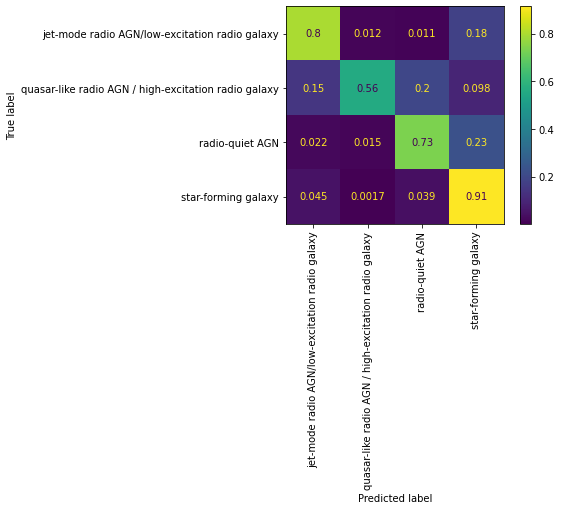

In [517]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()

# SVM

In [319]:
clf = svm.SVC(kernel="linear", class_weight="balanced")
clf.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear')

In [320]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.6693    0.7857    0.7229       644
quasar-like radio AGN / high-excitation radio galaxy     0.2186    0.5732    0.3165        82
                                     radio-quiet AGN     0.5578    0.7397    0.6360       411
                                 star-forming galaxy     0.9389    0.7912    0.8588      2409

                                            accuracy                         0.7792      3546
                                           macro avg     0.5962    0.7224    0.6335      3546
                                        weighted avg     0.8291    0.7792    0.7957      3546



[]

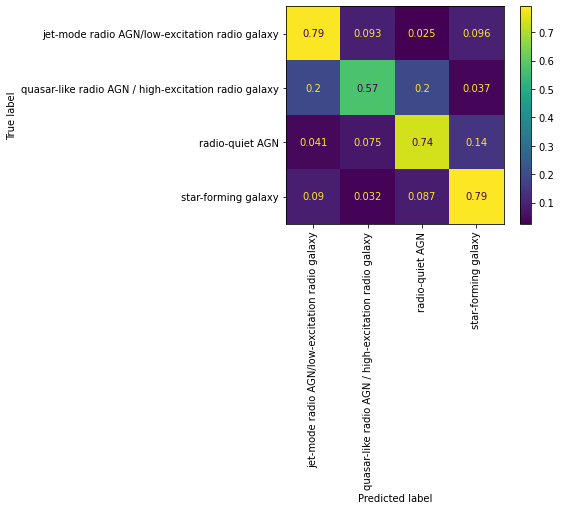

In [321]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()